# Deep Hedging for nonlinear generalized affine processes.

# Example: Butterfly Payoff

Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import*
from matplotlib import rcParams

Execute if it should be run on a GPU

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t
$$

for 

\begin{align}
a_0 &\in [0.3,0.7] \\
a_1 &\in [0.4,0.6] \\
b_0 &\in [-0.2,0.2] \\
b_1 &\in [-0.1,0.1] \\
\gamma &\in [0.5,1.5]
\end{align}

Define Payoff of a Butterfly option
$$
(S_{t_n}-8)^++(S_{t_n}-12)^+-2\cdot(S_{t_n}-10)^+
$$

In [3]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-(x_0+2))+tf.nn.relu(path[-1]-(x_0-2))-2*tf.nn.relu(path[-1]-x_0)

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:14<3:27:58,  1.25s/it]

Iteration:10, Price of Hedge: 0.7946236729621887, Loss: 0.6014007329940796


  0%|          | 21/10000 [00:27<3:26:15,  1.24s/it]

Iteration:20, Price of Hedge: 0.7674281597137451, Loss: 0.56809401512146


  0%|          | 31/10000 [00:40<3:25:11,  1.23s/it]

Iteration:30, Price of Hedge: 0.7552517652511597, Loss: 0.4551353454589844


  0%|          | 41/10000 [00:52<3:26:43,  1.25s/it]

Iteration:40, Price of Hedge: 0.7483985424041748, Loss: 0.4672873318195343


  1%|          | 51/10000 [01:06<4:03:01,  1.47s/it]

Iteration:50, Price of Hedge: 0.7544928789138794, Loss: 0.4327206611633301


  1%|          | 61/10000 [01:18<3:25:28,  1.24s/it]

Iteration:60, Price of Hedge: 0.7591865062713623, Loss: 0.46184414625167847


  1%|          | 71/10000 [01:31<3:43:40,  1.35s/it]

Iteration:70, Price of Hedge: 0.7569484114646912, Loss: 0.46424752473831177


  1%|          | 81/10000 [01:46<3:38:24,  1.32s/it]

Iteration:80, Price of Hedge: 0.7507070302963257, Loss: 0.3788219094276428


  1%|          | 91/10000 [01:58<3:22:06,  1.22s/it]

Iteration:90, Price of Hedge: 0.7496855854988098, Loss: 0.3675103783607483


  1%|          | 101/10000 [02:11<3:35:55,  1.31s/it]

Iteration:100, Price of Hedge: 0.7563706636428833, Loss: 0.3516475558280945


  1%|          | 111/10000 [02:25<3:54:27,  1.42s/it]

Iteration:110, Price of Hedge: 0.7563021183013916, Loss: 0.3574860692024231


  1%|          | 121/10000 [02:38<3:41:37,  1.35s/it]

Iteration:120, Price of Hedge: 0.7562177777290344, Loss: 0.31153789162635803


  1%|▏         | 131/10000 [02:51<3:20:57,  1.22s/it]

Iteration:130, Price of Hedge: 0.7612347602844238, Loss: 0.3577178120613098


  1%|▏         | 141/10000 [03:06<4:14:33,  1.55s/it]

Iteration:140, Price of Hedge: 0.7492589354515076, Loss: 0.298347532749176


  2%|▏         | 151/10000 [03:22<3:43:14,  1.36s/it]

Iteration:150, Price of Hedge: 0.743427038192749, Loss: 0.3001033067703247


  2%|▏         | 161/10000 [03:38<4:05:56,  1.50s/it]

Iteration:160, Price of Hedge: 0.7419363856315613, Loss: 0.31602561473846436


  2%|▏         | 171/10000 [03:53<3:49:33,  1.40s/it]

Iteration:170, Price of Hedge: 0.7442675828933716, Loss: 0.27993473410606384


  2%|▏         | 181/10000 [04:07<3:27:43,  1.27s/it]

Iteration:180, Price of Hedge: 0.7488946318626404, Loss: 0.37349483370780945


  2%|▏         | 191/10000 [04:20<3:34:13,  1.31s/it]

Iteration:190, Price of Hedge: 0.755958080291748, Loss: 0.4025270640850067


  2%|▏         | 201/10000 [04:33<3:47:43,  1.39s/it]

Iteration:200, Price of Hedge: 0.750487744808197, Loss: 0.3676396608352661


  2%|▏         | 211/10000 [04:45<3:37:41,  1.33s/it]

Iteration:210, Price of Hedge: 0.7527040839195251, Loss: 0.269289493560791


  2%|▏         | 221/10000 [05:00<3:32:59,  1.31s/it]

Iteration:220, Price of Hedge: 0.7437674403190613, Loss: 0.2851604223251343


  2%|▏         | 231/10000 [05:13<3:19:58,  1.23s/it]

Iteration:230, Price of Hedge: 0.7451145648956299, Loss: 0.2684057354927063


  2%|▏         | 241/10000 [05:28<3:42:19,  1.37s/it]

Iteration:240, Price of Hedge: 0.7351595163345337, Loss: 0.33812910318374634


  3%|▎         | 251/10000 [05:43<3:56:35,  1.46s/it]

Iteration:250, Price of Hedge: 0.7416523694992065, Loss: 0.2703336179256439


  3%|▎         | 261/10000 [05:56<3:33:49,  1.32s/it]

Iteration:260, Price of Hedge: 0.7480255961418152, Loss: 0.23510299623012543


  3%|▎         | 271/10000 [06:08<3:38:55,  1.35s/it]

Iteration:270, Price of Hedge: 0.7505556344985962, Loss: 0.24176853895187378


  3%|▎         | 281/10000 [06:20<3:08:05,  1.16s/it]

Iteration:280, Price of Hedge: 0.7498254179954529, Loss: 0.23915798962116241


  3%|▎         | 291/10000 [06:33<3:15:10,  1.21s/it]

Iteration:290, Price of Hedge: 0.7531354427337646, Loss: 0.26608437299728394


  3%|▎         | 301/10000 [06:45<3:12:30,  1.19s/it]

Iteration:300, Price of Hedge: 0.7590941786766052, Loss: 0.2390112578868866


  3%|▎         | 311/10000 [06:58<3:36:59,  1.34s/it]

Iteration:310, Price of Hedge: 0.7661865949630737, Loss: 0.2730652987957001


  3%|▎         | 321/10000 [07:10<3:22:13,  1.25s/it]

Iteration:320, Price of Hedge: 0.7564306855201721, Loss: 0.24453365802764893


  3%|▎         | 331/10000 [07:22<3:09:32,  1.18s/it]

Iteration:330, Price of Hedge: 0.7507483959197998, Loss: 0.19533613324165344


  3%|▎         | 341/10000 [07:36<3:44:24,  1.39s/it]

Iteration:340, Price of Hedge: 0.7537078857421875, Loss: 0.22883060574531555


  4%|▎         | 351/10000 [07:50<3:24:33,  1.27s/it]

Iteration:350, Price of Hedge: 0.7594817876815796, Loss: 0.22585025429725647


  4%|▎         | 361/10000 [08:03<3:31:52,  1.32s/it]

Iteration:360, Price of Hedge: 0.7625100612640381, Loss: 0.21378344297409058


  4%|▎         | 371/10000 [08:15<3:32:04,  1.32s/it]

Iteration:370, Price of Hedge: 0.7571651339530945, Loss: 0.35098522901535034


  4%|▍         | 381/10000 [08:27<3:10:52,  1.19s/it]

Iteration:380, Price of Hedge: 0.7521582841873169, Loss: 0.20218047499656677


  4%|▍         | 391/10000 [08:40<3:08:57,  1.18s/it]

Iteration:390, Price of Hedge: 0.7470774054527283, Loss: 0.19011908769607544


  4%|▍         | 401/10000 [08:53<3:17:48,  1.24s/it]

Iteration:400, Price of Hedge: 0.7451921105384827, Loss: 0.20117101073265076


  4%|▍         | 411/10000 [09:06<3:41:45,  1.39s/it]

Iteration:410, Price of Hedge: 0.7429431676864624, Loss: 0.20132388174533844


  4%|▍         | 421/10000 [09:18<3:22:42,  1.27s/it]

Iteration:420, Price of Hedge: 0.7388654351234436, Loss: 0.2792319655418396


  4%|▍         | 431/10000 [09:31<3:32:22,  1.33s/it]

Iteration:430, Price of Hedge: 0.7383809089660645, Loss: 0.22307321429252625


  4%|▍         | 441/10000 [09:46<3:43:17,  1.40s/it]

Iteration:440, Price of Hedge: 0.7488651275634766, Loss: 0.18821008503437042


  5%|▍         | 451/10000 [09:59<3:14:56,  1.22s/it]

Iteration:450, Price of Hedge: 0.7550961375236511, Loss: 0.16976061463356018


  5%|▍         | 461/10000 [10:11<3:25:33,  1.29s/it]

Iteration:460, Price of Hedge: 0.7543901801109314, Loss: 0.17821639776229858


  5%|▍         | 471/10000 [10:24<3:32:32,  1.34s/it]

Iteration:470, Price of Hedge: 0.7448074817657471, Loss: 0.17922496795654297


  5%|▍         | 481/10000 [10:36<3:10:01,  1.20s/it]

Iteration:480, Price of Hedge: 0.7458608746528625, Loss: 0.16842779517173767


  5%|▍         | 491/10000 [10:48<3:09:24,  1.20s/it]

Iteration:490, Price of Hedge: 0.749168336391449, Loss: 0.21370327472686768


  5%|▌         | 501/10000 [11:01<3:17:05,  1.24s/it]

Iteration:500, Price of Hedge: 0.7503383159637451, Loss: 0.16070684790611267


  5%|▌         | 511/10000 [11:14<3:34:40,  1.36s/it]

Iteration:510, Price of Hedge: 0.7469550967216492, Loss: 0.16408425569534302


  5%|▌         | 521/10000 [11:26<3:20:15,  1.27s/it]

Iteration:520, Price of Hedge: 0.7509481310844421, Loss: 0.2198580950498581


  5%|▌         | 531/10000 [11:40<3:39:44,  1.39s/it]

Iteration:530, Price of Hedge: 0.7543055415153503, Loss: 0.1965789496898651


  5%|▌         | 541/10000 [11:54<3:15:19,  1.24s/it]

Iteration:540, Price of Hedge: 0.7587579488754272, Loss: 0.23829969763755798


  6%|▌         | 551/10000 [12:07<3:11:09,  1.21s/it]

Iteration:550, Price of Hedge: 0.7579357028007507, Loss: 0.17854073643684387


  6%|▌         | 561/10000 [12:19<3:18:18,  1.26s/it]

Iteration:560, Price of Hedge: 0.7575356960296631, Loss: 0.238009512424469


  6%|▌         | 571/10000 [12:32<3:27:00,  1.32s/it]

Iteration:570, Price of Hedge: 0.7495154142379761, Loss: 0.21559590101242065


  6%|▌         | 581/10000 [12:44<3:20:43,  1.28s/it]

Iteration:580, Price of Hedge: 0.7456930875778198, Loss: 0.1783234030008316


  6%|▌         | 591/10000 [12:57<3:15:54,  1.25s/it]

Iteration:590, Price of Hedge: 0.7464406490325928, Loss: 0.18300357460975647


  6%|▌         | 601/10000 [13:10<3:11:58,  1.23s/it]

Iteration:600, Price of Hedge: 0.7458481788635254, Loss: 0.1826757937669754


  6%|▌         | 611/10000 [13:23<3:24:33,  1.31s/it]

Iteration:610, Price of Hedge: 0.7471709251403809, Loss: 0.1853284388780594


  6%|▌         | 621/10000 [13:36<3:54:48,  1.50s/it]

Iteration:620, Price of Hedge: 0.74092036485672, Loss: 0.1822599172592163


  6%|▋         | 631/10000 [13:49<3:20:50,  1.29s/it]

Iteration:630, Price of Hedge: 0.746819019317627, Loss: 0.18552803993225098


  6%|▋         | 641/10000 [14:02<3:02:48,  1.17s/it]

Iteration:640, Price of Hedge: 0.7530495524406433, Loss: 0.20892035961151123


  7%|▋         | 651/10000 [14:14<3:09:22,  1.22s/it]

Iteration:650, Price of Hedge: 0.7533565759658813, Loss: 0.1398671567440033


  7%|▋         | 661/10000 [14:27<3:19:03,  1.28s/it]

Iteration:660, Price of Hedge: 0.7476294636726379, Loss: 0.1713881492614746


  7%|▋         | 671/10000 [14:40<3:33:02,  1.37s/it]

Iteration:670, Price of Hedge: 0.7497377395629883, Loss: 0.1996723711490631


  7%|▋         | 681/10000 [14:52<3:07:42,  1.21s/it]

Iteration:680, Price of Hedge: 0.7592334151268005, Loss: 0.17312473058700562


  7%|▋         | 691/10000 [15:05<3:06:19,  1.20s/it]

Iteration:690, Price of Hedge: 0.7526636719703674, Loss: 0.14810171723365784


  7%|▋         | 701/10000 [15:17<3:12:02,  1.24s/it]

Iteration:700, Price of Hedge: 0.746285080909729, Loss: 0.18695807456970215


  7%|▋         | 711/10000 [15:30<3:34:40,  1.39s/it]

Iteration:710, Price of Hedge: 0.7421020865440369, Loss: 0.18865464627742767


  7%|▋         | 721/10000 [15:45<4:09:36,  1.61s/it]

Iteration:720, Price of Hedge: 0.7462279796600342, Loss: 0.22173656523227692


  7%|▋         | 731/10000 [15:58<3:16:20,  1.27s/it]

Iteration:730, Price of Hedge: 0.7506220936775208, Loss: 0.17726868391036987


  7%|▋         | 741/10000 [16:10<3:01:45,  1.18s/it]

Iteration:740, Price of Hedge: 0.7454236745834351, Loss: 0.16513489186763763


  8%|▊         | 751/10000 [16:23<3:05:06,  1.20s/it]

Iteration:750, Price of Hedge: 0.7502716183662415, Loss: 0.15448322892189026


  8%|▊         | 761/10000 [16:36<3:24:16,  1.33s/it]

Iteration:760, Price of Hedge: 0.7460797429084778, Loss: 0.14664696156978607


  8%|▊         | 771/10000 [16:48<3:27:23,  1.35s/it]

Iteration:770, Price of Hedge: 0.7507947087287903, Loss: 0.19609519839286804


  8%|▊         | 781/10000 [17:00<3:00:19,  1.17s/it]

Iteration:780, Price of Hedge: 0.751160204410553, Loss: 0.18631821870803833


  8%|▊         | 791/10000 [17:13<3:03:38,  1.20s/it]

Iteration:790, Price of Hedge: 0.7534170746803284, Loss: 0.19629450142383575


  8%|▊         | 801/10000 [17:26<3:07:28,  1.22s/it]

Iteration:800, Price of Hedge: 0.7520073056221008, Loss: 0.19238853454589844


  8%|▊         | 811/10000 [17:40<3:48:37,  1.49s/it]

Iteration:810, Price of Hedge: 0.7380021214485168, Loss: 0.15465399622917175


  8%|▊         | 821/10000 [17:54<3:34:49,  1.40s/it]

Iteration:820, Price of Hedge: 0.7397024035453796, Loss: 0.1444130390882492


  8%|▊         | 831/10000 [18:05<3:06:40,  1.22s/it]

Iteration:830, Price of Hedge: 0.7505326867103577, Loss: 0.15621882677078247


  8%|▊         | 841/10000 [18:18<3:01:19,  1.19s/it]

Iteration:840, Price of Hedge: 0.7560250163078308, Loss: 0.14993783831596375


  9%|▊         | 851/10000 [18:31<3:03:00,  1.20s/it]

Iteration:850, Price of Hedge: 0.7505022287368774, Loss: 0.22445090115070343


  9%|▊         | 861/10000 [18:43<3:14:34,  1.28s/it]

Iteration:860, Price of Hedge: 0.7421039342880249, Loss: 0.18178114295005798


  9%|▊         | 871/10000 [18:56<3:25:43,  1.35s/it]

Iteration:870, Price of Hedge: 0.7462586164474487, Loss: 0.13113577663898468


  9%|▉         | 881/10000 [19:08<3:01:06,  1.19s/it]

Iteration:880, Price of Hedge: 0.7490958571434021, Loss: 0.16458818316459656


  9%|▉         | 891/10000 [19:21<3:03:22,  1.21s/it]

Iteration:890, Price of Hedge: 0.7526262998580933, Loss: 0.1732633113861084


  9%|▉         | 901/10000 [19:34<3:24:36,  1.35s/it]

Iteration:900, Price of Hedge: 0.7549657821655273, Loss: 0.1645142287015915


  9%|▉         | 911/10000 [19:48<3:42:05,  1.47s/it]

Iteration:910, Price of Hedge: 0.7523137927055359, Loss: 0.15272116661071777


  9%|▉         | 921/10000 [20:01<3:27:41,  1.37s/it]

Iteration:920, Price of Hedge: 0.7523382902145386, Loss: 0.1780473291873932


  9%|▉         | 931/10000 [20:13<2:58:04,  1.18s/it]

Iteration:930, Price of Hedge: 0.747454047203064, Loss: 0.19177620112895966


  9%|▉         | 941/10000 [20:25<2:58:19,  1.18s/it]

Iteration:940, Price of Hedge: 0.7394711971282959, Loss: 0.1967119574546814


 10%|▉         | 951/10000 [20:38<3:04:53,  1.23s/it]

Iteration:950, Price of Hedge: 0.7298857569694519, Loss: 0.1684291809797287


 10%|▉         | 961/10000 [20:51<3:16:58,  1.31s/it]

Iteration:960, Price of Hedge: 0.7290653586387634, Loss: 0.19055911898612976


 10%|▉         | 971/10000 [21:03<3:18:08,  1.32s/it]

Iteration:970, Price of Hedge: 0.7438568472862244, Loss: 0.17701105773448944


 10%|▉         | 981/10000 [21:15<2:58:16,  1.19s/it]

Iteration:980, Price of Hedge: 0.7608096599578857, Loss: 0.14375413954257965


 10%|▉         | 991/10000 [21:28<2:57:01,  1.18s/it]

Iteration:990, Price of Hedge: 0.7610413432121277, Loss: 0.1335029900074005


 10%|█         | 1001/10000 [21:42<3:31:51,  1.41s/it]

Iteration:1000, Price of Hedge: 0.7493761777877808, Loss: 0.1651599258184433


 10%|█         | 1011/10000 [21:56<3:16:45,  1.31s/it]

Iteration:1010, Price of Hedge: 0.7460566759109497, Loss: 0.1583506464958191


 10%|█         | 1021/10000 [22:08<3:21:08,  1.34s/it]

Iteration:1020, Price of Hedge: 0.7482136487960815, Loss: 0.1840827763080597


 10%|█         | 1031/10000 [22:20<2:55:18,  1.17s/it]

Iteration:1030, Price of Hedge: 0.7448258996009827, Loss: 0.18794500827789307


 10%|█         | 1041/10000 [22:32<2:59:32,  1.20s/it]

Iteration:1040, Price of Hedge: 0.7491876482963562, Loss: 0.15151210129261017


 11%|█         | 1051/10000 [22:45<3:04:31,  1.24s/it]

Iteration:1050, Price of Hedge: 0.7634264826774597, Loss: 0.1755681335926056


 11%|█         | 1061/10000 [22:58<3:25:38,  1.38s/it]

Iteration:1060, Price of Hedge: 0.7642480134963989, Loss: 0.18717104196548462


 11%|█         | 1071/10000 [23:10<3:08:35,  1.27s/it]

Iteration:1070, Price of Hedge: 0.7466447949409485, Loss: 0.16267135739326477


 11%|█         | 1081/10000 [23:23<2:54:10,  1.17s/it]

Iteration:1080, Price of Hedge: 0.7526859045028687, Loss: 0.16884851455688477


 11%|█         | 1091/10000 [23:36<3:23:47,  1.37s/it]

Iteration:1090, Price of Hedge: 0.7555598020553589, Loss: 0.18801642954349518


 11%|█         | 1101/10000 [23:51<3:22:47,  1.37s/it]

Iteration:1100, Price of Hedge: 0.7477788329124451, Loss: 0.185869038105011


 11%|█         | 1111/10000 [24:03<3:11:13,  1.29s/it]

Iteration:1110, Price of Hedge: 0.7505801320075989, Loss: 0.17082419991493225


 11%|█         | 1121/10000 [24:15<3:16:16,  1.33s/it]

Iteration:1120, Price of Hedge: 0.7505480647087097, Loss: 0.2088382989168167


 11%|█▏        | 1131/10000 [24:27<2:52:47,  1.17s/it]

Iteration:1130, Price of Hedge: 0.7526660561561584, Loss: 0.19766704738140106


 11%|█▏        | 1141/10000 [24:40<2:57:57,  1.21s/it]

Iteration:1140, Price of Hedge: 0.7469717264175415, Loss: 0.15112465620040894


 12%|█▏        | 1151/10000 [24:53<3:07:19,  1.27s/it]

Iteration:1150, Price of Hedge: 0.745025098323822, Loss: 0.1575586199760437


 12%|█▏        | 1161/10000 [25:06<3:22:32,  1.37s/it]

Iteration:1160, Price of Hedge: 0.7394953966140747, Loss: 0.19496572017669678


 12%|█▏        | 1171/10000 [25:17<2:55:14,  1.19s/it]

Iteration:1170, Price of Hedge: 0.746451199054718, Loss: 0.1928766965866089


 12%|█▏        | 1181/10000 [25:30<2:52:34,  1.17s/it]

Iteration:1180, Price of Hedge: 0.7481391429901123, Loss: 0.18294194340705872


 12%|█▏        | 1191/10000 [25:44<3:26:33,  1.41s/it]

Iteration:1190, Price of Hedge: 0.7548888325691223, Loss: 0.19314523041248322


 12%|█▏        | 1201/10000 [25:57<2:59:41,  1.23s/it]

Iteration:1200, Price of Hedge: 0.7566614151000977, Loss: 0.15827779471874237


 12%|█▏        | 1211/10000 [26:10<3:12:14,  1.31s/it]

Iteration:1210, Price of Hedge: 0.7445874810218811, Loss: 0.1714867204427719


 12%|█▏        | 1221/10000 [26:21<2:58:43,  1.22s/it]

Iteration:1220, Price of Hedge: 0.7376386523246765, Loss: 0.1563034951686859


 12%|█▏        | 1231/10000 [26:34<2:48:55,  1.16s/it]

Iteration:1230, Price of Hedge: 0.7559210658073425, Loss: 0.17306724190711975


 12%|█▏        | 1241/10000 [26:46<2:50:39,  1.17s/it]

Iteration:1240, Price of Hedge: 0.7675403952598572, Loss: 0.19442424178123474


 13%|█▎        | 1251/10000 [26:59<3:06:22,  1.28s/it]

Iteration:1250, Price of Hedge: 0.7480129599571228, Loss: 0.15795491635799408


 13%|█▎        | 1261/10000 [27:10<3:01:58,  1.25s/it]

Iteration:1260, Price of Hedge: 0.7501307129859924, Loss: 0.13252806663513184


 13%|█▎        | 1271/10000 [27:23<2:48:04,  1.16s/it]

Iteration:1270, Price of Hedge: 0.7547624111175537, Loss: 0.17543628811836243


 13%|█▎        | 1281/10000 [27:36<3:14:27,  1.34s/it]

Iteration:1280, Price of Hedge: 0.7570812106132507, Loss: 0.1797618865966797


 13%|█▎        | 1291/10000 [27:50<3:16:39,  1.35s/it]

Iteration:1290, Price of Hedge: 0.7565229535102844, Loss: 0.17341578006744385


 13%|█▎        | 1301/10000 [28:02<3:04:51,  1.28s/it]

Iteration:1300, Price of Hedge: 0.7495991587638855, Loss: 0.1531539261341095


 13%|█▎        | 1311/10000 [28:14<2:55:07,  1.21s/it]

Iteration:1310, Price of Hedge: 0.7409932017326355, Loss: 0.1859128475189209


 13%|█▎        | 1321/10000 [28:26<2:46:07,  1.15s/it]

Iteration:1320, Price of Hedge: 0.7476031184196472, Loss: 0.21080732345581055


 13%|█▎        | 1331/10000 [28:38<2:50:15,  1.18s/it]

Iteration:1330, Price of Hedge: 0.7536396980285645, Loss: 0.16571179032325745


 13%|█▎        | 1341/10000 [28:51<3:04:03,  1.28s/it]

Iteration:1340, Price of Hedge: 0.7536402940750122, Loss: 0.16445976495742798


 14%|█▎        | 1351/10000 [29:02<2:58:53,  1.24s/it]

Iteration:1350, Price of Hedge: 0.7514249086380005, Loss: 0.15866073966026306


 14%|█▎        | 1361/10000 [29:14<2:45:40,  1.15s/it]

Iteration:1360, Price of Hedge: 0.7482283115386963, Loss: 0.18636128306388855


 14%|█▎        | 1371/10000 [29:27<2:52:04,  1.20s/it]

Iteration:1370, Price of Hedge: 0.750769317150116, Loss: 0.15072692930698395


 14%|█▍        | 1381/10000 [29:40<3:28:54,  1.45s/it]

Iteration:1380, Price of Hedge: 0.7494884729385376, Loss: 0.15701329708099365


 14%|█▍        | 1391/10000 [29:54<3:17:00,  1.37s/it]

Iteration:1390, Price of Hedge: 0.735422670841217, Loss: 0.16227713227272034


 14%|█▍        | 1401/10000 [30:06<2:54:01,  1.21s/it]

Iteration:1400, Price of Hedge: 0.7533169388771057, Loss: 0.16911852359771729


 14%|█▍        | 1411/10000 [30:18<2:45:45,  1.16s/it]

Iteration:1410, Price of Hedge: 0.7574312090873718, Loss: 0.1680484414100647


 14%|█▍        | 1421/10000 [30:30<2:47:44,  1.17s/it]

Iteration:1420, Price of Hedge: 0.7484772801399231, Loss: 0.15986786782741547


 14%|█▍        | 1431/10000 [30:42<3:01:10,  1.27s/it]

Iteration:1430, Price of Hedge: 0.7433316707611084, Loss: 0.150945782661438


 14%|█▍        | 1441/10000 [30:54<2:55:32,  1.23s/it]

Iteration:1440, Price of Hedge: 0.7516478896141052, Loss: 0.17854377627372742


 15%|█▍        | 1451/10000 [31:06<2:57:25,  1.25s/it]

Iteration:1450, Price of Hedge: 0.7499046921730042, Loss: 0.18280918896198273


 15%|█▍        | 1461/10000 [31:19<2:46:39,  1.17s/it]

Iteration:1460, Price of Hedge: 0.7434828877449036, Loss: 0.16969354450702667


 15%|█▍        | 1471/10000 [31:31<2:56:28,  1.24s/it]

Iteration:1470, Price of Hedge: 0.7497484087944031, Loss: 0.15564760565757751


 15%|█▍        | 1481/10000 [31:46<3:45:08,  1.59s/it]

Iteration:1480, Price of Hedge: 0.7504615187644958, Loss: 0.17664924263954163


 15%|█▍        | 1491/10000 [31:58<2:52:49,  1.22s/it]

Iteration:1490, Price of Hedge: 0.7490395903587341, Loss: 0.14319321513175964


 15%|█▌        | 1501/10000 [32:10<2:39:43,  1.13s/it]

Iteration:1500, Price of Hedge: 0.7468094229698181, Loss: 0.18989945948123932


 15%|█▌        | 1511/10000 [32:22<2:44:23,  1.16s/it]

Iteration:1510, Price of Hedge: 0.7537561655044556, Loss: 0.14963454008102417


 15%|█▌        | 1521/10000 [32:34<3:06:23,  1.32s/it]

Iteration:1520, Price of Hedge: 0.7558457255363464, Loss: 0.1555705964565277


 15%|█▌        | 1531/10000 [32:46<2:50:00,  1.20s/it]

Iteration:1530, Price of Hedge: 0.7434543371200562, Loss: 0.1702507734298706


 15%|█▌        | 1541/10000 [32:58<2:48:45,  1.20s/it]

Iteration:1540, Price of Hedge: 0.7507980465888977, Loss: 0.16921386122703552


 16%|█▌        | 1551/10000 [33:10<2:45:43,  1.18s/it]

Iteration:1550, Price of Hedge: 0.7531549334526062, Loss: 0.14187103509902954


 16%|█▌        | 1561/10000 [33:23<2:57:52,  1.26s/it]

Iteration:1560, Price of Hedge: 0.7513038516044617, Loss: 0.16680315136909485


 16%|█▌        | 1571/10000 [33:35<3:06:33,  1.33s/it]

Iteration:1570, Price of Hedge: 0.7487789988517761, Loss: 0.19532597064971924


 16%|█▌        | 1581/10000 [33:49<3:11:51,  1.37s/it]

Iteration:1580, Price of Hedge: 0.7466915845870972, Loss: 0.18046967685222626


 16%|█▌        | 1591/10000 [34:01<2:41:15,  1.15s/it]

Iteration:1590, Price of Hedge: 0.7495741248130798, Loss: 0.15399925410747528


 16%|█▌        | 1601/10000 [34:13<2:45:38,  1.18s/it]

Iteration:1600, Price of Hedge: 0.7665836215019226, Loss: 0.16561612486839294


 16%|█▌        | 1611/10000 [34:26<3:01:58,  1.30s/it]

Iteration:1610, Price of Hedge: 0.7596690654754639, Loss: 0.16856598854064941


 16%|█▌        | 1621/10000 [34:37<2:45:39,  1.19s/it]

Iteration:1620, Price of Hedge: 0.7456848621368408, Loss: 0.15690180659294128


 16%|█▋        | 1631/10000 [34:49<2:40:11,  1.15s/it]

Iteration:1630, Price of Hedge: 0.7442877292633057, Loss: 0.1708950251340866


 16%|█▋        | 1641/10000 [35:02<2:44:09,  1.18s/it]

Iteration:1640, Price of Hedge: 0.7458633780479431, Loss: 0.1715908646583557


 17%|█▋        | 1651/10000 [35:14<2:59:11,  1.29s/it]

Iteration:1650, Price of Hedge: 0.7583121061325073, Loss: 0.1555974781513214


 17%|█▋        | 1661/10000 [35:26<2:48:16,  1.21s/it]

Iteration:1660, Price of Hedge: 0.7532169818878174, Loss: 0.16998451948165894


 17%|█▋        | 1671/10000 [35:39<3:08:13,  1.36s/it]

Iteration:1670, Price of Hedge: 0.7443916201591492, Loss: 0.15427368879318237


 17%|█▋        | 1681/10000 [35:53<3:01:45,  1.31s/it]

Iteration:1680, Price of Hedge: 0.7391843199729919, Loss: 0.15976586937904358


 17%|█▋        | 1691/10000 [36:06<2:46:11,  1.20s/it]

Iteration:1690, Price of Hedge: 0.747552216053009, Loss: 0.16054773330688477


 17%|█▋        | 1701/10000 [36:18<3:00:29,  1.30s/it]

Iteration:1700, Price of Hedge: 0.7571943998336792, Loss: 0.14909277856349945


 17%|█▋        | 1711/10000 [36:29<2:42:27,  1.18s/it]

Iteration:1710, Price of Hedge: 0.7516781687736511, Loss: 0.16806162893772125


 17%|█▋        | 1721/10000 [36:41<2:37:03,  1.14s/it]

Iteration:1720, Price of Hedge: 0.7490084767341614, Loss: 0.1612154096364975


 17%|█▋        | 1731/10000 [36:54<2:41:00,  1.17s/it]

Iteration:1730, Price of Hedge: 0.7412049770355225, Loss: 0.15360650420188904


 17%|█▋        | 1741/10000 [37:06<2:59:16,  1.30s/it]

Iteration:1740, Price of Hedge: 0.7382586598396301, Loss: 0.15094387531280518


 18%|█▊        | 1751/10000 [37:18<2:51:06,  1.24s/it]

Iteration:1750, Price of Hedge: 0.7559581995010376, Loss: 0.17762014269828796


 18%|█▊        | 1761/10000 [37:30<2:39:06,  1.16s/it]

Iteration:1760, Price of Hedge: 0.7577833533287048, Loss: 0.15971578657627106


 18%|█▊        | 1771/10000 [37:44<3:04:52,  1.35s/it]

Iteration:1770, Price of Hedge: 0.7391523718833923, Loss: 0.14332795143127441


 18%|█▊        | 1781/10000 [37:57<2:50:13,  1.24s/it]

Iteration:1780, Price of Hedge: 0.7434167861938477, Loss: 0.18252220749855042


 18%|█▊        | 1791/10000 [38:10<3:01:00,  1.32s/it]

Iteration:1790, Price of Hedge: 0.7514658570289612, Loss: 0.18134692311286926


 18%|█▊        | 1801/10000 [38:21<2:45:11,  1.21s/it]

Iteration:1800, Price of Hedge: 0.7587236166000366, Loss: 0.15910771489143372


 18%|█▊        | 1811/10000 [38:34<2:37:21,  1.15s/it]

Iteration:1810, Price of Hedge: 0.7611863017082214, Loss: 0.1566855013370514


 18%|█▊        | 1821/10000 [38:46<2:40:40,  1.18s/it]

Iteration:1820, Price of Hedge: 0.7630816698074341, Loss: 0.17016422748565674


 18%|█▊        | 1831/10000 [38:58<3:07:29,  1.38s/it]

Iteration:1830, Price of Hedge: 0.7552154064178467, Loss: 0.1594226211309433


 18%|█▊        | 1841/10000 [39:10<2:46:40,  1.23s/it]

Iteration:1840, Price of Hedge: 0.7445619702339172, Loss: 0.15456172823905945


 19%|█▊        | 1851/10000 [39:22<2:35:21,  1.14s/it]

Iteration:1850, Price of Hedge: 0.7469850182533264, Loss: 0.1372755616903305


 19%|█▊        | 1861/10000 [39:35<2:42:01,  1.19s/it]

Iteration:1860, Price of Hedge: 0.7430782318115234, Loss: 0.19647768139839172


 19%|█▊        | 1871/10000 [39:49<3:15:26,  1.44s/it]

Iteration:1870, Price of Hedge: 0.7458428144454956, Loss: 0.16998523473739624


 19%|█▉        | 1881/10000 [40:02<2:59:41,  1.33s/it]

Iteration:1880, Price of Hedge: 0.7396025657653809, Loss: 0.16973304748535156


 19%|█▉        | 1891/10000 [40:13<2:37:54,  1.17s/it]

Iteration:1890, Price of Hedge: 0.7548865675926208, Loss: 0.14879824221134186


 19%|█▉        | 1901/10000 [40:25<2:33:57,  1.14s/it]

Iteration:1900, Price of Hedge: 0.767007052898407, Loss: 0.15279141068458557


 19%|█▉        | 1911/10000 [40:38<2:44:15,  1.22s/it]

Iteration:1910, Price of Hedge: 0.7548004388809204, Loss: 0.14726552367210388


 19%|█▉        | 1921/10000 [40:50<2:52:12,  1.28s/it]

Iteration:1920, Price of Hedge: 0.7412179112434387, Loss: 0.11268944293260574


 19%|█▉        | 1931/10000 [41:02<2:42:52,  1.21s/it]

Iteration:1930, Price of Hedge: 0.7436106204986572, Loss: 0.11800188571214676


 19%|█▉        | 1941/10000 [41:14<2:36:07,  1.16s/it]

Iteration:1940, Price of Hedge: 0.7481552362442017, Loss: 0.1267291009426117


 20%|█▉        | 1951/10000 [41:26<2:39:14,  1.19s/it]

Iteration:1950, Price of Hedge: 0.7600396275520325, Loss: 0.11415816098451614


 20%|█▉        | 1961/10000 [41:39<3:22:19,  1.51s/it]

Iteration:1960, Price of Hedge: 0.7578176856040955, Loss: 0.14941900968551636


 20%|█▉        | 1971/10000 [41:53<3:13:46,  1.45s/it]

Iteration:1970, Price of Hedge: 0.7506904006004333, Loss: 0.13982726633548737


 20%|█▉        | 1981/10000 [42:05<2:36:13,  1.17s/it]

Iteration:1980, Price of Hedge: 0.7536653280258179, Loss: 0.09985758364200592


 20%|█▉        | 1991/10000 [42:17<2:35:11,  1.16s/it]

Iteration:1990, Price of Hedge: 0.7546858191490173, Loss: 0.09859427064657211


 20%|██        | 2001/10000 [42:29<2:36:37,  1.17s/it]

Iteration:2000, Price of Hedge: 0.7470225095748901, Loss: 0.0957113653421402


 20%|██        | 2011/10000 [42:42<2:51:30,  1.29s/it]

Iteration:2010, Price of Hedge: 0.755009651184082, Loss: 0.08831042051315308


 20%|██        | 2021/10000 [42:53<2:37:11,  1.18s/it]

Iteration:2020, Price of Hedge: 0.7550068497657776, Loss: 0.09795988351106644


 20%|██        | 2031/10000 [43:06<2:36:15,  1.18s/it]

Iteration:2030, Price of Hedge: 0.7484220266342163, Loss: 0.10885433852672577


 20%|██        | 2041/10000 [43:18<2:37:47,  1.19s/it]

Iteration:2040, Price of Hedge: 0.7502511739730835, Loss: 0.11093251407146454


 21%|██        | 2051/10000 [43:31<2:45:07,  1.25s/it]

Iteration:2050, Price of Hedge: 0.7556821703910828, Loss: 0.106421560049057


 21%|██        | 2061/10000 [43:45<3:26:51,  1.56s/it]

Iteration:2060, Price of Hedge: 0.7541821599006653, Loss: 0.16540321707725525


 21%|██        | 2071/10000 [43:57<2:43:03,  1.23s/it]

Iteration:2070, Price of Hedge: 0.7560957670211792, Loss: 0.13727214932441711


 21%|██        | 2081/10000 [44:10<2:35:19,  1.18s/it]

Iteration:2080, Price of Hedge: 0.7534747123718262, Loss: 0.11425246298313141


 21%|██        | 2091/10000 [44:22<2:37:33,  1.20s/it]

Iteration:2090, Price of Hedge: 0.7504236102104187, Loss: 0.08732756972312927


 21%|██        | 2101/10000 [44:35<2:47:41,  1.27s/it]

Iteration:2100, Price of Hedge: 0.7481040358543396, Loss: 0.09191639721393585


 21%|██        | 2111/10000 [44:46<2:44:22,  1.25s/it]

Iteration:2110, Price of Hedge: 0.7511065006256104, Loss: 0.09276530891656876


 21%|██        | 2121/10000 [44:58<2:28:59,  1.13s/it]

Iteration:2120, Price of Hedge: 0.7409849762916565, Loss: 0.09916985034942627


 21%|██▏       | 2131/10000 [45:11<2:33:09,  1.17s/it]

Iteration:2130, Price of Hedge: 0.7480821013450623, Loss: 0.1284591257572174


 21%|██▏       | 2141/10000 [45:23<2:52:51,  1.32s/it]

Iteration:2140, Price of Hedge: 0.7471127510070801, Loss: 0.14754989743232727


 22%|██▏       | 2151/10000 [45:37<3:20:53,  1.54s/it]

Iteration:2150, Price of Hedge: 0.7574090361595154, Loss: 0.11164359748363495


 22%|██▏       | 2161/10000 [45:52<3:15:23,  1.50s/it]

Iteration:2160, Price of Hedge: 0.7523288130760193, Loss: 0.07096970081329346


 22%|██▏       | 2171/10000 [46:03<2:28:41,  1.14s/it]

Iteration:2170, Price of Hedge: 0.7524415254592896, Loss: 0.08414620161056519


 22%|██▏       | 2181/10000 [46:16<2:33:21,  1.18s/it]

Iteration:2180, Price of Hedge: 0.7520285844802856, Loss: 0.09631006419658661


 22%|██▏       | 2191/10000 [46:28<2:37:21,  1.21s/it]

Iteration:2190, Price of Hedge: 0.7520908117294312, Loss: 0.09711199998855591


 22%|██▏       | 2201/10000 [46:40<2:51:01,  1.32s/it]

Iteration:2200, Price of Hedge: 0.7528406381607056, Loss: 0.08586212992668152


 22%|██▏       | 2211/10000 [46:52<2:25:59,  1.12s/it]

Iteration:2210, Price of Hedge: 0.744580864906311, Loss: 0.10217058658599854


 22%|██▏       | 2221/10000 [47:04<2:28:43,  1.15s/it]

Iteration:2220, Price of Hedge: 0.7439898252487183, Loss: 0.12342624366283417


 22%|██▏       | 2231/10000 [47:16<2:35:39,  1.20s/it]

Iteration:2230, Price of Hedge: 0.7489928007125854, Loss: 0.10473044216632843


 22%|██▏       | 2241/10000 [47:29<2:52:24,  1.33s/it]

Iteration:2240, Price of Hedge: 0.7557170391082764, Loss: 0.10017547756433487


 23%|██▎       | 2251/10000 [47:42<3:05:54,  1.44s/it]

Iteration:2250, Price of Hedge: 0.7551828026771545, Loss: 0.09923478960990906


 23%|██▎       | 2261/10000 [47:56<2:38:48,  1.23s/it]

Iteration:2260, Price of Hedge: 0.7423157095909119, Loss: 0.10159321129322052


 23%|██▎       | 2271/10000 [48:08<2:35:48,  1.21s/it]

Iteration:2270, Price of Hedge: 0.7415133118629456, Loss: 0.11344412714242935


 23%|██▎       | 2281/10000 [48:21<2:36:06,  1.21s/it]

Iteration:2280, Price of Hedge: 0.7434943914413452, Loss: 0.07611972838640213


 23%|██▎       | 2291/10000 [48:33<2:49:35,  1.32s/it]

Iteration:2290, Price of Hedge: 0.7496011853218079, Loss: 0.09143483638763428


 23%|██▎       | 2301/10000 [48:44<2:26:56,  1.15s/it]

Iteration:2300, Price of Hedge: 0.7495150566101074, Loss: 0.08194845914840698


 23%|██▎       | 2311/10000 [48:57<2:29:00,  1.16s/it]

Iteration:2310, Price of Hedge: 0.7459999918937683, Loss: 0.09972632676362991


 23%|██▎       | 2321/10000 [49:09<2:33:21,  1.20s/it]

Iteration:2320, Price of Hedge: 0.7469069361686707, Loss: 0.12041077017784119


 23%|██▎       | 2331/10000 [49:22<2:52:43,  1.35s/it]

Iteration:2330, Price of Hedge: 0.7570111155509949, Loss: 0.11561182886362076


 23%|██▎       | 2341/10000 [49:33<2:29:38,  1.17s/it]

Iteration:2340, Price of Hedge: 0.7589132189750671, Loss: 0.08637683093547821


 24%|██▎       | 2351/10000 [49:47<2:55:06,  1.37s/it]

Iteration:2350, Price of Hedge: 0.747859537601471, Loss: 0.0984199121594429


 24%|██▎       | 2361/10000 [50:00<2:29:06,  1.17s/it]

Iteration:2360, Price of Hedge: 0.7401193976402283, Loss: 0.10278203338384628


 24%|██▎       | 2371/10000 [50:13<2:32:41,  1.20s/it]

Iteration:2370, Price of Hedge: 0.7377151250839233, Loss: 0.09772512316703796


 24%|██▍       | 2381/10000 [50:26<2:52:39,  1.36s/it]

Iteration:2380, Price of Hedge: 0.7504432201385498, Loss: 0.15003320574760437


 24%|██▍       | 2391/10000 [50:37<2:24:09,  1.14s/it]

Iteration:2390, Price of Hedge: 0.7607680559158325, Loss: 0.11077375710010529


 24%|██▍       | 2401/10000 [50:49<2:24:25,  1.14s/it]

Iteration:2400, Price of Hedge: 0.7525374293327332, Loss: 0.11271918565034866


 24%|██▍       | 2411/10000 [51:01<2:29:00,  1.18s/it]

Iteration:2410, Price of Hedge: 0.7538621425628662, Loss: 0.10841216892004013


 24%|██▍       | 2421/10000 [51:13<2:48:14,  1.33s/it]

Iteration:2420, Price of Hedge: 0.7569794654846191, Loss: 0.09661552309989929


 24%|██▍       | 2431/10000 [51:25<2:24:15,  1.14s/it]

Iteration:2430, Price of Hedge: 0.7620849609375, Loss: 0.09975658357143402


 24%|██▍       | 2441/10000 [51:38<2:40:24,  1.27s/it]

Iteration:2440, Price of Hedge: 0.7472149729728699, Loss: 0.13402818143367767


 25%|██▍       | 2451/10000 [51:52<2:49:06,  1.34s/it]

Iteration:2450, Price of Hedge: 0.7452094554901123, Loss: 0.1215713620185852


 25%|██▍       | 2461/10000 [52:05<2:31:58,  1.21s/it]

Iteration:2460, Price of Hedge: 0.7482964396476746, Loss: 0.1088697761297226


 25%|██▍       | 2471/10000 [52:17<2:44:12,  1.31s/it]

Iteration:2470, Price of Hedge: 0.741131603717804, Loss: 0.09541334211826324


 25%|██▍       | 2481/10000 [52:28<2:20:47,  1.12s/it]

Iteration:2480, Price of Hedge: 0.742817759513855, Loss: 0.07225550711154938


 25%|██▍       | 2491/10000 [52:41<2:25:25,  1.16s/it]

Iteration:2490, Price of Hedge: 0.7461509108543396, Loss: 0.11621546000242233


 25%|██▌       | 2501/10000 [52:54<2:49:09,  1.35s/it]

Iteration:2500, Price of Hedge: 0.7558693289756775, Loss: 0.0806519091129303


 25%|██▌       | 2511/10000 [53:07<3:00:13,  1.44s/it]

Iteration:2510, Price of Hedge: 0.7525945901870728, Loss: 0.09318214654922485


 25%|██▌       | 2521/10000 [53:21<2:56:52,  1.42s/it]

Iteration:2520, Price of Hedge: 0.740836501121521, Loss: 0.08404022455215454


 25%|██▌       | 2531/10000 [53:32<2:20:05,  1.13s/it]

Iteration:2530, Price of Hedge: 0.7407486438751221, Loss: 0.09900793433189392


 25%|██▌       | 2541/10000 [53:47<2:51:32,  1.38s/it]

Iteration:2540, Price of Hedge: 0.7558028101921082, Loss: 0.07953062653541565


 26%|██▌       | 2551/10000 [54:00<2:31:36,  1.22s/it]

Iteration:2550, Price of Hedge: 0.7456657886505127, Loss: 0.08908161520957947


 26%|██▌       | 2561/10000 [54:13<2:33:34,  1.24s/it]

Iteration:2560, Price of Hedge: 0.7337573766708374, Loss: 0.10035111010074615


 26%|██▌       | 2571/10000 [54:25<2:44:24,  1.33s/it]

Iteration:2570, Price of Hedge: 0.7459307909011841, Loss: 0.08657374978065491


 26%|██▌       | 2581/10000 [54:37<2:23:33,  1.16s/it]

Iteration:2580, Price of Hedge: 0.7518429160118103, Loss: 0.0975634753704071


 26%|██▌       | 2591/10000 [54:49<2:21:50,  1.15s/it]

Iteration:2590, Price of Hedge: 0.7565518021583557, Loss: 0.08703403174877167


 26%|██▌       | 2601/10000 [55:01<2:26:58,  1.19s/it]

Iteration:2600, Price of Hedge: 0.7513064742088318, Loss: 0.09504809975624084


 26%|██▌       | 2611/10000 [55:13<2:41:18,  1.31s/it]

Iteration:2610, Price of Hedge: 0.7429152727127075, Loss: 0.11338486522436142


 26%|██▌       | 2621/10000 [55:25<2:17:56,  1.12s/it]

Iteration:2620, Price of Hedge: 0.7432737350463867, Loss: 0.07705305516719818


 26%|██▋       | 2631/10000 [55:37<2:34:32,  1.26s/it]

Iteration:2630, Price of Hedge: 0.747959315776825, Loss: 0.08096054196357727


 26%|██▋       | 2641/10000 [55:52<2:47:48,  1.37s/it]

Iteration:2640, Price of Hedge: 0.7471904754638672, Loss: 0.08924853801727295


 27%|██▋       | 2651/10000 [56:04<2:28:29,  1.21s/it]

Iteration:2650, Price of Hedge: 0.73897385597229, Loss: 0.080195352435112


 27%|██▋       | 2661/10000 [56:17<2:42:35,  1.33s/it]

Iteration:2660, Price of Hedge: 0.7456726431846619, Loss: 0.09478916227817535


 27%|██▋       | 2671/10000 [56:28<2:19:53,  1.15s/it]

Iteration:2670, Price of Hedge: 0.749270498752594, Loss: 0.08242101967334747


 27%|██▋       | 2681/10000 [56:41<2:28:31,  1.22s/it]

Iteration:2680, Price of Hedge: 0.7511566281318665, Loss: 0.0990326926112175


 27%|██▋       | 2691/10000 [56:54<2:25:37,  1.20s/it]

Iteration:2690, Price of Hedge: 0.7495983839035034, Loss: 0.07630053907632828


 27%|██▋       | 2701/10000 [57:06<2:40:00,  1.32s/it]

Iteration:2700, Price of Hedge: 0.7501705288887024, Loss: 0.08179426938295364


 27%|██▋       | 2711/10000 [57:18<2:25:44,  1.20s/it]

Iteration:2710, Price of Hedge: 0.755703330039978, Loss: 0.0965782105922699


 27%|██▋       | 2721/10000 [57:30<2:19:25,  1.15s/it]

Iteration:2720, Price of Hedge: 0.7619439959526062, Loss: 0.08088057488203049


 27%|██▋       | 2731/10000 [57:43<2:48:10,  1.39s/it]

Iteration:2730, Price of Hedge: 0.7618982195854187, Loss: 0.0923406332731247


 27%|██▋       | 2741/10000 [57:58<2:34:19,  1.28s/it]

Iteration:2740, Price of Hedge: 0.7551255822181702, Loss: 0.0961860865354538


 28%|██▊       | 2751/10000 [58:12<3:02:41,  1.51s/it]

Iteration:2750, Price of Hedge: 0.7423821687698364, Loss: 0.08773133158683777


 28%|██▊       | 2761/10000 [58:25<2:44:45,  1.37s/it]

Iteration:2760, Price of Hedge: 0.7549284100532532, Loss: 0.08396945148706436


 28%|██▊       | 2771/10000 [58:36<2:18:50,  1.15s/it]

Iteration:2770, Price of Hedge: 0.7551376819610596, Loss: 0.0865911990404129


 28%|██▊       | 2781/10000 [58:49<2:17:49,  1.15s/it]

Iteration:2780, Price of Hedge: 0.7505030632019043, Loss: 0.08398216962814331


 28%|██▊       | 2791/10000 [59:01<2:26:58,  1.22s/it]

Iteration:2790, Price of Hedge: 0.7510161399841309, Loss: 0.07336399704217911


 28%|██▊       | 2801/10000 [59:13<2:39:55,  1.33s/it]

Iteration:2800, Price of Hedge: 0.7582599520683289, Loss: 0.10074082762002945


 28%|██▊       | 2811/10000 [59:25<2:24:42,  1.21s/it]

Iteration:2810, Price of Hedge: 0.7471486330032349, Loss: 0.09960579127073288


 28%|██▊       | 2821/10000 [59:38<2:34:56,  1.29s/it]

Iteration:2820, Price of Hedge: 0.7467138171195984, Loss: 0.17348068952560425


 28%|██▊       | 2831/10000 [59:53<2:41:36,  1.35s/it]

Iteration:2830, Price of Hedge: 0.7453600764274597, Loss: 0.08452343940734863


 28%|██▊       | 2841/10000 [1:00:05<2:22:41,  1.20s/it]

Iteration:2840, Price of Hedge: 0.7505814433097839, Loss: 0.10855074971914291


 29%|██▊       | 2851/10000 [1:00:17<2:35:45,  1.31s/it]

Iteration:2850, Price of Hedge: 0.7562955617904663, Loss: 0.12167786061763763


 29%|██▊       | 2861/10000 [1:00:29<2:16:26,  1.15s/it]

Iteration:2860, Price of Hedge: 0.7411323189735413, Loss: 0.09961052238941193


 29%|██▊       | 2871/10000 [1:00:41<2:16:52,  1.15s/it]

Iteration:2870, Price of Hedge: 0.7408274412155151, Loss: 0.09476622939109802


 29%|██▉       | 2881/10000 [1:00:54<2:21:39,  1.19s/it]

Iteration:2880, Price of Hedge: 0.752956211566925, Loss: 0.07623907923698425


 29%|██▉       | 2891/10000 [1:01:06<2:31:35,  1.28s/it]

Iteration:2890, Price of Hedge: 0.7484350800514221, Loss: 0.09422645717859268


 29%|██▉       | 2901/10000 [1:01:18<2:21:49,  1.20s/it]

Iteration:2900, Price of Hedge: 0.75339275598526, Loss: 0.11249987781047821


 29%|██▉       | 2911/10000 [1:01:30<2:15:11,  1.14s/it]

Iteration:2910, Price of Hedge: 0.7550579309463501, Loss: 0.10503339767456055


 29%|██▉       | 2921/10000 [1:01:43<2:48:28,  1.43s/it]

Iteration:2920, Price of Hedge: 0.7543068528175354, Loss: 0.11348466575145721


 29%|██▉       | 2931/10000 [1:01:58<2:34:30,  1.31s/it]

Iteration:2930, Price of Hedge: 0.7522062063217163, Loss: 0.10245206952095032


 29%|██▉       | 2941/10000 [1:02:10<2:34:52,  1.32s/it]

Iteration:2940, Price of Hedge: 0.7440219521522522, Loss: 0.08759479969739914


 30%|██▉       | 2951/10000 [1:02:22<2:21:56,  1.21s/it]

Iteration:2950, Price of Hedge: 0.7505583763122559, Loss: 0.12003621459007263


 30%|██▉       | 2961/10000 [1:02:34<2:16:27,  1.16s/it]

Iteration:2960, Price of Hedge: 0.7469369173049927, Loss: 0.11037600785493851


 30%|██▉       | 2971/10000 [1:02:46<2:17:55,  1.18s/it]

Iteration:2970, Price of Hedge: 0.7447705268859863, Loss: 0.0891088992357254


 30%|██▉       | 2981/10000 [1:02:59<2:33:22,  1.31s/it]

Iteration:2980, Price of Hedge: 0.7527506351470947, Loss: 0.1019875705242157


 30%|██▉       | 2991/10000 [1:03:11<2:28:04,  1.27s/it]

Iteration:2990, Price of Hedge: 0.7508623003959656, Loss: 0.10146966576576233


 30%|███       | 3001/10000 [1:03:23<2:15:31,  1.16s/it]

Iteration:3000, Price of Hedge: 0.7498641610145569, Loss: 0.10462544858455658


 30%|███       | 3011/10000 [1:03:35<2:16:32,  1.17s/it]

Iteration:3010, Price of Hedge: 0.7471312284469604, Loss: 0.09850779175758362


 30%|███       | 3021/10000 [1:03:49<2:48:17,  1.45s/it]

Iteration:3020, Price of Hedge: 0.7555184960365295, Loss: 0.0852256789803505


 30%|███       | 3031/10000 [1:04:02<2:32:35,  1.31s/it]

Iteration:3030, Price of Hedge: 0.7589409947395325, Loss: 0.10634554922580719


 30%|███       | 3041/10000 [1:04:14<2:22:32,  1.23s/it]

Iteration:3040, Price of Hedge: 0.7423129081726074, Loss: 0.09075868129730225


 31%|███       | 3051/10000 [1:04:26<2:14:42,  1.16s/it]

Iteration:3050, Price of Hedge: 0.7515231370925903, Loss: 0.09688615798950195


 31%|███       | 3061/10000 [1:04:39<2:14:29,  1.16s/it]

Iteration:3060, Price of Hedge: 0.7523582577705383, Loss: 0.11283522844314575


 31%|███       | 3071/10000 [1:04:51<2:24:00,  1.25s/it]

Iteration:3070, Price of Hedge: 0.7583305835723877, Loss: 0.07586973905563354


 31%|███       | 3081/10000 [1:05:03<2:28:05,  1.28s/it]

Iteration:3080, Price of Hedge: 0.7492349147796631, Loss: 0.0738811120390892


 31%|███       | 3091/10000 [1:05:15<2:12:34,  1.15s/it]

Iteration:3090, Price of Hedge: 0.7479939460754395, Loss: 0.07905198633670807


 31%|███       | 3101/10000 [1:05:27<2:12:59,  1.16s/it]

Iteration:3100, Price of Hedge: 0.7580575942993164, Loss: 0.12536148726940155


 31%|███       | 3111/10000 [1:05:40<2:40:31,  1.40s/it]

Iteration:3110, Price of Hedge: 0.760444700717926, Loss: 0.08909054100513458


 31%|███       | 3121/10000 [1:05:55<2:52:21,  1.50s/it]

Iteration:3120, Price of Hedge: 0.7514004707336426, Loss: 0.09180596470832825


 31%|███▏      | 3131/10000 [1:06:07<2:23:09,  1.25s/it]

Iteration:3130, Price of Hedge: 0.7384313344955444, Loss: 0.11266188323497772


 31%|███▏      | 3141/10000 [1:06:19<2:11:43,  1.15s/it]

Iteration:3140, Price of Hedge: 0.7423980832099915, Loss: 0.08530206233263016


 32%|███▏      | 3151/10000 [1:06:31<2:12:48,  1.16s/it]

Iteration:3150, Price of Hedge: 0.7507386803627014, Loss: 0.09262051433324814


 32%|███▏      | 3161/10000 [1:06:43<2:23:11,  1.26s/it]

Iteration:3160, Price of Hedge: 0.7503559589385986, Loss: 0.10078736394643784


 32%|███▏      | 3171/10000 [1:06:55<2:27:53,  1.30s/it]

Iteration:3170, Price of Hedge: 0.743422269821167, Loss: 0.08827942609786987


 32%|███▏      | 3181/10000 [1:07:07<2:11:10,  1.15s/it]

Iteration:3180, Price of Hedge: 0.7494221925735474, Loss: 0.11569883674383163


 32%|███▏      | 3191/10000 [1:07:20<2:12:53,  1.17s/it]

Iteration:3190, Price of Hedge: 0.7430532574653625, Loss: 0.09906448423862457


 32%|███▏      | 3201/10000 [1:07:32<2:19:25,  1.23s/it]

Iteration:3200, Price of Hedge: 0.7395983338356018, Loss: 0.10740316659212112


 32%|███▏      | 3211/10000 [1:07:46<2:58:47,  1.58s/it]

Iteration:3210, Price of Hedge: 0.7437440156936646, Loss: 0.10427214205265045


 32%|███▏      | 3221/10000 [1:07:59<2:32:36,  1.35s/it]

Iteration:3220, Price of Hedge: 0.746569037437439, Loss: 0.10039836913347244


 32%|███▏      | 3231/10000 [1:08:11<2:09:08,  1.14s/it]

Iteration:3230, Price of Hedge: 0.7509108185768127, Loss: 0.0885574072599411


 32%|███▏      | 3241/10000 [1:08:23<2:09:50,  1.15s/it]

Iteration:3240, Price of Hedge: 0.7466448545455933, Loss: 0.07968084514141083


 33%|███▎      | 3251/10000 [1:08:35<2:24:05,  1.28s/it]

Iteration:3250, Price of Hedge: 0.7526767253875732, Loss: 0.10576526820659637


 33%|███▎      | 3261/10000 [1:08:48<2:25:17,  1.29s/it]

Iteration:3260, Price of Hedge: 0.7545990943908691, Loss: 0.08926254510879517


 33%|███▎      | 3271/10000 [1:08:59<2:09:16,  1.15s/it]

Iteration:3270, Price of Hedge: 0.7559919357299805, Loss: 0.09734674543142319


 33%|███▎      | 3281/10000 [1:09:12<2:15:26,  1.21s/it]

Iteration:3280, Price of Hedge: 0.7492361664772034, Loss: 0.1322418749332428


 33%|███▎      | 3291/10000 [1:09:24<2:17:41,  1.23s/it]

Iteration:3290, Price of Hedge: 0.7459423542022705, Loss: 0.12870129942893982


 33%|███▎      | 3301/10000 [1:09:37<2:27:22,  1.32s/it]

Iteration:3300, Price of Hedge: 0.7598910927772522, Loss: 0.14811989665031433


 33%|███▎      | 3311/10000 [1:09:51<2:47:17,  1.50s/it]

Iteration:3310, Price of Hedge: 0.7592482566833496, Loss: 0.10324083268642426


 33%|███▎      | 3321/10000 [1:10:03<2:06:36,  1.14s/it]

Iteration:3320, Price of Hedge: 0.7497871518135071, Loss: 0.11013390123844147


 33%|███▎      | 3331/10000 [1:10:15<2:10:03,  1.17s/it]

Iteration:3330, Price of Hedge: 0.7466986179351807, Loss: 0.08636988699436188


 33%|███▎      | 3341/10000 [1:10:28<2:16:46,  1.23s/it]

Iteration:3340, Price of Hedge: 0.7400643825531006, Loss: 0.12080296874046326


 34%|███▎      | 3351/10000 [1:10:40<2:22:46,  1.29s/it]

Iteration:3350, Price of Hedge: 0.7339397668838501, Loss: 0.10007068514823914


 34%|███▎      | 3361/10000 [1:10:51<2:06:50,  1.15s/it]

Iteration:3360, Price of Hedge: 0.738937497138977, Loss: 0.10148538649082184


 34%|███▎      | 3371/10000 [1:11:04<2:07:57,  1.16s/it]

Iteration:3370, Price of Hedge: 0.7482158541679382, Loss: 0.10094892978668213


 34%|███▍      | 3381/10000 [1:11:16<2:13:58,  1.21s/it]

Iteration:3380, Price of Hedge: 0.7547293305397034, Loss: 0.10830407589673996


 34%|███▍      | 3391/10000 [1:11:28<2:25:22,  1.32s/it]

Iteration:3390, Price of Hedge: 0.751981794834137, Loss: 0.07038819789886475


 34%|███▍      | 3401/10000 [1:11:40<2:20:02,  1.27s/it]

Iteration:3400, Price of Hedge: 0.7422235012054443, Loss: 0.08883123099803925


 34%|███▍      | 3411/10000 [1:11:55<2:25:53,  1.33s/it]

Iteration:3410, Price of Hedge: 0.7453896999359131, Loss: 0.10929522663354874


 34%|███▍      | 3421/10000 [1:12:07<2:11:20,  1.20s/it]

Iteration:3420, Price of Hedge: 0.7500256299972534, Loss: 0.08954939991235733


 34%|███▍      | 3431/10000 [1:12:20<2:13:49,  1.22s/it]

Iteration:3430, Price of Hedge: 0.7429681420326233, Loss: 0.08906812220811844


 34%|███▍      | 3441/10000 [1:12:31<2:21:15,  1.29s/it]

Iteration:3440, Price of Hedge: 0.7484754920005798, Loss: 0.08453451842069626


 35%|███▍      | 3451/10000 [1:12:43<2:03:57,  1.14s/it]

Iteration:3450, Price of Hedge: 0.7474514842033386, Loss: 0.09476664662361145


 35%|███▍      | 3461/10000 [1:12:55<2:07:59,  1.17s/it]

Iteration:3460, Price of Hedge: 0.7432469129562378, Loss: 0.1255364567041397


 35%|███▍      | 3471/10000 [1:13:08<2:13:52,  1.23s/it]

Iteration:3470, Price of Hedge: 0.743637204170227, Loss: 0.13362058997154236


 35%|███▍      | 3481/10000 [1:13:20<2:21:39,  1.30s/it]

Iteration:3480, Price of Hedge: 0.747462809085846, Loss: 0.09217022359371185


 35%|███▍      | 3491/10000 [1:13:31<2:03:18,  1.14s/it]

Iteration:3490, Price of Hedge: 0.7500157356262207, Loss: 0.08162437379360199


 35%|███▌      | 3501/10000 [1:13:45<2:24:21,  1.33s/it]

Iteration:3500, Price of Hedge: 0.7548170685768127, Loss: 0.12753728032112122


 35%|███▌      | 3511/10000 [1:13:59<2:16:45,  1.26s/it]

Iteration:3510, Price of Hedge: 0.735696017742157, Loss: 0.07593609392642975


 35%|███▌      | 3521/10000 [1:14:11<2:15:57,  1.26s/it]

Iteration:3520, Price of Hedge: 0.7380378842353821, Loss: 0.11887073516845703


 35%|███▌      | 3531/10000 [1:14:23<2:15:06,  1.25s/it]

Iteration:3530, Price of Hedge: 0.7483111619949341, Loss: 0.12001225352287292


 35%|███▌      | 3541/10000 [1:14:35<2:04:19,  1.15s/it]

Iteration:3540, Price of Hedge: 0.7478761672973633, Loss: 0.10431714355945587


 36%|███▌      | 3551/10000 [1:14:47<2:04:37,  1.16s/it]

Iteration:3550, Price of Hedge: 0.7522171139717102, Loss: 0.08131004869937897


 36%|███▌      | 3561/10000 [1:14:59<2:12:20,  1.23s/it]

Iteration:3560, Price of Hedge: 0.7507368922233582, Loss: 0.10022416710853577


 36%|███▌      | 3571/10000 [1:15:12<2:20:25,  1.31s/it]

Iteration:3570, Price of Hedge: 0.7491990327835083, Loss: 0.08214669674634933


 36%|███▌      | 3581/10000 [1:15:23<2:02:55,  1.15s/it]

Iteration:3580, Price of Hedge: 0.7597787380218506, Loss: 0.08058258891105652


 36%|███▌      | 3591/10000 [1:15:36<2:05:10,  1.17s/it]

Iteration:3590, Price of Hedge: 0.7503482699394226, Loss: 0.08391201496124268


 36%|███▌      | 3601/10000 [1:15:50<2:32:17,  1.43s/it]

Iteration:3600, Price of Hedge: 0.7389019131660461, Loss: 0.09874583780765533


 36%|███▌      | 3611/10000 [1:16:04<2:24:42,  1.36s/it]

Iteration:3610, Price of Hedge: 0.7410700917243958, Loss: 0.06965212523937225


 36%|███▌      | 3621/10000 [1:16:16<2:19:55,  1.32s/it]

Iteration:3620, Price of Hedge: 0.7439773082733154, Loss: 0.0830870121717453


 36%|███▋      | 3631/10000 [1:16:28<1:59:25,  1.13s/it]

Iteration:3630, Price of Hedge: 0.7447564005851746, Loss: 0.06269843876361847


 36%|███▋      | 3641/10000 [1:16:40<2:05:39,  1.19s/it]

Iteration:3640, Price of Hedge: 0.7492518424987793, Loss: 0.09553855657577515


 37%|███▋      | 3651/10000 [1:16:53<2:06:55,  1.20s/it]

Iteration:3650, Price of Hedge: 0.7610374093055725, Loss: 0.07953368872404099


 37%|███▋      | 3661/10000 [1:17:05<2:22:21,  1.35s/it]

Iteration:3660, Price of Hedge: 0.74756920337677, Loss: 0.11178602278232574


 37%|███▋      | 3671/10000 [1:17:16<2:00:30,  1.14s/it]

Iteration:3670, Price of Hedge: 0.7515470385551453, Loss: 0.10408426821231842


 37%|███▋      | 3681/10000 [1:17:29<2:02:13,  1.16s/it]

Iteration:3680, Price of Hedge: 0.7521603107452393, Loss: 0.08549217134714127


 37%|███▋      | 3691/10000 [1:17:41<2:20:13,  1.33s/it]

Iteration:3690, Price of Hedge: 0.7528953552246094, Loss: 0.11871091276407242


 37%|███▋      | 3701/10000 [1:17:56<2:36:52,  1.49s/it]

Iteration:3700, Price of Hedge: 0.7464253902435303, Loss: 0.09742417186498642


 37%|███▋      | 3711/10000 [1:18:09<2:21:55,  1.35s/it]

Iteration:3710, Price of Hedge: 0.7413134574890137, Loss: 0.10018916428089142


 37%|███▋      | 3721/10000 [1:18:21<2:05:48,  1.20s/it]

Iteration:3720, Price of Hedge: 0.7533586621284485, Loss: 0.09740103781223297


 37%|███▋      | 3731/10000 [1:18:33<2:01:09,  1.16s/it]

Iteration:3730, Price of Hedge: 0.7543196678161621, Loss: 0.10826286673545837


 37%|███▋      | 3741/10000 [1:18:46<2:06:26,  1.21s/it]

Iteration:3740, Price of Hedge: 0.7542041540145874, Loss: 0.10027474164962769


 38%|███▊      | 3751/10000 [1:18:58<2:15:39,  1.30s/it]

Iteration:3750, Price of Hedge: 0.7486082911491394, Loss: 0.09719379246234894


 38%|███▊      | 3761/10000 [1:19:10<2:10:08,  1.25s/it]

Iteration:3760, Price of Hedge: 0.7435817718505859, Loss: 0.07019641250371933


 38%|███▊      | 3771/10000 [1:19:22<2:00:38,  1.16s/it]

Iteration:3770, Price of Hedge: 0.7499435544013977, Loss: 0.08256055414676666


 38%|███▊      | 3781/10000 [1:19:35<2:00:43,  1.16s/it]

Iteration:3780, Price of Hedge: 0.7448773980140686, Loss: 0.11392772197723389


 38%|███▊      | 3791/10000 [1:19:49<2:34:24,  1.49s/it]

Iteration:3790, Price of Hedge: 0.7586886882781982, Loss: 0.0776773989200592


 38%|███▊      | 3801/10000 [1:20:03<2:32:35,  1.48s/it]

Iteration:3800, Price of Hedge: 0.7578270435333252, Loss: 0.07715903222560883


 38%|███▊      | 3811/10000 [1:20:15<2:15:30,  1.31s/it]

Iteration:3810, Price of Hedge: 0.7491880655288696, Loss: 0.08213216811418533


 38%|███▊      | 3821/10000 [1:20:27<1:59:04,  1.16s/it]

Iteration:3820, Price of Hedge: 0.7531384825706482, Loss: 0.07074884325265884


 38%|███▊      | 3831/10000 [1:20:39<2:00:39,  1.17s/it]

Iteration:3830, Price of Hedge: 0.7461845874786377, Loss: 0.09559015929698944


 38%|███▊      | 3841/10000 [1:20:52<2:06:40,  1.23s/it]

Iteration:3840, Price of Hedge: 0.738276481628418, Loss: 0.1139736995100975


 39%|███▊      | 3851/10000 [1:21:04<2:16:08,  1.33s/it]

Iteration:3850, Price of Hedge: 0.7467671632766724, Loss: 0.11337797343730927


 39%|███▊      | 3861/10000 [1:21:16<1:58:30,  1.16s/it]

Iteration:3860, Price of Hedge: 0.7401777505874634, Loss: 0.11768410354852676


 39%|███▊      | 3871/10000 [1:21:28<1:59:47,  1.17s/it]

Iteration:3870, Price of Hedge: 0.7439547181129456, Loss: 0.08081957697868347


 39%|███▉      | 3881/10000 [1:21:41<2:16:08,  1.33s/it]

Iteration:3880, Price of Hedge: 0.7590135335922241, Loss: 0.10027903318405151


 39%|███▉      | 3891/10000 [1:21:56<2:32:09,  1.49s/it]

Iteration:3890, Price of Hedge: 0.7560226917266846, Loss: 0.08802737295627594


 39%|███▉      | 3901/10000 [1:22:09<2:20:14,  1.38s/it]

Iteration:3900, Price of Hedge: 0.7483118176460266, Loss: 0.11616120487451553


 39%|███▉      | 3911/10000 [1:22:21<1:55:54,  1.14s/it]

Iteration:3910, Price of Hedge: 0.7395512461662292, Loss: 0.09934890270233154


 39%|███▉      | 3921/10000 [1:22:33<1:57:10,  1.16s/it]

Iteration:3920, Price of Hedge: 0.7486559748649597, Loss: 0.07825849950313568


 39%|███▉      | 3931/10000 [1:22:45<2:01:14,  1.20s/it]

Iteration:3930, Price of Hedge: 0.7488282918930054, Loss: 0.08461006730794907


 39%|███▉      | 3941/10000 [1:22:58<2:17:19,  1.36s/it]

Iteration:3940, Price of Hedge: 0.752605140209198, Loss: 0.10551029443740845


 40%|███▉      | 3951/10000 [1:23:10<2:12:19,  1.31s/it]

Iteration:3950, Price of Hedge: 0.7419083714485168, Loss: 0.08887393027544022


 40%|███▉      | 3961/10000 [1:23:22<1:55:36,  1.15s/it]

Iteration:3960, Price of Hedge: 0.7431661486625671, Loss: 0.08478569239377975


 40%|███▉      | 3971/10000 [1:23:35<1:59:47,  1.19s/it]

Iteration:3970, Price of Hedge: 0.7525247931480408, Loss: 0.09982381761074066


 40%|███▉      | 3981/10000 [1:23:49<2:27:32,  1.47s/it]

Iteration:3980, Price of Hedge: 0.7460392117500305, Loss: 0.08661463111639023


 40%|███▉      | 3991/10000 [1:24:03<2:27:27,  1.47s/it]

Iteration:3990, Price of Hedge: 0.7400183081626892, Loss: 0.09656103700399399


 40%|████      | 4001/10000 [1:24:15<2:09:56,  1.30s/it]

Iteration:4000, Price of Hedge: 0.7410751581192017, Loss: 0.12226977199316025


 40%|████      | 4011/10000 [1:24:27<1:55:41,  1.16s/it]

Iteration:4010, Price of Hedge: 0.7450211048126221, Loss: 0.0859842598438263


 40%|████      | 4021/10000 [1:24:40<1:55:19,  1.16s/it]

Iteration:4020, Price of Hedge: 0.7625916004180908, Loss: 0.09858489781618118


 40%|████      | 4031/10000 [1:24:52<2:02:51,  1.24s/it]

Iteration:4030, Price of Hedge: 0.7472784519195557, Loss: 0.10787330567836761


 40%|████      | 4041/10000 [1:25:04<2:10:21,  1.31s/it]

Iteration:4040, Price of Hedge: 0.7471410036087036, Loss: 0.11744958162307739


 41%|████      | 4051/10000 [1:25:16<1:53:16,  1.14s/it]

Iteration:4050, Price of Hedge: 0.7563406825065613, Loss: 0.10123422741889954


 41%|████      | 4061/10000 [1:25:28<1:54:47,  1.16s/it]

Iteration:4060, Price of Hedge: 0.7523928880691528, Loss: 0.0942225232720375


 41%|████      | 4071/10000 [1:25:40<2:09:52,  1.31s/it]

Iteration:4070, Price of Hedge: 0.7427358031272888, Loss: 0.09394962340593338


 41%|████      | 4081/10000 [1:25:55<2:29:14,  1.51s/it]

Iteration:4080, Price of Hedge: 0.7484709024429321, Loss: 0.09978783130645752


 41%|████      | 4091/10000 [1:26:09<2:18:35,  1.41s/it]

Iteration:4090, Price of Hedge: 0.7479163408279419, Loss: 0.09361308813095093


 41%|████      | 4101/10000 [1:26:20<1:55:06,  1.17s/it]

Iteration:4100, Price of Hedge: 0.7478336095809937, Loss: 0.09570589661598206


 41%|████      | 4111/10000 [1:26:33<1:56:25,  1.19s/it]

Iteration:4110, Price of Hedge: 0.7403751611709595, Loss: 0.07725003361701965


 41%|████      | 4121/10000 [1:26:45<1:57:02,  1.19s/it]

Iteration:4120, Price of Hedge: 0.7347525358200073, Loss: 0.09179306030273438


 41%|████▏     | 4131/10000 [1:26:58<2:09:04,  1.32s/it]

Iteration:4130, Price of Hedge: 0.7528649568557739, Loss: 0.1268148273229599


 41%|████▏     | 4141/10000 [1:27:09<1:58:11,  1.21s/it]

Iteration:4140, Price of Hedge: 0.7648083567619324, Loss: 0.08128373324871063


 42%|████▏     | 4151/10000 [1:27:22<1:53:09,  1.16s/it]

Iteration:4150, Price of Hedge: 0.7628941535949707, Loss: 0.08719449490308762


 42%|████▏     | 4161/10000 [1:27:34<2:05:43,  1.29s/it]

Iteration:4160, Price of Hedge: 0.7443037033081055, Loss: 0.07986591011285782


 42%|████▏     | 4171/10000 [1:27:51<2:49:54,  1.75s/it]

Iteration:4170, Price of Hedge: 0.7512136697769165, Loss: 0.10478294640779495


 42%|████▏     | 4181/10000 [1:28:06<2:05:21,  1.29s/it]

Iteration:4180, Price of Hedge: 0.7530310750007629, Loss: 0.10448399931192398


 42%|████▏     | 4191/10000 [1:28:19<2:01:41,  1.26s/it]

Iteration:4190, Price of Hedge: 0.7483283281326294, Loss: 0.07687048614025116


 42%|████▏     | 4201/10000 [1:28:31<2:00:59,  1.25s/it]

Iteration:4200, Price of Hedge: 0.7421150803565979, Loss: 0.09553368389606476


 42%|████▏     | 4211/10000 [1:28:42<1:49:24,  1.13s/it]

Iteration:4210, Price of Hedge: 0.7525014877319336, Loss: 0.07378329336643219


 42%|████▏     | 4221/10000 [1:28:55<1:54:14,  1.19s/it]

Iteration:4220, Price of Hedge: 0.7429914474487305, Loss: 0.07356871664524078


 42%|████▏     | 4231/10000 [1:29:07<2:02:26,  1.27s/it]

Iteration:4230, Price of Hedge: 0.7403966188430786, Loss: 0.07633607089519501


 42%|████▏     | 4241/10000 [1:29:19<2:05:29,  1.31s/it]

Iteration:4240, Price of Hedge: 0.7532050609588623, Loss: 0.08260059356689453


 43%|████▎     | 4251/10000 [1:29:31<1:52:13,  1.17s/it]

Iteration:4250, Price of Hedge: 0.750734806060791, Loss: 0.0785490870475769


 43%|████▎     | 4261/10000 [1:29:45<2:08:11,  1.34s/it]

Iteration:4260, Price of Hedge: 0.7414572238922119, Loss: 0.09496749192476273


 43%|████▎     | 4271/10000 [1:29:59<2:16:49,  1.43s/it]

Iteration:4270, Price of Hedge: 0.7374100685119629, Loss: 0.10246378928422928


 43%|████▎     | 4281/10000 [1:30:13<1:59:11,  1.25s/it]

Iteration:4280, Price of Hedge: 0.7508547902107239, Loss: 0.105828657746315


 43%|████▎     | 4291/10000 [1:30:25<2:06:28,  1.33s/it]

Iteration:4290, Price of Hedge: 0.7442445755004883, Loss: 0.11976281553506851


 43%|████▎     | 4301/10000 [1:30:36<1:48:15,  1.14s/it]

Iteration:4300, Price of Hedge: 0.7373650670051575, Loss: 0.08351066708564758


 43%|████▎     | 4311/10000 [1:30:49<1:49:52,  1.16s/it]

Iteration:4310, Price of Hedge: 0.7445471882820129, Loss: 0.09991689026355743


 43%|████▎     | 4321/10000 [1:31:01<1:53:27,  1.20s/it]

Iteration:4320, Price of Hedge: 0.7438229918479919, Loss: 0.09900904446840286


 43%|████▎     | 4331/10000 [1:31:14<2:07:22,  1.35s/it]

Iteration:4330, Price of Hedge: 0.7519060373306274, Loss: 0.10209794342517853


 43%|████▎     | 4341/10000 [1:31:25<1:52:15,  1.19s/it]

Iteration:4340, Price of Hedge: 0.7532637715339661, Loss: 0.0945371687412262


 44%|████▎     | 4351/10000 [1:31:38<1:49:50,  1.17s/it]

Iteration:4350, Price of Hedge: 0.7470455765724182, Loss: 0.08466798067092896


 44%|████▎     | 4361/10000 [1:31:52<2:11:30,  1.40s/it]

Iteration:4360, Price of Hedge: 0.7504770755767822, Loss: 0.12770208716392517


 44%|████▎     | 4371/10000 [1:32:06<2:07:20,  1.36s/it]

Iteration:4370, Price of Hedge: 0.7429484724998474, Loss: 0.10413718968629837


 44%|████▍     | 4381/10000 [1:32:19<2:00:02,  1.28s/it]

Iteration:4380, Price of Hedge: 0.7427698373794556, Loss: 0.12903189659118652


 44%|████▍     | 4391/10000 [1:32:30<1:56:25,  1.25s/it]

Iteration:4390, Price of Hedge: 0.7474559545516968, Loss: 0.09528703987598419


 44%|████▍     | 4401/10000 [1:32:42<1:48:13,  1.16s/it]

Iteration:4400, Price of Hedge: 0.7527238130569458, Loss: 0.08710624277591705


 44%|████▍     | 4411/10000 [1:32:56<2:06:27,  1.36s/it]

Iteration:4410, Price of Hedge: 0.7614608407020569, Loss: 0.12339164316654205


 44%|████▍     | 4421/10000 [1:33:09<1:53:59,  1.23s/it]

Iteration:4420, Price of Hedge: 0.7522231936454773, Loss: 0.1030423641204834


 44%|████▍     | 4431/10000 [1:33:23<2:13:43,  1.44s/it]

Iteration:4430, Price of Hedge: 0.7422431707382202, Loss: 0.07811802625656128


 44%|████▍     | 4441/10000 [1:33:37<2:31:06,  1.63s/it]

Iteration:4440, Price of Hedge: 0.7472113966941833, Loss: 0.08738026022911072


 45%|████▍     | 4451/10000 [1:33:55<3:04:08,  1.99s/it]

Iteration:4450, Price of Hedge: 0.7493886351585388, Loss: 0.1008979082107544


 45%|████▍     | 4461/10000 [1:34:11<2:20:40,  1.52s/it]

Iteration:4460, Price of Hedge: 0.7517756819725037, Loss: 0.09546743333339691


 45%|████▍     | 4471/10000 [1:34:24<2:05:11,  1.36s/it]

Iteration:4470, Price of Hedge: 0.7505572438240051, Loss: 0.16929620504379272


 45%|████▍     | 4481/10000 [1:34:37<2:03:31,  1.34s/it]

Iteration:4480, Price of Hedge: 0.7452977299690247, Loss: 0.0788184404373169


 45%|████▍     | 4491/10000 [1:34:49<1:43:07,  1.12s/it]

Iteration:4490, Price of Hedge: 0.7374807000160217, Loss: 0.09956780076026917


 45%|████▌     | 4501/10000 [1:35:03<1:54:17,  1.25s/it]

Iteration:4500, Price of Hedge: 0.7504021525382996, Loss: 0.0890035480260849


 45%|████▌     | 4511/10000 [1:35:15<1:58:52,  1.30s/it]

Iteration:4510, Price of Hedge: 0.7484834790229797, Loss: 0.08199170976877213


 45%|████▌     | 4521/10000 [1:35:27<1:57:24,  1.29s/it]

Iteration:4520, Price of Hedge: 0.7455182671546936, Loss: 0.09261879324913025


 45%|████▌     | 4531/10000 [1:35:39<1:44:36,  1.15s/it]

Iteration:4530, Price of Hedge: 0.7448070049285889, Loss: 0.07153010368347168


 45%|████▌     | 4541/10000 [1:35:53<2:04:09,  1.36s/it]

Iteration:4540, Price of Hedge: 0.7549970149993896, Loss: 0.14232656359672546


 46%|████▌     | 4551/10000 [1:36:06<1:50:14,  1.21s/it]

Iteration:4550, Price of Hedge: 0.7448681592941284, Loss: 0.1082569882273674


 46%|████▌     | 4561/10000 [1:36:19<1:54:40,  1.27s/it]

Iteration:4560, Price of Hedge: 0.7441832423210144, Loss: 0.10830804705619812


 46%|████▌     | 4571/10000 [1:36:31<1:58:02,  1.30s/it]

Iteration:4570, Price of Hedge: 0.7429372072219849, Loss: 0.13687124848365784


 46%|████▌     | 4581/10000 [1:36:43<1:43:46,  1.15s/it]

Iteration:4580, Price of Hedge: 0.73738032579422, Loss: 0.09151185303926468


 46%|████▌     | 4591/10000 [1:36:55<1:46:29,  1.18s/it]

Iteration:4590, Price of Hedge: 0.750684380531311, Loss: 0.09633977711200714


 46%|████▌     | 4601/10000 [1:37:08<1:51:05,  1.23s/it]

Iteration:4600, Price of Hedge: 0.750074028968811, Loss: 0.08988149464130402


 46%|████▌     | 4611/10000 [1:37:20<1:57:01,  1.30s/it]

Iteration:4610, Price of Hedge: 0.7438470125198364, Loss: 0.10181592404842377


 46%|████▌     | 4621/10000 [1:37:31<1:42:33,  1.14s/it]

Iteration:4620, Price of Hedge: 0.7314838767051697, Loss: 0.08421267569065094


 46%|████▋     | 4631/10000 [1:37:44<1:56:52,  1.31s/it]

Iteration:4630, Price of Hedge: 0.7363452315330505, Loss: 0.09931199252605438


 46%|████▋     | 4641/10000 [1:37:59<2:08:49,  1.44s/it]

Iteration:4640, Price of Hedge: 0.7458386421203613, Loss: 0.10509061813354492


 47%|████▋     | 4651/10000 [1:38:14<1:56:49,  1.31s/it]

Iteration:4650, Price of Hedge: 0.7512773275375366, Loss: 0.08258480578660965


 47%|████▋     | 4661/10000 [1:38:26<1:56:08,  1.31s/it]

Iteration:4660, Price of Hedge: 0.7475067377090454, Loss: 0.09506756067276001


 47%|████▋     | 4671/10000 [1:38:38<1:48:55,  1.23s/it]

Iteration:4670, Price of Hedge: 0.7480428218841553, Loss: 0.07859162986278534


 47%|████▋     | 4681/10000 [1:38:53<2:13:30,  1.51s/it]

Iteration:4680, Price of Hedge: 0.7622652649879456, Loss: 0.09651748836040497


 47%|████▋     | 4691/10000 [1:39:08<2:04:03,  1.40s/it]

Iteration:4690, Price of Hedge: 0.753510057926178, Loss: 0.10261368006467819


 47%|████▋     | 4701/10000 [1:39:23<2:05:04,  1.42s/it]

Iteration:4700, Price of Hedge: 0.7428556084632874, Loss: 0.08692391961812973


 47%|████▋     | 4711/10000 [1:39:37<1:59:20,  1.35s/it]

Iteration:4710, Price of Hedge: 0.7564582824707031, Loss: 0.10591903328895569


 47%|████▋     | 4721/10000 [1:39:56<2:24:10,  1.64s/it]

Iteration:4720, Price of Hedge: 0.7446646094322205, Loss: 0.10248947143554688


 47%|████▋     | 4731/10000 [1:40:09<1:45:32,  1.20s/it]

Iteration:4730, Price of Hedge: 0.7442484498023987, Loss: 0.11113020777702332


 47%|████▋     | 4741/10000 [1:40:22<1:50:26,  1.26s/it]

Iteration:4740, Price of Hedge: 0.7433610558509827, Loss: 0.10943733900785446


 48%|████▊     | 4751/10000 [1:40:36<2:03:31,  1.41s/it]

Iteration:4750, Price of Hedge: 0.7449313998222351, Loss: 0.08423997461795807


 48%|████▊     | 4761/10000 [1:40:48<1:53:56,  1.30s/it]

Iteration:4760, Price of Hedge: 0.7517667412757874, Loss: 0.06670619547367096


 48%|████▊     | 4771/10000 [1:41:01<1:52:02,  1.29s/it]

Iteration:4770, Price of Hedge: 0.7507147192955017, Loss: 0.08555641025304794


 48%|████▊     | 4781/10000 [1:41:13<1:38:59,  1.14s/it]

Iteration:4780, Price of Hedge: 0.7474913001060486, Loss: 0.11729156225919724


 48%|████▊     | 4791/10000 [1:41:27<1:48:07,  1.25s/it]

Iteration:4790, Price of Hedge: 0.749357283115387, Loss: 0.1483890265226364


 48%|████▊     | 4801/10000 [1:41:39<1:50:06,  1.27s/it]

Iteration:4800, Price of Hedge: 0.7443694472312927, Loss: 0.11320222914218903


 48%|████▊     | 4811/10000 [1:41:54<2:17:01,  1.58s/it]

Iteration:4810, Price of Hedge: 0.7471709847450256, Loss: 0.0820949450135231


 48%|████▊     | 4821/10000 [1:42:08<2:16:30,  1.58s/it]

Iteration:4820, Price of Hedge: 0.7478562593460083, Loss: 0.09529727697372437


 48%|████▊     | 4831/10000 [1:42:20<1:39:38,  1.16s/it]

Iteration:4830, Price of Hedge: 0.7487767934799194, Loss: 0.08813785016536713


 48%|████▊     | 4841/10000 [1:42:32<1:38:04,  1.14s/it]

Iteration:4840, Price of Hedge: 0.7529128789901733, Loss: 0.09572820365428925


 49%|████▊     | 4851/10000 [1:42:45<1:43:21,  1.20s/it]

Iteration:4850, Price of Hedge: 0.742662250995636, Loss: 0.07776641845703125


 49%|████▊     | 4861/10000 [1:42:57<1:58:49,  1.39s/it]

Iteration:4860, Price of Hedge: 0.7492585778236389, Loss: 0.09905626624822617


 49%|████▊     | 4871/10000 [1:43:09<1:39:41,  1.17s/it]

Iteration:4870, Price of Hedge: 0.7557365298271179, Loss: 0.0714975893497467


 49%|████▉     | 4881/10000 [1:43:21<1:48:04,  1.27s/it]

Iteration:4880, Price of Hedge: 0.7554452419281006, Loss: 0.08554866909980774


 49%|████▉     | 4891/10000 [1:43:35<1:42:30,  1.20s/it]

Iteration:4890, Price of Hedge: 0.7593243718147278, Loss: 0.10005460679531097


 49%|████▉     | 4901/10000 [1:43:50<2:02:02,  1.44s/it]

Iteration:4900, Price of Hedge: 0.7504462599754333, Loss: 0.08008663356304169


 49%|████▉     | 4911/10000 [1:44:05<2:05:57,  1.49s/it]

Iteration:4910, Price of Hedge: 0.7454701066017151, Loss: 0.11409327387809753


 49%|████▉     | 4921/10000 [1:44:19<1:56:30,  1.38s/it]

Iteration:4920, Price of Hedge: 0.7453863024711609, Loss: 0.11570189893245697


 49%|████▉     | 4931/10000 [1:44:32<1:56:32,  1.38s/it]

Iteration:4930, Price of Hedge: 0.7532910704612732, Loss: 0.10906453430652618


 49%|████▉     | 4941/10000 [1:44:45<1:51:54,  1.33s/it]

Iteration:4940, Price of Hedge: 0.7558287382125854, Loss: 0.11946947872638702


 50%|████▉     | 4951/10000 [1:44:57<1:34:30,  1.12s/it]

Iteration:4950, Price of Hedge: 0.7529494166374207, Loss: 0.11243126541376114


 50%|████▉     | 4961/10000 [1:45:11<1:48:51,  1.30s/it]

Iteration:4960, Price of Hedge: 0.7556447982788086, Loss: 0.08043714612722397


 50%|████▉     | 4971/10000 [1:45:24<1:56:34,  1.39s/it]

Iteration:4970, Price of Hedge: 0.7501190304756165, Loss: 0.07814456522464752


 50%|████▉     | 4981/10000 [1:45:36<1:50:30,  1.32s/it]

Iteration:4980, Price of Hedge: 0.746837317943573, Loss: 0.08760851621627808


 50%|████▉     | 4991/10000 [1:45:49<1:49:55,  1.32s/it]

Iteration:4990, Price of Hedge: 0.7533940672874451, Loss: 0.06443388760089874


 50%|█████     | 5001/10000 [1:46:03<1:53:31,  1.36s/it]

Iteration:5000, Price of Hedge: 0.7531068325042725, Loss: 0.1140645444393158


 50%|█████     | 5011/10000 [1:46:16<1:38:29,  1.18s/it]

Iteration:5010, Price of Hedge: 0.7417182922363281, Loss: 0.12228824198246002


 50%|█████     | 5021/10000 [1:46:29<1:40:05,  1.21s/it]

Iteration:5020, Price of Hedge: 0.7444316744804382, Loss: 0.11108807474374771


 50%|█████     | 5031/10000 [1:46:41<1:51:29,  1.35s/it]

Iteration:5030, Price of Hedge: 0.7473817467689514, Loss: 0.09873881936073303


 50%|█████     | 5041/10000 [1:46:52<1:34:16,  1.14s/it]

Iteration:5040, Price of Hedge: 0.7464414238929749, Loss: 0.09217117726802826


 51%|█████     | 5051/10000 [1:47:05<1:37:40,  1.18s/it]

Iteration:5050, Price of Hedge: 0.7494091987609863, Loss: 0.07320283353328705


 51%|█████     | 5061/10000 [1:47:18<1:42:55,  1.25s/it]

Iteration:5060, Price of Hedge: 0.7456159591674805, Loss: 0.07874853909015656


 51%|█████     | 5071/10000 [1:47:30<1:46:11,  1.29s/it]

Iteration:5070, Price of Hedge: 0.7387998104095459, Loss: 0.08376477658748627


 51%|█████     | 5081/10000 [1:47:42<1:45:58,  1.29s/it]

Iteration:5080, Price of Hedge: 0.7472885847091675, Loss: 0.09927859902381897


 51%|█████     | 5091/10000 [1:47:56<1:51:23,  1.36s/it]

Iteration:5090, Price of Hedge: 0.7566260099411011, Loss: 0.11805322021245956


 51%|█████     | 5101/10000 [1:48:11<1:47:21,  1.31s/it]

Iteration:5100, Price of Hedge: 0.7430594563484192, Loss: 0.06879872828722


 51%|█████     | 5111/10000 [1:48:23<1:35:13,  1.17s/it]

Iteration:5110, Price of Hedge: 0.7376649975776672, Loss: 0.09859167039394379


 51%|█████     | 5121/10000 [1:48:36<1:41:15,  1.25s/it]

Iteration:5120, Price of Hedge: 0.7441514134407043, Loss: 0.06630951911211014


 51%|█████▏    | 5131/10000 [1:48:48<1:47:29,  1.32s/it]

Iteration:5130, Price of Hedge: 0.741281270980835, Loss: 0.10369126498699188


 51%|█████▏    | 5141/10000 [1:49:00<1:35:33,  1.18s/it]

Iteration:5140, Price of Hedge: 0.75029456615448, Loss: 0.09277783334255219


 52%|█████▏    | 5151/10000 [1:49:12<1:34:39,  1.17s/it]

Iteration:5150, Price of Hedge: 0.7493277192115784, Loss: 0.07767785340547562


 52%|█████▏    | 5161/10000 [1:49:27<1:52:12,  1.39s/it]

Iteration:5160, Price of Hedge: 0.7584748864173889, Loss: 0.084576815366745


 52%|█████▏    | 5171/10000 [1:49:39<1:40:29,  1.25s/it]

Iteration:5170, Price of Hedge: 0.7559545636177063, Loss: 0.08808089792728424


 52%|█████▏    | 5181/10000 [1:49:54<2:05:33,  1.56s/it]

Iteration:5180, Price of Hedge: 0.7538903951644897, Loss: 0.07834585011005402


 52%|█████▏    | 5191/10000 [1:50:10<2:21:22,  1.76s/it]

Iteration:5190, Price of Hedge: 0.7447760105133057, Loss: 0.09482932090759277


 52%|█████▏    | 5201/10000 [1:50:23<1:39:33,  1.24s/it]

Iteration:5200, Price of Hedge: 0.7386569380760193, Loss: 0.09448158740997314


 52%|█████▏    | 5211/10000 [1:50:36<1:48:59,  1.37s/it]

Iteration:5210, Price of Hedge: 0.7440310120582581, Loss: 0.07327848672866821


 52%|█████▏    | 5221/10000 [1:50:48<1:28:29,  1.11s/it]

Iteration:5220, Price of Hedge: 0.7466627359390259, Loss: 0.09580980241298676


 52%|█████▏    | 5231/10000 [1:51:02<1:38:30,  1.24s/it]

Iteration:5230, Price of Hedge: 0.7536188364028931, Loss: 0.07060952484607697


 52%|█████▏    | 5241/10000 [1:51:14<1:47:37,  1.36s/it]

Iteration:5240, Price of Hedge: 0.7640196681022644, Loss: 0.08551713824272156


 53%|█████▎    | 5251/10000 [1:51:26<1:39:44,  1.26s/it]

Iteration:5250, Price of Hedge: 0.7517017722129822, Loss: 0.14717620611190796


 53%|█████▎    | 5261/10000 [1:51:38<1:30:34,  1.15s/it]

Iteration:5260, Price of Hedge: 0.7429308891296387, Loss: 0.11394122987985611


 53%|█████▎    | 5271/10000 [1:51:52<1:42:36,  1.30s/it]

Iteration:5270, Price of Hedge: 0.7561827898025513, Loss: 0.0818060114979744


 53%|█████▎    | 5281/10000 [1:52:06<1:50:57,  1.41s/it]

Iteration:5280, Price of Hedge: 0.7524418234825134, Loss: 0.10665789246559143


 53%|█████▎    | 5291/10000 [1:52:19<1:40:09,  1.28s/it]

Iteration:5290, Price of Hedge: 0.7533328533172607, Loss: 0.0891776978969574


 53%|█████▎    | 5301/10000 [1:52:31<1:38:40,  1.26s/it]

Iteration:5300, Price of Hedge: 0.7504144310951233, Loss: 0.1389266699552536


 53%|█████▎    | 5311/10000 [1:52:43<1:29:44,  1.15s/it]

Iteration:5310, Price of Hedge: 0.7400397062301636, Loss: 0.10463157296180725


 53%|█████▎    | 5321/10000 [1:52:56<1:41:44,  1.30s/it]

Iteration:5320, Price of Hedge: 0.750410795211792, Loss: 0.08194871246814728


 53%|█████▎    | 5331/10000 [1:53:09<1:36:08,  1.24s/it]

Iteration:5330, Price of Hedge: 0.7545599341392517, Loss: 0.08621720969676971


 53%|█████▎    | 5341/10000 [1:53:22<1:43:59,  1.34s/it]

Iteration:5340, Price of Hedge: 0.7604091763496399, Loss: 0.08830900490283966


 54%|█████▎    | 5351/10000 [1:53:33<1:31:50,  1.19s/it]

Iteration:5350, Price of Hedge: 0.7461596727371216, Loss: 0.10547372698783875


 54%|█████▎    | 5361/10000 [1:53:46<1:42:40,  1.33s/it]

Iteration:5360, Price of Hedge: 0.7472769618034363, Loss: 0.11263186484575272


 54%|█████▎    | 5371/10000 [1:54:01<1:47:03,  1.39s/it]

Iteration:5370, Price of Hedge: 0.753445029258728, Loss: 0.08067892491817474


 54%|█████▍    | 5381/10000 [1:54:15<1:39:47,  1.30s/it]

Iteration:5380, Price of Hedge: 0.7613747715950012, Loss: 0.07855076342821121


 54%|█████▍    | 5391/10000 [1:54:27<1:38:22,  1.28s/it]

Iteration:5390, Price of Hedge: 0.7560296058654785, Loss: 0.08728441596031189


 54%|█████▍    | 5401/10000 [1:54:39<1:36:02,  1.25s/it]

Iteration:5400, Price of Hedge: 0.7445390224456787, Loss: 0.10911519825458527


 54%|█████▍    | 5411/10000 [1:54:51<1:29:33,  1.17s/it]

Iteration:5410, Price of Hedge: 0.7382596731185913, Loss: 0.07901711761951447


 54%|█████▍    | 5421/10000 [1:55:03<1:29:48,  1.18s/it]

Iteration:5420, Price of Hedge: 0.7449870705604553, Loss: 0.08434158563613892


 54%|█████▍    | 5431/10000 [1:55:17<1:39:20,  1.30s/it]

Iteration:5430, Price of Hedge: 0.7454453110694885, Loss: 0.08604578673839569


 54%|█████▍    | 5441/10000 [1:55:30<1:45:14,  1.39s/it]

Iteration:5440, Price of Hedge: 0.7450628280639648, Loss: 0.08097106218338013


 55%|█████▍    | 5451/10000 [1:55:43<1:47:01,  1.41s/it]

Iteration:5450, Price of Hedge: 0.7530026435852051, Loss: 0.10547761619091034


 55%|█████▍    | 5461/10000 [1:55:58<1:48:58,  1.44s/it]

Iteration:5460, Price of Hedge: 0.7598156332969666, Loss: 0.08356429636478424


 55%|█████▍    | 5471/10000 [1:56:13<1:54:24,  1.52s/it]

Iteration:5470, Price of Hedge: 0.7477424740791321, Loss: 0.0946994423866272


 55%|█████▍    | 5481/10000 [1:56:27<1:27:18,  1.16s/it]

Iteration:5480, Price of Hedge: 0.7501552104949951, Loss: 0.09675358235836029


 55%|█████▍    | 5491/10000 [1:56:40<1:30:10,  1.20s/it]

Iteration:5490, Price of Hedge: 0.7616013884544373, Loss: 0.14016255736351013


 55%|█████▌    | 5501/10000 [1:56:54<1:48:04,  1.44s/it]

Iteration:5500, Price of Hedge: 0.7477672100067139, Loss: 0.08816177397966385


 55%|█████▌    | 5511/10000 [1:57:07<1:38:24,  1.32s/it]

Iteration:5510, Price of Hedge: 0.7442043423652649, Loss: 0.08677683770656586


 55%|█████▌    | 5521/10000 [1:57:20<1:49:35,  1.47s/it]

Iteration:5520, Price of Hedge: 0.7424579858779907, Loss: 0.12836498022079468


 55%|█████▌    | 5531/10000 [1:57:33<1:29:45,  1.21s/it]

Iteration:5530, Price of Hedge: 0.7523618936538696, Loss: 0.11786667257547379


 55%|█████▌    | 5541/10000 [1:57:46<1:35:06,  1.28s/it]

Iteration:5540, Price of Hedge: 0.7491636276245117, Loss: 0.09603823721408844


 56%|█████▌    | 5551/10000 [1:58:00<1:40:54,  1.36s/it]

Iteration:5550, Price of Hedge: 0.742154598236084, Loss: 0.10385700315237045


 56%|█████▌    | 5561/10000 [1:58:14<1:41:31,  1.37s/it]

Iteration:5560, Price of Hedge: 0.7453181147575378, Loss: 0.11561951041221619


 56%|█████▌    | 5571/10000 [1:58:26<1:35:16,  1.29s/it]

Iteration:5570, Price of Hedge: 0.752510130405426, Loss: 0.091151162981987


 56%|█████▌    | 5581/10000 [1:58:38<1:32:35,  1.26s/it]

Iteration:5580, Price of Hedge: 0.7460475564002991, Loss: 0.10301747173070908


 56%|█████▌    | 5591/10000 [1:58:50<1:23:47,  1.14s/it]

Iteration:5590, Price of Hedge: 0.7419468760490417, Loss: 0.11808471381664276


 56%|█████▌    | 5601/10000 [1:59:03<1:25:59,  1.17s/it]

Iteration:5600, Price of Hedge: 0.7439401149749756, Loss: 0.0872650295495987


 56%|█████▌    | 5611/10000 [1:59:15<1:35:14,  1.30s/it]

Iteration:5610, Price of Hedge: 0.7440366744995117, Loss: 0.09513136744499207


 56%|█████▌    | 5621/10000 [1:59:27<1:33:50,  1.29s/it]

Iteration:5620, Price of Hedge: 0.7570600509643555, Loss: 0.08182358741760254


 56%|█████▋    | 5631/10000 [1:59:39<1:23:08,  1.14s/it]

Iteration:5630, Price of Hedge: 0.7569179534912109, Loss: 0.06940867751836777


 56%|█████▋    | 5641/10000 [1:59:53<1:36:38,  1.33s/it]

Iteration:5640, Price of Hedge: 0.7500610947608948, Loss: 0.09198218584060669


 57%|█████▋    | 5651/10000 [2:00:07<1:40:27,  1.39s/it]

Iteration:5650, Price of Hedge: 0.7488167881965637, Loss: 0.09120677411556244


 57%|█████▋    | 5661/10000 [2:00:20<1:31:11,  1.26s/it]

Iteration:5660, Price of Hedge: 0.7537734508514404, Loss: 0.10232101380825043


 57%|█████▋    | 5671/10000 [2:00:32<1:35:38,  1.33s/it]

Iteration:5670, Price of Hedge: 0.7492937445640564, Loss: 0.07368399202823639


 57%|█████▋    | 5681/10000 [2:00:44<1:22:20,  1.14s/it]

Iteration:5680, Price of Hedge: 0.7597953677177429, Loss: 0.06862582266330719


 57%|█████▋    | 5691/10000 [2:00:56<1:24:20,  1.17s/it]

Iteration:5690, Price of Hedge: 0.7659157514572144, Loss: 0.08519473671913147


 57%|█████▋    | 5701/10000 [2:01:09<1:26:19,  1.20s/it]

Iteration:5700, Price of Hedge: 0.7539734244346619, Loss: 0.06911368668079376


 57%|█████▋    | 5711/10000 [2:01:21<1:35:28,  1.34s/it]

Iteration:5710, Price of Hedge: 0.7452040314674377, Loss: 0.10654207319021225


 57%|█████▋    | 5721/10000 [2:01:33<1:22:29,  1.16s/it]

Iteration:5720, Price of Hedge: 0.7445250153541565, Loss: 0.10222939401865005


 57%|█████▋    | 5731/10000 [2:01:46<1:30:20,  1.27s/it]

Iteration:5730, Price of Hedge: 0.7557042837142944, Loss: 0.1184796541929245


 57%|█████▋    | 5741/10000 [2:01:59<1:33:57,  1.32s/it]

Iteration:5740, Price of Hedge: 0.7485172748565674, Loss: 0.09879940748214722


 58%|█████▊    | 5751/10000 [2:02:14<1:39:23,  1.40s/it]

Iteration:5750, Price of Hedge: 0.7469391226768494, Loss: 0.07026660442352295


 58%|█████▊    | 5761/10000 [2:02:27<1:31:22,  1.29s/it]

Iteration:5760, Price of Hedge: 0.7504790425300598, Loss: 0.0872393473982811


 58%|█████▊    | 5771/10000 [2:02:38<1:26:54,  1.23s/it]

Iteration:5770, Price of Hedge: 0.7360779643058777, Loss: 0.09122291207313538


 58%|█████▊    | 5781/10000 [2:02:50<1:21:26,  1.16s/it]

Iteration:5780, Price of Hedge: 0.7403165102005005, Loss: 0.1129777580499649


 58%|█████▊    | 5791/10000 [2:03:03<1:22:49,  1.18s/it]

Iteration:5790, Price of Hedge: 0.7541336417198181, Loss: 0.09656523168087006


 58%|█████▊    | 5801/10000 [2:03:15<1:27:46,  1.25s/it]

Iteration:5800, Price of Hedge: 0.7525707483291626, Loss: 0.11004877090454102


 58%|█████▊    | 5811/10000 [2:03:27<1:29:20,  1.28s/it]

Iteration:5810, Price of Hedge: 0.7458460927009583, Loss: 0.08432473242282867


 58%|█████▊    | 5821/10000 [2:03:40<1:32:10,  1.32s/it]

Iteration:5820, Price of Hedge: 0.7518612742424011, Loss: 0.11171269416809082


 58%|█████▊    | 5831/10000 [2:03:55<1:40:50,  1.45s/it]

Iteration:5830, Price of Hedge: 0.7524036765098572, Loss: 0.09817112237215042


 58%|█████▊    | 5841/10000 [2:04:10<1:43:38,  1.50s/it]

Iteration:5840, Price of Hedge: 0.7576361894607544, Loss: 0.0788181871175766


 59%|█████▊    | 5851/10000 [2:04:24<1:33:20,  1.35s/it]

Iteration:5850, Price of Hedge: 0.753522515296936, Loss: 0.07857217639684677


 59%|█████▊    | 5861/10000 [2:04:37<1:23:45,  1.21s/it]

Iteration:5860, Price of Hedge: 0.7371287941932678, Loss: 0.08426187187433243


 59%|█████▊    | 5871/10000 [2:04:50<1:40:21,  1.46s/it]

Iteration:5870, Price of Hedge: 0.7395927906036377, Loss: 0.12678998708724976


 59%|█████▉    | 5881/10000 [2:05:02<1:27:15,  1.27s/it]

Iteration:5880, Price of Hedge: 0.7548239231109619, Loss: 0.09221738576889038


 59%|█████▉    | 5891/10000 [2:05:16<1:26:21,  1.26s/it]

Iteration:5890, Price of Hedge: 0.7506158947944641, Loss: 0.10908196866512299


 59%|█████▉    | 5901/10000 [2:05:29<1:27:12,  1.28s/it]

Iteration:5900, Price of Hedge: 0.7444225549697876, Loss: 0.07596610486507416


 59%|█████▉    | 5911/10000 [2:05:42<1:21:30,  1.20s/it]

Iteration:5910, Price of Hedge: 0.7394993901252747, Loss: 0.10201990604400635


 59%|█████▉    | 5921/10000 [2:05:57<1:36:09,  1.41s/it]

Iteration:5920, Price of Hedge: 0.7397181987762451, Loss: 0.09832069277763367


 59%|█████▉    | 5931/10000 [2:06:12<1:42:11,  1.51s/it]

Iteration:5930, Price of Hedge: 0.7542134523391724, Loss: 0.09795266389846802


 59%|█████▉    | 5941/10000 [2:06:26<1:33:49,  1.39s/it]

Iteration:5940, Price of Hedge: 0.7577983736991882, Loss: 0.14404527842998505


 60%|█████▉    | 5951/10000 [2:06:39<1:26:56,  1.29s/it]

Iteration:5950, Price of Hedge: 0.7474791407585144, Loss: 0.137910857796669


 60%|█████▉    | 5961/10000 [2:06:52<1:25:28,  1.27s/it]

Iteration:5960, Price of Hedge: 0.735092282295227, Loss: 0.08297178149223328


 60%|█████▉    | 5971/10000 [2:07:04<1:16:37,  1.14s/it]

Iteration:5970, Price of Hedge: 0.7478733658790588, Loss: 0.08730006217956543


 60%|█████▉    | 5981/10000 [2:07:18<1:21:34,  1.22s/it]

Iteration:5980, Price of Hedge: 0.7590950131416321, Loss: 0.09427399933338165


 60%|█████▉    | 5991/10000 [2:07:31<1:35:32,  1.43s/it]

Iteration:5990, Price of Hedge: 0.7471623420715332, Loss: 0.10887365788221359


 60%|██████    | 6001/10000 [2:07:44<1:33:11,  1.40s/it]

Iteration:6000, Price of Hedge: 0.7422326803207397, Loss: 0.14573130011558533


 60%|██████    | 6011/10000 [2:07:58<1:30:50,  1.37s/it]

Iteration:6010, Price of Hedge: 0.7615293264389038, Loss: 0.11380660533905029


 60%|██████    | 6021/10000 [2:08:13<1:37:43,  1.47s/it]

Iteration:6020, Price of Hedge: 0.7572363018989563, Loss: 0.11266856640577316


 60%|██████    | 6031/10000 [2:08:27<1:19:41,  1.20s/it]

Iteration:6030, Price of Hedge: 0.7395843267440796, Loss: 0.1104142963886261


 60%|██████    | 6041/10000 [2:08:40<1:27:45,  1.33s/it]

Iteration:6040, Price of Hedge: 0.7374538779258728, Loss: 0.10003134608268738


 61%|██████    | 6051/10000 [2:08:53<1:19:18,  1.20s/it]

Iteration:6050, Price of Hedge: 0.7598714232444763, Loss: 0.08779506385326385


 61%|██████    | 6061/10000 [2:09:07<1:34:13,  1.44s/it]

Iteration:6060, Price of Hedge: 0.749701976776123, Loss: 0.08867618441581726


 61%|██████    | 6071/10000 [2:09:19<1:24:24,  1.29s/it]

Iteration:6070, Price of Hedge: 0.7401129603385925, Loss: 0.11243562400341034


 61%|██████    | 6081/10000 [2:09:32<1:29:53,  1.38s/it]

Iteration:6080, Price of Hedge: 0.7437441349029541, Loss: 0.08870700746774673


 61%|██████    | 6091/10000 [2:09:45<1:14:06,  1.14s/it]

Iteration:6090, Price of Hedge: 0.7498883008956909, Loss: 0.09042328596115112


 61%|██████    | 6101/10000 [2:09:59<1:18:11,  1.20s/it]

Iteration:6100, Price of Hedge: 0.7480087876319885, Loss: 0.09510098397731781


 61%|██████    | 6111/10000 [2:10:16<1:40:45,  1.55s/it]

Iteration:6110, Price of Hedge: 0.7579959630966187, Loss: 0.09139139205217361


 61%|██████    | 6121/10000 [2:10:29<1:21:04,  1.25s/it]

Iteration:6120, Price of Hedge: 0.7481608986854553, Loss: 0.09715001285076141


 61%|██████▏   | 6131/10000 [2:10:42<1:32:27,  1.43s/it]

Iteration:6130, Price of Hedge: 0.7456843256950378, Loss: 0.09396372735500336


 61%|██████▏   | 6141/10000 [2:10:54<1:20:47,  1.26s/it]

Iteration:6140, Price of Hedge: 0.7527898550033569, Loss: 0.08590596914291382


 62%|██████▏   | 6151/10000 [2:11:07<1:12:46,  1.13s/it]

Iteration:6150, Price of Hedge: 0.7485753297805786, Loss: 0.09166643768548965


 62%|██████▏   | 6161/10000 [2:11:19<1:15:32,  1.18s/it]

Iteration:6160, Price of Hedge: 0.7502884268760681, Loss: 0.09745824337005615


 62%|██████▏   | 6171/10000 [2:11:33<1:32:58,  1.46s/it]

Iteration:6170, Price of Hedge: 0.757376492023468, Loss: 0.08737073838710785


 62%|██████▏   | 6181/10000 [2:11:46<1:25:06,  1.34s/it]

Iteration:6180, Price of Hedge: 0.7628854513168335, Loss: 0.0760200023651123


 62%|██████▏   | 6191/10000 [2:11:59<1:24:35,  1.33s/it]

Iteration:6190, Price of Hedge: 0.7564812302589417, Loss: 0.1071096807718277


 62%|██████▏   | 6201/10000 [2:12:14<1:31:23,  1.44s/it]

Iteration:6200, Price of Hedge: 0.7495546340942383, Loss: 0.08659056574106216


 62%|██████▏   | 6211/10000 [2:12:26<1:13:13,  1.16s/it]

Iteration:6210, Price of Hedge: 0.7490369081497192, Loss: 0.08195941150188446


 62%|██████▏   | 6221/10000 [2:12:39<1:14:26,  1.18s/it]

Iteration:6220, Price of Hedge: 0.7573031783103943, Loss: 0.08358053117990494


 62%|██████▏   | 6231/10000 [2:12:51<1:19:39,  1.27s/it]

Iteration:6230, Price of Hedge: 0.7483718395233154, Loss: 0.08376723527908325


 62%|██████▏   | 6241/10000 [2:13:04<1:24:08,  1.34s/it]

Iteration:6240, Price of Hedge: 0.7506415843963623, Loss: 0.11425439268350601


 63%|██████▎   | 6251/10000 [2:13:15<1:10:53,  1.13s/it]

Iteration:6250, Price of Hedge: 0.7474606037139893, Loss: 0.1010507270693779


 63%|██████▎   | 6261/10000 [2:13:29<1:20:56,  1.30s/it]

Iteration:6260, Price of Hedge: 0.7414239048957825, Loss: 0.09088356047868729


 63%|██████▎   | 6271/10000 [2:13:42<1:13:08,  1.18s/it]

Iteration:6270, Price of Hedge: 0.7451130747795105, Loss: 0.09791366755962372


 63%|██████▎   | 6281/10000 [2:13:56<1:25:22,  1.38s/it]

Iteration:6280, Price of Hedge: 0.7492186427116394, Loss: 0.09339690208435059


 63%|██████▎   | 6291/10000 [2:14:12<1:38:31,  1.59s/it]

Iteration:6290, Price of Hedge: 0.7508735656738281, Loss: 0.10762059688568115


 63%|██████▎   | 6301/10000 [2:14:27<1:34:50,  1.54s/it]

Iteration:6300, Price of Hedge: 0.7520976066589355, Loss: 0.07229304313659668


 63%|██████▎   | 6311/10000 [2:14:40<1:27:01,  1.42s/it]

Iteration:6310, Price of Hedge: 0.7549067139625549, Loss: 0.09248024225234985


 63%|██████▎   | 6321/10000 [2:14:53<1:23:48,  1.37s/it]

Iteration:6320, Price of Hedge: 0.7569032907485962, Loss: 0.09336867928504944


 63%|██████▎   | 6331/10000 [2:15:06<1:08:40,  1.12s/it]

Iteration:6330, Price of Hedge: 0.7442744374275208, Loss: 0.102790966629982


 63%|██████▎   | 6341/10000 [2:15:20<1:18:47,  1.29s/it]

Iteration:6340, Price of Hedge: 0.7428330183029175, Loss: 0.08738017082214355


 64%|██████▎   | 6351/10000 [2:15:34<1:25:45,  1.41s/it]

Iteration:6350, Price of Hedge: 0.7474895119667053, Loss: 0.11663798987865448


 64%|██████▎   | 6361/10000 [2:15:47<1:29:45,  1.48s/it]

Iteration:6360, Price of Hedge: 0.7529618144035339, Loss: 0.09884960204362869


 64%|██████▎   | 6371/10000 [2:16:02<1:34:35,  1.56s/it]

Iteration:6370, Price of Hedge: 0.7618687152862549, Loss: 0.09775842726230621


 64%|██████▍   | 6381/10000 [2:16:17<1:39:53,  1.66s/it]

Iteration:6380, Price of Hedge: 0.7456100583076477, Loss: 0.10740571469068527


 64%|██████▍   | 6391/10000 [2:16:30<1:21:00,  1.35s/it]

Iteration:6390, Price of Hedge: 0.7421658039093018, Loss: 0.08837125450372696


 64%|██████▍   | 6401/10000 [2:16:43<1:12:38,  1.21s/it]

Iteration:6400, Price of Hedge: 0.747418224811554, Loss: 0.09491846710443497


 64%|██████▍   | 6411/10000 [2:16:57<1:20:39,  1.35s/it]

Iteration:6410, Price of Hedge: 0.7478660941123962, Loss: 0.10010148584842682


 64%|██████▍   | 6421/10000 [2:17:10<1:10:24,  1.18s/it]

Iteration:6420, Price of Hedge: 0.7560811042785645, Loss: 0.08440539240837097


 64%|██████▍   | 6431/10000 [2:17:23<1:21:25,  1.37s/it]

Iteration:6430, Price of Hedge: 0.7510507106781006, Loss: 0.09172616899013519


 64%|██████▍   | 6441/10000 [2:17:36<1:28:35,  1.49s/it]

Iteration:6440, Price of Hedge: 0.7410622239112854, Loss: 0.07571011036634445


 65%|██████▍   | 6451/10000 [2:17:49<1:20:49,  1.37s/it]

Iteration:6450, Price of Hedge: 0.7512357831001282, Loss: 0.09018728137016296


 65%|██████▍   | 6461/10000 [2:18:04<1:20:09,  1.36s/it]

Iteration:6460, Price of Hedge: 0.7461376190185547, Loss: 0.09710170328617096


 65%|██████▍   | 6471/10000 [2:18:20<1:27:03,  1.48s/it]

Iteration:6470, Price of Hedge: 0.7450929284095764, Loss: 0.09223232418298721


 65%|██████▍   | 6481/10000 [2:18:33<1:09:54,  1.19s/it]

Iteration:6480, Price of Hedge: 0.7498393058776855, Loss: 0.0755714476108551


 65%|██████▍   | 6491/10000 [2:18:47<1:22:14,  1.41s/it]

Iteration:6490, Price of Hedge: 0.7483196258544922, Loss: 0.08213018625974655


 65%|██████▌   | 6501/10000 [2:18:59<1:13:36,  1.26s/it]

Iteration:6500, Price of Hedge: 0.745741605758667, Loss: 0.0691172257065773


 65%|██████▌   | 6511/10000 [2:19:13<1:27:35,  1.51s/it]

Iteration:6510, Price of Hedge: 0.7571805119514465, Loss: 0.082292839884758


 65%|██████▌   | 6521/10000 [2:19:25<1:11:15,  1.23s/it]

Iteration:6520, Price of Hedge: 0.7591517567634583, Loss: 0.07775187492370605


 65%|██████▌   | 6531/10000 [2:19:39<1:19:55,  1.38s/it]

Iteration:6530, Price of Hedge: 0.7469956278800964, Loss: 0.09595295786857605


 65%|██████▌   | 6541/10000 [2:19:53<1:28:25,  1.53s/it]

Iteration:6540, Price of Hedge: 0.7540012001991272, Loss: 0.06429124623537064


 66%|██████▌   | 6551/10000 [2:20:08<1:31:32,  1.59s/it]

Iteration:6550, Price of Hedge: 0.7457647323608398, Loss: 0.09375028312206268


 66%|██████▌   | 6561/10000 [2:20:23<1:20:22,  1.40s/it]

Iteration:6560, Price of Hedge: 0.7467079162597656, Loss: 0.08545248210430145


 66%|██████▌   | 6571/10000 [2:20:36<1:22:54,  1.45s/it]

Iteration:6570, Price of Hedge: 0.7453609704971313, Loss: 0.0693294107913971


 66%|██████▌   | 6581/10000 [2:20:49<1:19:42,  1.40s/it]

Iteration:6580, Price of Hedge: 0.751205563545227, Loss: 0.10838472843170166


 66%|██████▌   | 6591/10000 [2:21:02<1:16:16,  1.34s/it]

Iteration:6590, Price of Hedge: 0.7553596496582031, Loss: 0.0860821083188057


 66%|██████▌   | 6601/10000 [2:21:15<1:14:34,  1.32s/it]

Iteration:6600, Price of Hedge: 0.7487150430679321, Loss: 0.08745062351226807


 66%|██████▌   | 6611/10000 [2:21:28<1:05:04,  1.15s/it]

Iteration:6610, Price of Hedge: 0.7455992698669434, Loss: 0.09143871068954468


 66%|██████▌   | 6621/10000 [2:21:42<1:12:08,  1.28s/it]

Iteration:6620, Price of Hedge: 0.7610440850257874, Loss: 0.07601805776357651


 66%|██████▋   | 6631/10000 [2:21:57<1:27:25,  1.56s/it]

Iteration:6630, Price of Hedge: 0.7419024705886841, Loss: 0.09569980204105377


 66%|██████▋   | 6641/10000 [2:22:11<1:25:04,  1.52s/it]

Iteration:6640, Price of Hedge: 0.7406930327415466, Loss: 0.07602405548095703


 67%|██████▋   | 6651/10000 [2:22:26<1:18:55,  1.41s/it]

Iteration:6650, Price of Hedge: 0.7583197951316833, Loss: 0.1155114471912384


 67%|██████▋   | 6661/10000 [2:22:39<1:19:38,  1.43s/it]

Iteration:6660, Price of Hedge: 0.7506130933761597, Loss: 0.08580690622329712


 67%|██████▋   | 6671/10000 [2:22:52<1:05:30,  1.18s/it]

Iteration:6670, Price of Hedge: 0.7498136162757874, Loss: 0.08049404621124268


 67%|██████▋   | 6681/10000 [2:23:05<1:04:37,  1.17s/it]

Iteration:6680, Price of Hedge: 0.7527250647544861, Loss: 0.09584371745586395


 67%|██████▋   | 6691/10000 [2:23:19<1:09:55,  1.27s/it]

Iteration:6690, Price of Hedge: 0.7450629472732544, Loss: 0.0809859186410904


 67%|██████▋   | 6701/10000 [2:23:33<1:18:22,  1.43s/it]

Iteration:6700, Price of Hedge: 0.744737982749939, Loss: 0.0663580521941185


 67%|██████▋   | 6711/10000 [2:23:46<1:18:15,  1.43s/it]

Iteration:6710, Price of Hedge: 0.7445061802864075, Loss: 0.08492028713226318


 67%|██████▋   | 6721/10000 [2:24:00<1:24:09,  1.54s/it]

Iteration:6720, Price of Hedge: 0.7447105050086975, Loss: 0.10026563704013824


 67%|██████▋   | 6731/10000 [2:24:17<1:35:55,  1.76s/it]

Iteration:6730, Price of Hedge: 0.7482033371925354, Loss: 0.09579715132713318


 67%|██████▋   | 6741/10000 [2:24:31<1:20:46,  1.49s/it]

Iteration:6740, Price of Hedge: 0.7513352632522583, Loss: 0.08015511184930801


 68%|██████▊   | 6751/10000 [2:24:43<1:01:52,  1.14s/it]

Iteration:6750, Price of Hedge: 0.7487207055091858, Loss: 0.11283556371927261


 68%|██████▊   | 6761/10000 [2:24:57<1:09:28,  1.29s/it]

Iteration:6760, Price of Hedge: 0.7532296180725098, Loss: 0.07825270295143127


 68%|██████▊   | 6771/10000 [2:25:10<1:14:03,  1.38s/it]

Iteration:6770, Price of Hedge: 0.7578458786010742, Loss: 0.09487059712409973


 68%|██████▊   | 6781/10000 [2:25:23<1:10:29,  1.31s/it]

Iteration:6780, Price of Hedge: 0.7425861358642578, Loss: 0.11278700083494186


 68%|██████▊   | 6791/10000 [2:25:37<1:21:07,  1.52s/it]

Iteration:6790, Price of Hedge: 0.7447636723518372, Loss: 0.09632621705532074


 68%|██████▊   | 6801/10000 [2:25:50<1:11:01,  1.33s/it]

Iteration:6800, Price of Hedge: 0.7658158540725708, Loss: 0.1206226497888565


 68%|██████▊   | 6811/10000 [2:26:04<1:03:37,  1.20s/it]

Iteration:6810, Price of Hedge: 0.7569639682769775, Loss: 0.12899646162986755


 68%|██████▊   | 6821/10000 [2:26:20<1:20:24,  1.52s/it]

Iteration:6820, Price of Hedge: 0.7389894723892212, Loss: 0.11005858331918716


 68%|██████▊   | 6831/10000 [2:26:34<1:03:35,  1.20s/it]

Iteration:6830, Price of Hedge: 0.7493242621421814, Loss: 0.09935475885868073


 68%|██████▊   | 6841/10000 [2:26:47<1:09:35,  1.32s/it]

Iteration:6840, Price of Hedge: 0.7505143880844116, Loss: 0.09954570978879929


 69%|██████▊   | 6851/10000 [2:27:00<1:05:33,  1.25s/it]

Iteration:6850, Price of Hedge: 0.7518645524978638, Loss: 0.11575806140899658


 69%|██████▊   | 6861/10000 [2:27:14<1:17:23,  1.48s/it]

Iteration:6860, Price of Hedge: 0.7513231635093689, Loss: 0.10914260894060135


 69%|██████▊   | 6871/10000 [2:27:26<1:04:43,  1.24s/it]

Iteration:6870, Price of Hedge: 0.7613722681999207, Loss: 0.0820934921503067


 69%|██████▉   | 6881/10000 [2:27:40<1:07:34,  1.30s/it]

Iteration:6880, Price of Hedge: 0.7640569806098938, Loss: 0.12800660729408264


 69%|██████▉   | 6891/10000 [2:27:54<1:18:53,  1.52s/it]

Iteration:6890, Price of Hedge: 0.7503278255462646, Loss: 0.08977528661489487


 69%|██████▉   | 6901/10000 [2:28:08<1:18:02,  1.51s/it]

Iteration:6900, Price of Hedge: 0.7465265989303589, Loss: 0.11300170421600342


 69%|██████▉   | 6911/10000 [2:28:24<1:11:41,  1.39s/it]

Iteration:6910, Price of Hedge: 0.7577087879180908, Loss: 0.11058156937360764


 69%|██████▉   | 6921/10000 [2:28:37<1:07:33,  1.32s/it]

Iteration:6920, Price of Hedge: 0.7558029890060425, Loss: 0.10755129903554916


 69%|██████▉   | 6931/10000 [2:28:50<1:12:57,  1.43s/it]

Iteration:6930, Price of Hedge: 0.751878023147583, Loss: 0.09653311967849731


 69%|██████▉   | 6941/10000 [2:29:03<1:13:15,  1.44s/it]

Iteration:6940, Price of Hedge: 0.7521454095840454, Loss: 0.07933638989925385


 70%|██████▉   | 6951/10000 [2:29:16<1:01:08,  1.20s/it]

Iteration:6950, Price of Hedge: 0.7543922662734985, Loss: 0.10472685098648071


 70%|██████▉   | 6961/10000 [2:29:29<1:01:13,  1.21s/it]

Iteration:6960, Price of Hedge: 0.7516829967498779, Loss: 0.08666969835758209


 70%|██████▉   | 6971/10000 [2:29:43<1:10:41,  1.40s/it]

Iteration:6970, Price of Hedge: 0.7482788562774658, Loss: 0.09059816598892212


 70%|██████▉   | 6981/10000 [2:29:57<1:17:57,  1.55s/it]

Iteration:6980, Price of Hedge: 0.7506392598152161, Loss: 0.10510823130607605


 70%|██████▉   | 6991/10000 [2:30:12<1:22:37,  1.65s/it]

Iteration:6990, Price of Hedge: 0.7433016300201416, Loss: 0.07246673107147217


 70%|███████   | 7001/10000 [2:30:27<1:13:32,  1.47s/it]

Iteration:7000, Price of Hedge: 0.7416563034057617, Loss: 0.10900364816188812


 70%|███████   | 7011/10000 [2:30:41<1:12:41,  1.46s/it]

Iteration:7010, Price of Hedge: 0.746743381023407, Loss: 0.0931820422410965


 70%|███████   | 7021/10000 [2:30:53<1:03:58,  1.29s/it]

Iteration:7020, Price of Hedge: 0.7541293501853943, Loss: 0.10558150708675385


 70%|███████   | 7031/10000 [2:31:06<1:03:57,  1.29s/it]

Iteration:7030, Price of Hedge: 0.7590846419334412, Loss: 0.0877641811966896


 70%|███████   | 7041/10000 [2:31:19<56:46,  1.15s/it]  

Iteration:7040, Price of Hedge: 0.751664936542511, Loss: 0.09324559569358826


 71%|███████   | 7051/10000 [2:31:33<1:02:46,  1.28s/it]

Iteration:7050, Price of Hedge: 0.7403602600097656, Loss: 0.08971510827541351


 71%|███████   | 7061/10000 [2:31:47<1:14:33,  1.52s/it]

Iteration:7060, Price of Hedge: 0.7285230755805969, Loss: 0.0903792530298233


 71%|███████   | 7071/10000 [2:32:01<1:16:35,  1.57s/it]

Iteration:7070, Price of Hedge: 0.7468686103820801, Loss: 0.1018989309668541


 71%|███████   | 7081/10000 [2:32:16<1:21:44,  1.68s/it]

Iteration:7080, Price of Hedge: 0.7528389692306519, Loss: 0.08692615479230881


 71%|███████   | 7091/10000 [2:32:31<1:10:18,  1.45s/it]

Iteration:7090, Price of Hedge: 0.749354362487793, Loss: 0.06853100657463074


 71%|███████   | 7101/10000 [2:32:44<1:01:54,  1.28s/it]

Iteration:7100, Price of Hedge: 0.7464754581451416, Loss: 0.0928792655467987


 71%|███████   | 7111/10000 [2:32:58<1:05:21,  1.36s/it]

Iteration:7110, Price of Hedge: 0.7384610176086426, Loss: 0.07989010959863663


 71%|███████   | 7121/10000 [2:33:11<57:12,  1.19s/it]  

Iteration:7120, Price of Hedge: 0.7511939406394958, Loss: 0.09543922543525696


 71%|███████▏  | 7131/10000 [2:33:25<1:04:42,  1.35s/it]

Iteration:7130, Price of Hedge: 0.7575749754905701, Loss: 0.08865627646446228


 71%|███████▏  | 7141/10000 [2:33:38<1:10:19,  1.48s/it]

Iteration:7140, Price of Hedge: 0.7474555969238281, Loss: 0.08411003649234772


 72%|███████▏  | 7151/10000 [2:33:51<1:09:24,  1.46s/it]

Iteration:7150, Price of Hedge: 0.745514988899231, Loss: 0.1044098436832428


 72%|███████▏  | 7161/10000 [2:34:06<1:00:35,  1.28s/it]

Iteration:7160, Price of Hedge: 0.7568330764770508, Loss: 0.09002469480037689


 72%|███████▏  | 7171/10000 [2:34:21<1:11:49,  1.52s/it]

Iteration:7170, Price of Hedge: 0.7472850680351257, Loss: 0.06918919086456299


 72%|███████▏  | 7181/10000 [2:34:35<54:32,  1.16s/it]  

Iteration:7180, Price of Hedge: 0.7512284517288208, Loss: 0.09357161819934845


 72%|███████▏  | 7191/10000 [2:34:48<1:00:07,  1.28s/it]

Iteration:7190, Price of Hedge: 0.7521856427192688, Loss: 0.07068654894828796


 72%|███████▏  | 7201/10000 [2:35:01<1:01:49,  1.33s/it]

Iteration:7200, Price of Hedge: 0.7416046857833862, Loss: 0.09169690310955048


 72%|███████▏  | 7211/10000 [2:35:15<1:04:49,  1.39s/it]

Iteration:7210, Price of Hedge: 0.7512200474739075, Loss: 0.09863947331905365


 72%|███████▏  | 7221/10000 [2:35:28<1:10:22,  1.52s/it]

Iteration:7220, Price of Hedge: 0.7590662240982056, Loss: 0.12007857114076614


 72%|███████▏  | 7231/10000 [2:35:41<58:46,  1.27s/it]  

Iteration:7230, Price of Hedge: 0.7593347430229187, Loss: 0.09715595096349716


 72%|███████▏  | 7241/10000 [2:35:56<1:04:31,  1.40s/it]

Iteration:7240, Price of Hedge: 0.7473958730697632, Loss: 0.09550279378890991


 73%|███████▎  | 7251/10000 [2:36:10<1:01:15,  1.34s/it]

Iteration:7250, Price of Hedge: 0.7431796193122864, Loss: 0.09231431782245636


 73%|███████▎  | 7261/10000 [2:36:26<1:06:57,  1.47s/it]

Iteration:7260, Price of Hedge: 0.7392665147781372, Loss: 0.09164285659790039


 73%|███████▎  | 7271/10000 [2:36:39<52:58,  1.16s/it]  

Iteration:7270, Price of Hedge: 0.7472259998321533, Loss: 0.08455723524093628


 73%|███████▎  | 7281/10000 [2:36:53<57:33,  1.27s/it]  

Iteration:7280, Price of Hedge: 0.7493911385536194, Loss: 0.08529572188854218


 73%|███████▎  | 7291/10000 [2:37:06<1:07:30,  1.50s/it]

Iteration:7290, Price of Hedge: 0.7440784573554993, Loss: 0.0992451161146164


 73%|███████▎  | 7301/10000 [2:37:19<58:26,  1.30s/it]  

Iteration:7300, Price of Hedge: 0.740088939666748, Loss: 0.13240599632263184


 73%|███████▎  | 7311/10000 [2:37:32<1:00:01,  1.34s/it]

Iteration:7310, Price of Hedge: 0.7443095445632935, Loss: 0.09958119690418243


 73%|███████▎  | 7321/10000 [2:37:46<56:38,  1.27s/it]  

Iteration:7320, Price of Hedge: 0.7415840029716492, Loss: 0.10079255700111389


 73%|███████▎  | 7331/10000 [2:38:01<1:07:23,  1.51s/it]

Iteration:7330, Price of Hedge: 0.7590808272361755, Loss: 0.11243003606796265


 73%|███████▎  | 7341/10000 [2:38:15<1:08:57,  1.56s/it]

Iteration:7340, Price of Hedge: 0.7559069991111755, Loss: 0.07265505939722061


 74%|███████▎  | 7351/10000 [2:38:31<1:04:34,  1.46s/it]

Iteration:7350, Price of Hedge: 0.7515730857849121, Loss: 0.10782332718372345


 74%|███████▎  | 7361/10000 [2:38:44<1:04:02,  1.46s/it]

Iteration:7360, Price of Hedge: 0.7390030026435852, Loss: 0.09213370829820633


 74%|███████▎  | 7371/10000 [2:38:57<1:05:45,  1.50s/it]

Iteration:7370, Price of Hedge: 0.737677812576294, Loss: 0.08796315640211105


 74%|███████▍  | 7381/10000 [2:39:10<1:01:16,  1.40s/it]

Iteration:7380, Price of Hedge: 0.7452641129493713, Loss: 0.09113898873329163


 74%|███████▍  | 7391/10000 [2:39:23<52:54,  1.22s/it]  

Iteration:7390, Price of Hedge: 0.7552737593650818, Loss: 0.07633832097053528


 74%|███████▍  | 7401/10000 [2:39:37<52:15,  1.21s/it]  

Iteration:7400, Price of Hedge: 0.7548043727874756, Loss: 0.08548007160425186


 74%|███████▍  | 7411/10000 [2:39:50<59:30,  1.38s/it]  

Iteration:7410, Price of Hedge: 0.7487087249755859, Loss: 0.10299381613731384


 74%|███████▍  | 7421/10000 [2:40:05<56:50,  1.32s/it]  

Iteration:7420, Price of Hedge: 0.7491858601570129, Loss: 0.11453759670257568


 74%|███████▍  | 7431/10000 [2:40:20<1:07:00,  1.56s/it]

Iteration:7430, Price of Hedge: 0.7600964903831482, Loss: 0.09217296540737152


 74%|███████▍  | 7441/10000 [2:40:34<1:01:28,  1.44s/it]

Iteration:7440, Price of Hedge: 0.7516495585441589, Loss: 0.07445380091667175


 75%|███████▍  | 7451/10000 [2:40:48<1:01:11,  1.44s/it]

Iteration:7450, Price of Hedge: 0.7461444139480591, Loss: 0.11094620823860168


 75%|███████▍  | 7461/10000 [2:41:00<51:50,  1.22s/it]  

Iteration:7460, Price of Hedge: 0.7520082592964172, Loss: 0.09178678691387177


 75%|███████▍  | 7471/10000 [2:41:14<56:48,  1.35s/it]  

Iteration:7470, Price of Hedge: 0.7412950992584229, Loss: 0.0889577642083168


 75%|███████▍  | 7481/10000 [2:41:27<49:00,  1.17s/it]  

Iteration:7480, Price of Hedge: 0.731082022190094, Loss: 0.11067076027393341


 75%|███████▍  | 7491/10000 [2:41:41<56:15,  1.35s/it]  

Iteration:7490, Price of Hedge: 0.743928849697113, Loss: 0.08454583585262299


 75%|███████▌  | 7501/10000 [2:41:55<1:07:24,  1.62s/it]

Iteration:7500, Price of Hedge: 0.7539164423942566, Loss: 0.10679329931735992


 75%|███████▌  | 7511/10000 [2:42:09<1:02:41,  1.51s/it]

Iteration:7510, Price of Hedge: 0.7538924217224121, Loss: 0.10820876061916351


 75%|███████▌  | 7521/10000 [2:42:25<1:12:18,  1.75s/it]

Iteration:7520, Price of Hedge: 0.7529543042182922, Loss: 0.09488478302955627


 75%|███████▌  | 7531/10000 [2:42:40<59:47,  1.45s/it]  

Iteration:7530, Price of Hedge: 0.7526049613952637, Loss: 0.11389868706464767


 75%|███████▌  | 7541/10000 [2:42:52<44:06,  1.08s/it]  

Iteration:7540, Price of Hedge: 0.7359787225723267, Loss: 0.08668631315231323


 76%|███████▌  | 7551/10000 [2:43:11<1:06:33,  1.63s/it]

Iteration:7550, Price of Hedge: 0.7454988956451416, Loss: 0.08840380609035492


 76%|███████▌  | 7561/10000 [2:43:23<47:48,  1.18s/it]  

Iteration:7560, Price of Hedge: 0.7514011263847351, Loss: 0.08719860762357712


 76%|███████▌  | 7571/10000 [2:43:37<48:34,  1.20s/it]  

Iteration:7570, Price of Hedge: 0.7489235997200012, Loss: 0.09480192512273788


 76%|███████▌  | 7581/10000 [2:43:51<54:33,  1.35s/it]

Iteration:7580, Price of Hedge: 0.7512477040290833, Loss: 0.08307181298732758


 76%|███████▌  | 7591/10000 [2:44:06<52:28,  1.31s/it]  

Iteration:7590, Price of Hedge: 0.7501202821731567, Loss: 0.08471113443374634


 76%|███████▌  | 7601/10000 [2:44:21<1:00:44,  1.52s/it]

Iteration:7600, Price of Hedge: 0.7561635375022888, Loss: 0.07943572103977203


 76%|███████▌  | 7611/10000 [2:44:36<57:40,  1.45s/it]  

Iteration:7610, Price of Hedge: 0.7632546424865723, Loss: 0.10271602869033813


 76%|███████▌  | 7621/10000 [2:44:49<55:41,  1.40s/it]

Iteration:7620, Price of Hedge: 0.7502622604370117, Loss: 0.0875464677810669


 76%|███████▋  | 7631/10000 [2:45:02<51:00,  1.29s/it]

Iteration:7630, Price of Hedge: 0.7360033988952637, Loss: 0.11361521482467651


 76%|███████▋  | 7641/10000 [2:45:15<49:58,  1.27s/it]

Iteration:7640, Price of Hedge: 0.7457312345504761, Loss: 0.09854689240455627


 77%|███████▋  | 7651/10000 [2:45:28<51:32,  1.32s/it]  

Iteration:7650, Price of Hedge: 0.7651703357696533, Loss: 0.08323806524276733


 77%|███████▋  | 7661/10000 [2:45:42<52:13,  1.34s/it]  

Iteration:7660, Price of Hedge: 0.7558900713920593, Loss: 0.11311500519514084


 77%|███████▋  | 7671/10000 [2:45:56<55:23,  1.43s/it]  

Iteration:7670, Price of Hedge: 0.7451935410499573, Loss: 0.09297798573970795


 77%|███████▋  | 7681/10000 [2:46:10<54:34,  1.41s/it]

Iteration:7680, Price of Hedge: 0.7462698817253113, Loss: 0.0986865907907486


 77%|███████▋  | 7691/10000 [2:46:26<1:02:42,  1.63s/it]

Iteration:7690, Price of Hedge: 0.7426630854606628, Loss: 0.0884738340973854


 77%|███████▋  | 7701/10000 [2:46:40<54:02,  1.41s/it]  

Iteration:7700, Price of Hedge: 0.7475813031196594, Loss: 0.09235462546348572


 77%|███████▋  | 7711/10000 [2:46:52<46:45,  1.23s/it]

Iteration:7710, Price of Hedge: 0.7343735098838806, Loss: 0.09420903027057648


 77%|███████▋  | 7721/10000 [2:47:06<46:03,  1.21s/it]

Iteration:7720, Price of Hedge: 0.7464776039123535, Loss: 0.11085603386163712


 77%|███████▋  | 7731/10000 [2:47:19<52:29,  1.39s/it]

Iteration:7730, Price of Hedge: 0.7552991509437561, Loss: 0.07962681353092194


 77%|███████▋  | 7741/10000 [2:47:32<47:47,  1.27s/it]

Iteration:7740, Price of Hedge: 0.7414560317993164, Loss: 0.12262935936450958


 78%|███████▊  | 7751/10000 [2:47:46<56:32,  1.51s/it]

Iteration:7750, Price of Hedge: 0.7401002049446106, Loss: 0.07530158013105392


 78%|███████▊  | 7761/10000 [2:48:01<1:02:58,  1.69s/it]

Iteration:7760, Price of Hedge: 0.7474594116210938, Loss: 0.09064586460590363


 78%|███████▊  | 7771/10000 [2:48:14<54:23,  1.46s/it]  

Iteration:7770, Price of Hedge: 0.7488893270492554, Loss: 0.09600488096475601


 78%|███████▊  | 7781/10000 [2:48:30<59:03,  1.60s/it]  

Iteration:7780, Price of Hedge: 0.7399859428405762, Loss: 0.12464301288127899


 78%|███████▊  | 7791/10000 [2:48:42<40:54,  1.11s/it]

Iteration:7790, Price of Hedge: 0.7539469599723816, Loss: 0.08991965651512146


 78%|███████▊  | 7801/10000 [2:48:56<44:39,  1.22s/it]

Iteration:7800, Price of Hedge: 0.7481827735900879, Loss: 0.0956430435180664


 78%|███████▊  | 7811/10000 [2:49:10<50:49,  1.39s/it]

Iteration:7810, Price of Hedge: 0.7494367957115173, Loss: 0.07427456974983215


 78%|███████▊  | 7821/10000 [2:49:23<51:52,  1.43s/it]

Iteration:7820, Price of Hedge: 0.7571194171905518, Loss: 0.08988960832357407


 78%|███████▊  | 7831/10000 [2:49:36<52:30,  1.45s/it]

Iteration:7830, Price of Hedge: 0.7541136741638184, Loss: 0.1074017658829689


 78%|███████▊  | 7841/10000 [2:49:49<44:27,  1.24s/it]

Iteration:7840, Price of Hedge: 0.7502586245536804, Loss: 0.08623774349689484


 79%|███████▊  | 7851/10000 [2:50:04<49:28,  1.38s/it]

Iteration:7850, Price of Hedge: 0.7541021108627319, Loss: 0.08069181442260742


 79%|███████▊  | 7861/10000 [2:50:19<55:01,  1.54s/it]

Iteration:7860, Price of Hedge: 0.7462454438209534, Loss: 0.09371194988489151


 79%|███████▊  | 7871/10000 [2:50:34<47:46,  1.35s/it]  

Iteration:7870, Price of Hedge: 0.7547445297241211, Loss: 0.07902740687131882


 79%|███████▉  | 7881/10000 [2:50:47<48:01,  1.36s/it]

Iteration:7880, Price of Hedge: 0.7533427476882935, Loss: 0.09935200214385986


 79%|███████▉  | 7891/10000 [2:51:00<44:14,  1.26s/it]

Iteration:7890, Price of Hedge: 0.7483631372451782, Loss: 0.09038646519184113


 79%|███████▉  | 7901/10000 [2:51:14<54:02,  1.55s/it]

Iteration:7900, Price of Hedge: 0.7485979795455933, Loss: 0.08931609988212585


 79%|███████▉  | 7911/10000 [2:51:26<44:40,  1.28s/it]

Iteration:7910, Price of Hedge: 0.7511465549468994, Loss: 0.11191101372241974


 79%|███████▉  | 7921/10000 [2:51:40<45:16,  1.31s/it]

Iteration:7920, Price of Hedge: 0.7546820640563965, Loss: 0.08195892721414566


 79%|███████▉  | 7931/10000 [2:51:53<47:56,  1.39s/it]

Iteration:7930, Price of Hedge: 0.7467519044876099, Loss: 0.08018016815185547


 79%|███████▉  | 7941/10000 [2:52:08<47:13,  1.38s/it]

Iteration:7940, Price of Hedge: 0.7518504858016968, Loss: 0.10783901065587997


 80%|███████▉  | 7951/10000 [2:52:23<53:58,  1.58s/it]

Iteration:7950, Price of Hedge: 0.7527589797973633, Loss: 0.0910644382238388


 80%|███████▉  | 7961/10000 [2:52:37<50:00,  1.47s/it]

Iteration:7960, Price of Hedge: 0.75400310754776, Loss: 0.09117823839187622


 80%|███████▉  | 7971/10000 [2:52:51<49:36,  1.47s/it]

Iteration:7970, Price of Hedge: 0.7462005615234375, Loss: 0.08619707822799683


 80%|███████▉  | 7981/10000 [2:53:06<50:46,  1.51s/it]

Iteration:7980, Price of Hedge: 0.7481039762496948, Loss: 0.08346936106681824


 80%|███████▉  | 7991/10000 [2:53:19<46:51,  1.40s/it]

Iteration:7990, Price of Hedge: 0.7488502264022827, Loss: 0.09988832473754883


 80%|████████  | 8001/10000 [2:53:31<41:02,  1.23s/it]

Iteration:8000, Price of Hedge: 0.744782567024231, Loss: 0.10202848166227341


 80%|████████  | 8011/10000 [2:53:44<38:01,  1.15s/it]

Iteration:8010, Price of Hedge: 0.7502610683441162, Loss: 0.09605169296264648


 80%|████████  | 8021/10000 [2:53:59<46:41,  1.42s/it]

Iteration:8020, Price of Hedge: 0.7475533485412598, Loss: 0.09164322912693024


 80%|████████  | 8031/10000 [2:54:13<42:08,  1.28s/it]

Iteration:8030, Price of Hedge: 0.7589607238769531, Loss: 0.10973871499300003


 80%|████████  | 8041/10000 [2:54:28<50:58,  1.56s/it]

Iteration:8040, Price of Hedge: 0.75114506483078, Loss: 0.09135611355304718


 81%|████████  | 8051/10000 [2:54:42<45:39,  1.41s/it]

Iteration:8050, Price of Hedge: 0.7478684186935425, Loss: 0.10658495128154755


 81%|████████  | 8061/10000 [2:54:55<44:03,  1.36s/it]

Iteration:8060, Price of Hedge: 0.756715714931488, Loss: 0.0761578232049942


 81%|████████  | 8071/10000 [2:55:08<39:41,  1.23s/it]

Iteration:8070, Price of Hedge: 0.7540372014045715, Loss: 0.11536338180303574


 81%|████████  | 8081/10000 [2:55:21<43:01,  1.35s/it]

Iteration:8080, Price of Hedge: 0.7521311044692993, Loss: 0.10344385355710983


 81%|████████  | 8091/10000 [2:55:34<38:05,  1.20s/it]

Iteration:8090, Price of Hedge: 0.7444376349449158, Loss: 0.11145618557929993


 81%|████████  | 8101/10000 [2:55:48<41:45,  1.32s/it]

Iteration:8100, Price of Hedge: 0.7434181571006775, Loss: 0.09304766356945038


 81%|████████  | 8111/10000 [2:56:02<51:47,  1.64s/it]

Iteration:8110, Price of Hedge: 0.7559839487075806, Loss: 0.09398219734430313


 81%|████████  | 8121/10000 [2:56:16<51:25,  1.64s/it]

Iteration:8120, Price of Hedge: 0.7571755647659302, Loss: 0.07646475732326508


 81%|████████▏ | 8131/10000 [2:56:32<53:14,  1.71s/it]

Iteration:8130, Price of Hedge: 0.7364715933799744, Loss: 0.08635501563549042


 81%|████████▏ | 8141/10000 [2:56:44<35:19,  1.14s/it]

Iteration:8140, Price of Hedge: 0.7388404011726379, Loss: 0.09006073325872421


 82%|████████▏ | 8151/10000 [2:56:58<38:46,  1.26s/it]

Iteration:8150, Price of Hedge: 0.7532772421836853, Loss: 0.07875743508338928


 82%|████████▏ | 8161/10000 [2:57:11<41:31,  1.35s/it]

Iteration:8160, Price of Hedge: 0.7534383535385132, Loss: 0.07030560076236725


 82%|████████▏ | 8171/10000 [2:57:24<38:31,  1.26s/it]

Iteration:8170, Price of Hedge: 0.7450443506240845, Loss: 0.0775870829820633


 82%|████████▏ | 8181/10000 [2:57:38<45:49,  1.51s/it]

Iteration:8180, Price of Hedge: 0.7442902326583862, Loss: 0.10294681042432785


 82%|████████▏ | 8191/10000 [2:57:51<38:55,  1.29s/it]

Iteration:8190, Price of Hedge: 0.7533859610557556, Loss: 0.0940171629190445


 82%|████████▏ | 8201/10000 [2:58:05<37:30,  1.25s/it]

Iteration:8200, Price of Hedge: 0.7469179034233093, Loss: 0.1057741791009903


 82%|████████▏ | 8211/10000 [2:58:20<43:22,  1.45s/it]

Iteration:8210, Price of Hedge: 0.7421360611915588, Loss: 0.10803140699863434


 82%|████████▏ | 8221/10000 [2:58:35<38:27,  1.30s/it]

Iteration:8220, Price of Hedge: 0.7525198459625244, Loss: 0.0955122783780098


 82%|████████▏ | 8231/10000 [2:58:49<39:51,  1.35s/it]

Iteration:8230, Price of Hedge: 0.756340742111206, Loss: 0.09257093071937561


 82%|████████▏ | 8241/10000 [2:59:01<35:22,  1.21s/it]

Iteration:8240, Price of Hedge: 0.7614706158638, Loss: 0.09483134001493454


 83%|████████▎ | 8251/10000 [2:59:15<40:30,  1.39s/it]

Iteration:8250, Price of Hedge: 0.7571696043014526, Loss: 0.1400444507598877


 83%|████████▎ | 8261/10000 [2:59:29<43:36,  1.50s/it]

Iteration:8260, Price of Hedge: 0.7493209838867188, Loss: 0.10746678709983826


 83%|████████▎ | 8271/10000 [2:59:41<36:14,  1.26s/it]

Iteration:8270, Price of Hedge: 0.7452473044395447, Loss: 0.10814471542835236


 83%|████████▎ | 8281/10000 [2:59:55<40:46,  1.42s/it]

Iteration:8280, Price of Hedge: 0.7477230429649353, Loss: 0.08652423322200775


 83%|████████▎ | 8291/10000 [3:00:10<40:17,  1.41s/it]

Iteration:8290, Price of Hedge: 0.7514034509658813, Loss: 0.0997982770204544


 83%|████████▎ | 8301/10000 [3:00:24<44:32,  1.57s/it]

Iteration:8300, Price of Hedge: 0.7494924068450928, Loss: 0.11212694644927979


 83%|████████▎ | 8311/10000 [3:00:39<39:48,  1.41s/it]

Iteration:8310, Price of Hedge: 0.7416865229606628, Loss: 0.09335160255432129


 83%|████████▎ | 8321/10000 [3:00:53<41:46,  1.49s/it]

Iteration:8320, Price of Hedge: 0.7452451586723328, Loss: 0.1035708338022232


 83%|████████▎ | 8331/10000 [3:01:07<41:49,  1.50s/it]

Iteration:8330, Price of Hedge: 0.7574281096458435, Loss: 0.07711860537528992


 83%|████████▎ | 8341/10000 [3:01:20<38:10,  1.38s/it]

Iteration:8340, Price of Hedge: 0.7517687678337097, Loss: 0.08372341096401215


 84%|████████▎ | 8351/10000 [3:01:32<35:41,  1.30s/it]

Iteration:8350, Price of Hedge: 0.7417263984680176, Loss: 0.10525008291006088


 84%|████████▎ | 8361/10000 [3:01:45<31:10,  1.14s/it]

Iteration:8360, Price of Hedge: 0.7457745671272278, Loss: 0.09419337660074234


 84%|████████▎ | 8371/10000 [3:02:00<37:33,  1.38s/it]

Iteration:8370, Price of Hedge: 0.7542476654052734, Loss: 0.08837331831455231


 84%|████████▍ | 8381/10000 [3:02:14<34:03,  1.26s/it]

Iteration:8380, Price of Hedge: 0.747144877910614, Loss: 0.08815604448318481


 84%|████████▍ | 8391/10000 [3:02:30<39:10,  1.46s/it]

Iteration:8390, Price of Hedge: 0.7488760948181152, Loss: 0.08243420720100403


 84%|████████▍ | 8401/10000 [3:02:44<34:51,  1.31s/it]

Iteration:8400, Price of Hedge: 0.7490704655647278, Loss: 0.10335039347410202


 84%|████████▍ | 8411/10000 [3:02:58<42:38,  1.61s/it]

Iteration:8410, Price of Hedge: 0.7424314618110657, Loss: 0.10429640114307404


 84%|████████▍ | 8421/10000 [3:03:11<34:55,  1.33s/it]

Iteration:8420, Price of Hedge: 0.7508527040481567, Loss: 0.08918190002441406


 84%|████████▍ | 8431/10000 [3:03:24<35:17,  1.35s/it]

Iteration:8430, Price of Hedge: 0.7502080798149109, Loss: 0.07676464319229126


 84%|████████▍ | 8441/10000 [3:03:37<30:05,  1.16s/it]

Iteration:8440, Price of Hedge: 0.747115433216095, Loss: 0.13811594247817993


 85%|████████▍ | 8451/10000 [3:03:50<31:55,  1.24s/it]

Iteration:8450, Price of Hedge: 0.74067622423172, Loss: 0.09247550368309021


 85%|████████▍ | 8461/10000 [3:04:05<35:50,  1.40s/it]

Iteration:8460, Price of Hedge: 0.7499856352806091, Loss: 0.07450319081544876


 85%|████████▍ | 8471/10000 [3:04:19<39:29,  1.55s/it]

Iteration:8470, Price of Hedge: 0.7494117617607117, Loss: 0.10355919599533081


 85%|████████▍ | 8481/10000 [3:04:35<43:22,  1.71s/it]

Iteration:8480, Price of Hedge: 0.7415848970413208, Loss: 0.14244994521141052


 85%|████████▍ | 8491/10000 [3:04:49<37:16,  1.48s/it]

Iteration:8490, Price of Hedge: 0.7457823753356934, Loss: 0.0968213602900505


 85%|████████▌ | 8501/10000 [3:05:02<33:17,  1.33s/it]

Iteration:8500, Price of Hedge: 0.7551791071891785, Loss: 0.09440711885690689


 85%|████████▌ | 8511/10000 [3:05:15<29:12,  1.18s/it]

Iteration:8510, Price of Hedge: 0.7526425719261169, Loss: 0.08343029022216797


 85%|████████▌ | 8521/10000 [3:05:28<32:08,  1.30s/it]

Iteration:8520, Price of Hedge: 0.7380823493003845, Loss: 0.08641335368156433


 85%|████████▌ | 8531/10000 [3:05:41<32:39,  1.33s/it]

Iteration:8530, Price of Hedge: 0.748753547668457, Loss: 0.10305112600326538


 85%|████████▌ | 8541/10000 [3:05:55<33:58,  1.40s/it]

Iteration:8540, Price of Hedge: 0.7589048147201538, Loss: 0.08573292195796967


 86%|████████▌ | 8551/10000 [3:06:10<35:01,  1.45s/it]

Iteration:8550, Price of Hedge: 0.7478920817375183, Loss: 0.12202128022909164


 86%|████████▌ | 8561/10000 [3:06:24<37:38,  1.57s/it]

Iteration:8560, Price of Hedge: 0.751463770866394, Loss: 0.08928651362657547


 86%|████████▌ | 8571/10000 [3:06:39<33:28,  1.41s/it]

Iteration:8570, Price of Hedge: 0.7501069903373718, Loss: 0.08278496563434601


 86%|████████▌ | 8581/10000 [3:06:52<30:27,  1.29s/it]

Iteration:8580, Price of Hedge: 0.7466471195220947, Loss: 0.08465587347745895


 86%|████████▌ | 8591/10000 [3:07:05<31:13,  1.33s/it]

Iteration:8590, Price of Hedge: 0.7440322041511536, Loss: 0.0775899738073349


 86%|████████▌ | 8601/10000 [3:07:18<27:52,  1.20s/it]

Iteration:8600, Price of Hedge: 0.7424869537353516, Loss: 0.09471265971660614


 86%|████████▌ | 8611/10000 [3:07:32<31:06,  1.34s/it]

Iteration:8610, Price of Hedge: 0.7325212359428406, Loss: 0.09190110117197037


 86%|████████▌ | 8621/10000 [3:07:46<35:00,  1.52s/it]

Iteration:8620, Price of Hedge: 0.746274471282959, Loss: 0.07215067744255066


 86%|████████▋ | 8631/10000 [3:07:59<34:29,  1.51s/it]

Iteration:8630, Price of Hedge: 0.7619232535362244, Loss: 0.08012448251247406


 86%|████████▋ | 8641/10000 [3:08:13<27:57,  1.23s/it]

Iteration:8640, Price of Hedge: 0.7570030093193054, Loss: 0.103040412068367


 87%|████████▋ | 8651/10000 [3:08:28<32:16,  1.44s/it]

Iteration:8650, Price of Hedge: 0.7378745675086975, Loss: 0.0880701020359993


 87%|████████▋ | 8661/10000 [3:08:42<26:19,  1.18s/it]

Iteration:8660, Price of Hedge: 0.7382193803787231, Loss: 0.07731921225786209


 87%|████████▋ | 8671/10000 [3:08:56<27:06,  1.22s/it]

Iteration:8670, Price of Hedge: 0.7428107261657715, Loss: 0.09756450355052948


 87%|████████▋ | 8681/10000 [3:09:09<31:43,  1.44s/it]

Iteration:8680, Price of Hedge: 0.7543076276779175, Loss: 0.07495428621768951


 87%|████████▋ | 8691/10000 [3:09:22<30:47,  1.41s/it]

Iteration:8690, Price of Hedge: 0.7561509609222412, Loss: 0.07313939929008484


 87%|████████▋ | 8701/10000 [3:09:35<30:50,  1.42s/it]

Iteration:8700, Price of Hedge: 0.7605832815170288, Loss: 0.08644794672727585


 87%|████████▋ | 8711/10000 [3:09:48<27:41,  1.29s/it]

Iteration:8710, Price of Hedge: 0.7371159791946411, Loss: 0.08676589280366898


 87%|████████▋ | 8721/10000 [3:10:03<32:02,  1.50s/it]

Iteration:8720, Price of Hedge: 0.7398043274879456, Loss: 0.09546136856079102


 87%|████████▋ | 8731/10000 [3:10:16<25:32,  1.21s/it]

Iteration:8730, Price of Hedge: 0.7562621235847473, Loss: 0.08550423383712769


 87%|████████▋ | 8741/10000 [3:10:32<32:16,  1.54s/it]

Iteration:8740, Price of Hedge: 0.7521620988845825, Loss: 0.09221188724040985


 88%|████████▊ | 8751/10000 [3:10:46<27:24,  1.32s/it]

Iteration:8750, Price of Hedge: 0.7515763640403748, Loss: 0.11749689280986786


 88%|████████▊ | 8761/10000 [3:11:00<26:43,  1.29s/it]

Iteration:8760, Price of Hedge: 0.7384074926376343, Loss: 0.10224398970603943


 88%|████████▊ | 8771/10000 [3:11:13<30:45,  1.50s/it]

Iteration:8770, Price of Hedge: 0.7471481561660767, Loss: 0.08955048024654388


 88%|████████▊ | 8781/10000 [3:11:25<25:38,  1.26s/it]

Iteration:8780, Price of Hedge: 0.744931697845459, Loss: 0.08578285574913025


 88%|████████▊ | 8791/10000 [3:11:39<26:46,  1.33s/it]

Iteration:8790, Price of Hedge: 0.7421399354934692, Loss: 0.11205065250396729


 88%|████████▊ | 8801/10000 [3:11:51<23:23,  1.17s/it]

Iteration:8800, Price of Hedge: 0.7471539378166199, Loss: 0.07086306065320969


 88%|████████▊ | 8811/10000 [3:12:07<28:46,  1.45s/it]

Iteration:8810, Price of Hedge: 0.7615092396736145, Loss: 0.10233031958341599


 88%|████████▊ | 8821/10000 [3:12:20<26:11,  1.33s/it]

Iteration:8820, Price of Hedge: 0.7589236497879028, Loss: 0.09819494187831879


 88%|████████▊ | 8831/10000 [3:12:36<32:08,  1.65s/it]

Iteration:8830, Price of Hedge: 0.7452406287193298, Loss: 0.11555319279432297


 88%|████████▊ | 8841/10000 [3:12:49<27:01,  1.40s/it]

Iteration:8840, Price of Hedge: 0.7417189478874207, Loss: 0.08049057424068451


 89%|████████▊ | 8851/10000 [3:13:03<27:15,  1.42s/it]

Iteration:8850, Price of Hedge: 0.7493802905082703, Loss: 0.0951731726527214


 89%|████████▊ | 8861/10000 [3:13:15<23:50,  1.26s/it]

Iteration:8860, Price of Hedge: 0.7482467889785767, Loss: 0.08636181056499481


 89%|████████▊ | 8871/10000 [3:13:29<22:02,  1.17s/it]

Iteration:8870, Price of Hedge: 0.7511231899261475, Loss: 0.09438370913267136


 89%|████████▉ | 8881/10000 [3:13:42<23:07,  1.24s/it]

Iteration:8880, Price of Hedge: 0.7450684905052185, Loss: 0.11092059314250946


 89%|████████▉ | 8891/10000 [3:13:56<27:46,  1.50s/it]

Iteration:8890, Price of Hedge: 0.7514566779136658, Loss: 0.08540846407413483


 89%|████████▉ | 8901/10000 [3:14:11<26:43,  1.46s/it]

Iteration:8900, Price of Hedge: 0.7594659924507141, Loss: 0.07857375591993332


 89%|████████▉ | 8911/10000 [3:14:25<30:32,  1.68s/it]

Iteration:8910, Price of Hedge: 0.7463663816452026, Loss: 0.09477435797452927


 89%|████████▉ | 8921/10000 [3:14:40<28:36,  1.59s/it]

Iteration:8920, Price of Hedge: 0.7341487407684326, Loss: 0.11704867333173752


 89%|████████▉ | 8931/10000 [3:14:52<21:41,  1.22s/it]

Iteration:8930, Price of Hedge: 0.7451484203338623, Loss: 0.06942081451416016


 89%|████████▉ | 8941/10000 [3:15:06<20:52,  1.18s/it]

Iteration:8940, Price of Hedge: 0.7385762929916382, Loss: 0.09460669010877609


 90%|████████▉ | 8951/10000 [3:15:19<22:10,  1.27s/it]

Iteration:8950, Price of Hedge: 0.7411360144615173, Loss: 0.09352247416973114


 90%|████████▉ | 8961/10000 [3:15:32<23:17,  1.35s/it]

Iteration:8960, Price of Hedge: 0.7457493543624878, Loss: 0.11793864518404007


 90%|████████▉ | 8971/10000 [3:15:46<23:58,  1.40s/it]

Iteration:8970, Price of Hedge: 0.7492911219596863, Loss: 0.09204043447971344


 90%|████████▉ | 8981/10000 [3:15:59<25:00,  1.47s/it]

Iteration:8980, Price of Hedge: 0.7556703686714172, Loss: 0.10485441982746124


 90%|████████▉ | 8991/10000 [3:16:13<20:54,  1.24s/it]

Iteration:8990, Price of Hedge: 0.755623459815979, Loss: 0.09339442104101181


 90%|█████████ | 9001/10000 [3:16:27<23:35,  1.42s/it]

Iteration:9000, Price of Hedge: 0.7522927522659302, Loss: 0.104374460875988


 90%|█████████ | 9011/10000 [3:16:43<22:52,  1.39s/it]

Iteration:9010, Price of Hedge: 0.7539828419685364, Loss: 0.11398159712553024


 90%|█████████ | 9021/10000 [3:16:56<19:19,  1.18s/it]

Iteration:9020, Price of Hedge: 0.7456876039505005, Loss: 0.08190566301345825


 90%|█████████ | 9031/10000 [3:17:10<21:29,  1.33s/it]

Iteration:9030, Price of Hedge: 0.7538241744041443, Loss: 0.0773506611585617


 90%|█████████ | 9041/10000 [3:17:23<22:32,  1.41s/it]

Iteration:9040, Price of Hedge: 0.7610183954238892, Loss: 0.09050630778074265


 91%|█████████ | 9051/10000 [3:17:36<22:49,  1.44s/it]

Iteration:9050, Price of Hedge: 0.756236732006073, Loss: 0.0709448754787445


 91%|█████████ | 9061/10000 [3:17:48<19:32,  1.25s/it]

Iteration:9060, Price of Hedge: 0.7508886456489563, Loss: 0.07656373083591461


 91%|█████████ | 9071/10000 [3:18:03<23:06,  1.49s/it]

Iteration:9070, Price of Hedge: 0.7485259175300598, Loss: 0.07404685765504837


 91%|█████████ | 9081/10000 [3:18:17<17:57,  1.17s/it]

Iteration:9080, Price of Hedge: 0.7468559741973877, Loss: 0.1031065583229065


 91%|█████████ | 9091/10000 [3:18:32<23:12,  1.53s/it]

Iteration:9090, Price of Hedge: 0.7491125464439392, Loss: 0.09439415484666824


 91%|█████████ | 9101/10000 [3:18:46<19:38,  1.31s/it]

Iteration:9100, Price of Hedge: 0.7495670914649963, Loss: 0.08650563657283783


 91%|█████████ | 9111/10000 [3:19:00<19:18,  1.30s/it]

Iteration:9110, Price of Hedge: 0.7506470680236816, Loss: 0.08300389349460602


 91%|█████████ | 9121/10000 [3:19:14<22:28,  1.53s/it]

Iteration:9120, Price of Hedge: 0.7557411789894104, Loss: 0.08374917507171631


 91%|█████████▏| 9131/10000 [3:19:26<18:33,  1.28s/it]

Iteration:9130, Price of Hedge: 0.7502211332321167, Loss: 0.08040059357881546


 91%|█████████▏| 9141/10000 [3:19:39<19:23,  1.35s/it]

Iteration:9140, Price of Hedge: 0.745291531085968, Loss: 0.08326329290866852


 92%|█████████▏| 9151/10000 [3:19:52<17:13,  1.22s/it]

Iteration:9150, Price of Hedge: 0.7456176280975342, Loss: 0.08480633795261383


 92%|█████████▏| 9161/10000 [3:20:07<21:05,  1.51s/it]

Iteration:9160, Price of Hedge: 0.7502387166023254, Loss: 0.08945485949516296


 92%|█████████▏| 9171/10000 [3:20:20<17:30,  1.27s/it]

Iteration:9170, Price of Hedge: 0.7518766522407532, Loss: 0.09126200526952744


 92%|█████████▏| 9181/10000 [3:20:39<24:50,  1.82s/it]

Iteration:9180, Price of Hedge: 0.7402247190475464, Loss: 0.08579161763191223


 92%|█████████▏| 9191/10000 [3:20:53<19:52,  1.47s/it]

Iteration:9190, Price of Hedge: 0.7453380227088928, Loss: 0.0892203077673912


 92%|█████████▏| 9201/10000 [3:21:06<18:58,  1.43s/it]

Iteration:9200, Price of Hedge: 0.7463489770889282, Loss: 0.08797737956047058


 92%|█████████▏| 9211/10000 [3:21:19<18:34,  1.41s/it]

Iteration:9210, Price of Hedge: 0.7531701922416687, Loss: 0.10269559919834137


 92%|█████████▏| 9221/10000 [3:21:33<18:05,  1.39s/it]

Iteration:9220, Price of Hedge: 0.7378326654434204, Loss: 0.08156737685203552


 92%|█████████▏| 9231/10000 [3:21:47<18:45,  1.46s/it]

Iteration:9230, Price of Hedge: 0.7434144616127014, Loss: 0.07272139191627502


 92%|█████████▏| 9241/10000 [3:22:03<20:54,  1.65s/it]

Iteration:9240, Price of Hedge: 0.7558502554893494, Loss: 0.118429996073246


 93%|█████████▎| 9251/10000 [3:22:19<17:29,  1.40s/it]

Iteration:9250, Price of Hedge: 0.7583197355270386, Loss: 0.09906302392482758


 93%|█████████▎| 9261/10000 [3:22:36<21:06,  1.71s/it]

Iteration:9260, Price of Hedge: 0.7487699389457703, Loss: 0.09205541014671326


 93%|█████████▎| 9271/10000 [3:22:51<17:29,  1.44s/it]

Iteration:9270, Price of Hedge: 0.7518947124481201, Loss: 0.09277883917093277


 93%|█████████▎| 9281/10000 [3:23:05<15:58,  1.33s/it]

Iteration:9280, Price of Hedge: 0.7481827139854431, Loss: 0.10317610204219818


 93%|█████████▎| 9291/10000 [3:23:19<14:46,  1.25s/it]

Iteration:9290, Price of Hedge: 0.739580512046814, Loss: 0.0809716209769249


 93%|█████████▎| 9301/10000 [3:23:33<14:43,  1.26s/it]

Iteration:9300, Price of Hedge: 0.7316428422927856, Loss: 0.09691086411476135


 93%|█████████▎| 9311/10000 [3:23:47<16:13,  1.41s/it]

Iteration:9310, Price of Hedge: 0.7538446187973022, Loss: 0.0914553850889206


 93%|█████████▎| 9321/10000 [3:24:02<20:55,  1.85s/it]

Iteration:9320, Price of Hedge: 0.7592670321464539, Loss: 0.06309271603822708


 93%|█████████▎| 9331/10000 [3:24:18<17:31,  1.57s/it]

Iteration:9330, Price of Hedge: 0.7478464245796204, Loss: 0.09756866842508316


 93%|█████████▎| 9341/10000 [3:24:35<21:01,  1.91s/it]

Iteration:9340, Price of Hedge: 0.7442477345466614, Loss: 0.08853892236948013


 94%|█████████▎| 9351/10000 [3:24:50<16:33,  1.53s/it]

Iteration:9350, Price of Hedge: 0.7626775503158569, Loss: 0.09313380718231201


 94%|█████████▎| 9361/10000 [3:25:04<15:38,  1.47s/it]

Iteration:9360, Price of Hedge: 0.759216845035553, Loss: 0.08243429660797119


 94%|█████████▎| 9371/10000 [3:25:17<12:40,  1.21s/it]

Iteration:9370, Price of Hedge: 0.7548943161964417, Loss: 0.11116895079612732


 94%|█████████▍| 9381/10000 [3:25:30<14:10,  1.37s/it]

Iteration:9380, Price of Hedge: 0.7489714026451111, Loss: 0.06963993608951569


 94%|█████████▍| 9391/10000 [3:25:43<12:07,  1.19s/it]

Iteration:9390, Price of Hedge: 0.7568495869636536, Loss: 0.1035846471786499


 94%|█████████▍| 9401/10000 [3:25:57<12:38,  1.27s/it]

Iteration:9400, Price of Hedge: 0.7512286305427551, Loss: 0.11212895810604095


 94%|█████████▍| 9411/10000 [3:26:11<14:02,  1.43s/it]

Iteration:9410, Price of Hedge: 0.7434936165809631, Loss: 0.07930015027523041


 94%|█████████▍| 9421/10000 [3:26:25<14:53,  1.54s/it]

Iteration:9420, Price of Hedge: 0.7443238496780396, Loss: 0.07557764649391174


 94%|█████████▍| 9431/10000 [3:26:41<15:42,  1.66s/it]

Iteration:9430, Price of Hedge: 0.7428284287452698, Loss: 0.08585745841264725


 94%|█████████▍| 9441/10000 [3:26:54<13:16,  1.42s/it]

Iteration:9440, Price of Hedge: 0.7464555501937866, Loss: 0.08666311949491501


 95%|█████████▍| 9451/10000 [3:27:07<10:24,  1.14s/it]

Iteration:9450, Price of Hedge: 0.7650489211082458, Loss: 0.08600641041994095


 95%|█████████▍| 9461/10000 [3:27:22<13:09,  1.46s/it]

Iteration:9460, Price of Hedge: 0.7676082253456116, Loss: 0.07870860397815704


 95%|█████████▍| 9471/10000 [3:27:37<12:34,  1.43s/it]

Iteration:9470, Price of Hedge: 0.7363520860671997, Loss: 0.10118494182825089


 95%|█████████▍| 9481/10000 [3:27:50<10:23,  1.20s/it]

Iteration:9480, Price of Hedge: 0.7379934787750244, Loss: 0.09323035180568695


 95%|█████████▍| 9491/10000 [3:28:04<12:31,  1.48s/it]

Iteration:9490, Price of Hedge: 0.7489602565765381, Loss: 0.11391028761863708


 95%|█████████▌| 9501/10000 [3:28:18<11:53,  1.43s/it]

Iteration:9500, Price of Hedge: 0.7567926645278931, Loss: 0.08697056770324707


 95%|█████████▌| 9511/10000 [3:28:33<13:57,  1.71s/it]

Iteration:9510, Price of Hedge: 0.7560226917266846, Loss: 0.09575304388999939


 95%|█████████▌| 9521/10000 [3:28:49<12:13,  1.53s/it]

Iteration:9520, Price of Hedge: 0.752376914024353, Loss: 0.1008668914437294


 95%|█████████▌| 9531/10000 [3:29:02<11:11,  1.43s/it]

Iteration:9530, Price of Hedge: 0.7515149116516113, Loss: 0.10516797006130219


 95%|█████████▌| 9541/10000 [3:29:14<08:45,  1.14s/it]

Iteration:9540, Price of Hedge: 0.7548182606697083, Loss: 0.07162660360336304


 96%|█████████▌| 9551/10000 [3:29:28<09:01,  1.21s/it]

Iteration:9550, Price of Hedge: 0.7570945024490356, Loss: 0.08511240780353546


 96%|█████████▌| 9561/10000 [3:29:42<10:04,  1.38s/it]

Iteration:9560, Price of Hedge: 0.7592222094535828, Loss: 0.11133845150470734


 96%|█████████▌| 9571/10000 [3:29:55<10:18,  1.44s/it]

Iteration:9570, Price of Hedge: 0.7542829513549805, Loss: 0.09744801372289658


 96%|█████████▌| 9581/10000 [3:30:10<11:32,  1.65s/it]

Iteration:9580, Price of Hedge: 0.7452458143234253, Loss: 0.12142156809568405


 96%|█████████▌| 9591/10000 [3:30:23<08:44,  1.28s/it]

Iteration:9590, Price of Hedge: 0.7450063228607178, Loss: 0.07640805840492249


 96%|█████████▌| 9601/10000 [3:30:38<10:12,  1.53s/it]

Iteration:9600, Price of Hedge: 0.7466980218887329, Loss: 0.0940541923046112


 96%|█████████▌| 9611/10000 [3:30:51<07:42,  1.19s/it]

Iteration:9610, Price of Hedge: 0.7485688924789429, Loss: 0.07706531137228012


 96%|█████████▌| 9621/10000 [3:31:05<07:44,  1.22s/it]

Iteration:9620, Price of Hedge: 0.7513705492019653, Loss: 0.08964218944311142


 96%|█████████▋| 9631/10000 [3:31:19<08:40,  1.41s/it]

Iteration:9630, Price of Hedge: 0.7544706463813782, Loss: 0.1280575543642044


 96%|█████████▋| 9641/10000 [3:31:31<07:54,  1.32s/it]

Iteration:9640, Price of Hedge: 0.748640775680542, Loss: 0.093729168176651


 97%|█████████▋| 9651/10000 [3:31:45<08:12,  1.41s/it]

Iteration:9650, Price of Hedge: 0.7633174061775208, Loss: 0.07951648533344269


 97%|█████████▋| 9661/10000 [3:31:59<08:13,  1.46s/it]

Iteration:9660, Price of Hedge: 0.7553962469100952, Loss: 0.09295583516359329


 97%|█████████▋| 9671/10000 [3:32:13<07:26,  1.36s/it]

Iteration:9670, Price of Hedge: 0.755159318447113, Loss: 0.08312316238880157


 97%|█████████▋| 9681/10000 [3:32:27<07:03,  1.33s/it]

Iteration:9680, Price of Hedge: 0.7540838718414307, Loss: 0.10322578251361847


 97%|█████████▋| 9691/10000 [3:32:43<07:32,  1.46s/it]

Iteration:9690, Price of Hedge: 0.7511531114578247, Loss: 0.08563654869794846


 97%|█████████▋| 9701/10000 [3:32:57<06:34,  1.32s/it]

Iteration:9700, Price of Hedge: 0.7510401010513306, Loss: 0.09035693854093552


 97%|█████████▋| 9711/10000 [3:33:11<06:05,  1.26s/it]

Iteration:9710, Price of Hedge: 0.7532175183296204, Loss: 0.07490064948797226


 97%|█████████▋| 9721/10000 [3:33:24<06:47,  1.46s/it]

Iteration:9720, Price of Hedge: 0.7517707943916321, Loss: 0.0783291757106781


 97%|█████████▋| 9731/10000 [3:33:37<06:17,  1.40s/it]

Iteration:9730, Price of Hedge: 0.7342416644096375, Loss: 0.07463239133358002


 97%|█████████▋| 9741/10000 [3:33:50<06:04,  1.41s/it]

Iteration:9740, Price of Hedge: 0.7357376217842102, Loss: 0.10948421061038971


 98%|█████████▊| 9751/10000 [3:34:04<06:09,  1.48s/it]

Iteration:9750, Price of Hedge: 0.7491704225540161, Loss: 0.08360153436660767


 98%|█████████▊| 9761/10000 [3:34:18<05:14,  1.31s/it]

Iteration:9760, Price of Hedge: 0.7603644728660583, Loss: 0.07943705469369888


 98%|█████████▊| 9771/10000 [3:34:32<05:43,  1.50s/it]

Iteration:9770, Price of Hedge: 0.7428476214408875, Loss: 0.07223837822675705


 98%|█████████▊| 9781/10000 [3:34:48<05:43,  1.57s/it]

Iteration:9780, Price of Hedge: 0.7466381788253784, Loss: 0.08432041108608246


 98%|█████████▊| 9791/10000 [3:35:03<04:42,  1.35s/it]

Iteration:9790, Price of Hedge: 0.7602691650390625, Loss: 0.08204478770494461


 98%|█████████▊| 9801/10000 [3:35:17<04:49,  1.45s/it]

Iteration:9800, Price of Hedge: 0.7461347579956055, Loss: 0.09192904084920883


 98%|█████████▊| 9811/10000 [3:35:30<04:17,  1.36s/it]

Iteration:9810, Price of Hedge: 0.749964714050293, Loss: 0.10703714936971664


 98%|█████████▊| 9821/10000 [3:35:43<04:20,  1.46s/it]

Iteration:9820, Price of Hedge: 0.7489712834358215, Loss: 0.11634645611047745


 98%|█████████▊| 9831/10000 [3:35:56<03:33,  1.27s/it]

Iteration:9830, Price of Hedge: 0.7540267109870911, Loss: 0.10958442836999893


 98%|█████████▊| 9841/10000 [3:36:12<03:52,  1.46s/it]

Iteration:9840, Price of Hedge: 0.7525931596755981, Loss: 0.07206205278635025


 99%|█████████▊| 9851/10000 [3:36:24<02:51,  1.15s/it]

Iteration:9850, Price of Hedge: 0.7434625029563904, Loss: 0.08904370665550232


 99%|█████████▊| 9861/10000 [3:36:40<03:34,  1.55s/it]

Iteration:9860, Price of Hedge: 0.7395194172859192, Loss: 0.09807386249303818


 99%|█████████▊| 9871/10000 [3:36:54<02:46,  1.29s/it]

Iteration:9870, Price of Hedge: 0.7526708245277405, Loss: 0.10807017982006073


 99%|█████████▉| 9881/10000 [3:37:08<02:36,  1.32s/it]

Iteration:9880, Price of Hedge: 0.752785861492157, Loss: 0.13674402236938477


 99%|█████████▉| 9891/10000 [3:37:21<02:47,  1.54s/it]

Iteration:9890, Price of Hedge: 0.7454330921173096, Loss: 0.07986290752887726


 99%|█████████▉| 9901/10000 [3:37:34<02:04,  1.26s/it]

Iteration:9900, Price of Hedge: 0.7544313073158264, Loss: 0.10564075410366058


 99%|█████████▉| 9911/10000 [3:37:48<01:52,  1.26s/it]

Iteration:9910, Price of Hedge: 0.752312183380127, Loss: 0.08292257785797119


 99%|█████████▉| 9921/10000 [3:38:01<01:47,  1.37s/it]

Iteration:9920, Price of Hedge: 0.7416183948516846, Loss: 0.12677772343158722


 99%|█████████▉| 9931/10000 [3:38:16<01:39,  1.44s/it]

Iteration:9930, Price of Hedge: 0.7472844123840332, Loss: 0.07787151634693146


 99%|█████████▉| 9941/10000 [3:38:29<01:16,  1.30s/it]

Iteration:9940, Price of Hedge: 0.7667036056518555, Loss: 0.08084736764431


100%|█████████▉| 9951/10000 [3:38:46<01:23,  1.70s/it]

Iteration:9950, Price of Hedge: 0.7616597414016724, Loss: 0.09721739590167999


100%|█████████▉| 9961/10000 [3:39:00<00:57,  1.47s/it]

Iteration:9960, Price of Hedge: 0.745926558971405, Loss: 0.11998724937438965


100%|█████████▉| 9971/10000 [3:39:13<00:41,  1.43s/it]

Iteration:9970, Price of Hedge: 0.7420874834060669, Loss: 0.09344078600406647


100%|█████████▉| 9981/10000 [3:39:27<00:27,  1.45s/it]

Iteration:9980, Price of Hedge: 0.7474708557128906, Loss: 0.08600310981273651


100%|█████████▉| 9991/10000 [3:39:39<00:10,  1.22s/it]

Iteration:9990, Price of Hedge: 0.7485189437866211, Loss: 0.10068058967590332


100%|██████████| 10000/10000 [3:39:52<00:00,  1.32s/it]


In [4]:
#########Load the model if desired:

#hedge=keras.models.load_model('model_butterfly.h5')

Illustrate the computed hedging strategy

In [5]:
# Increase the size of xticks and yticks
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

C:\Users\jul_ses\AppData\Local\Temp\ipykernel_36836\1361748447.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


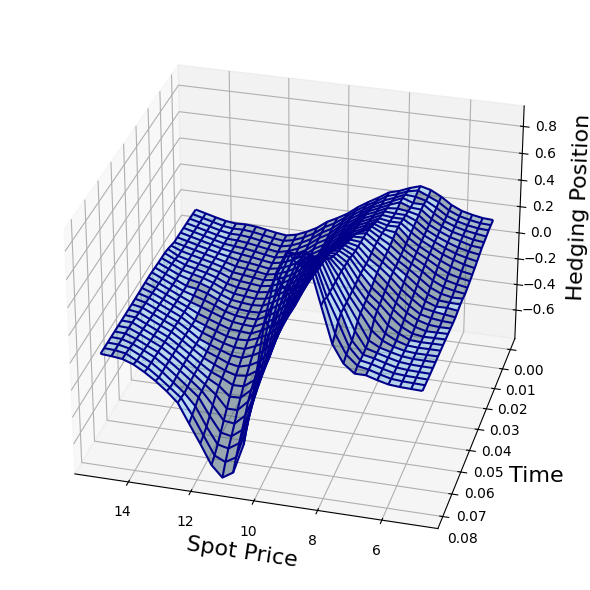

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

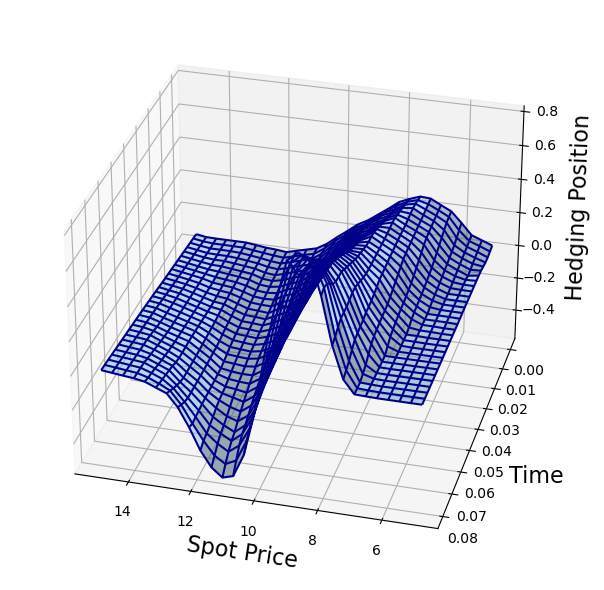

In [6]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid,color = "lightskyblue",alpha = 0.5)
ax.plot_wireframe(X, Y , grid,color = "darkblue",label = "Hedge")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
#plt.legend()
plt.tight_layout()

#plt.legend()
plt.savefig('eps/fig_butterfly_hedge_3d.eps', format='eps')
plt.show()

Depict the Hedging Error

In [7]:
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


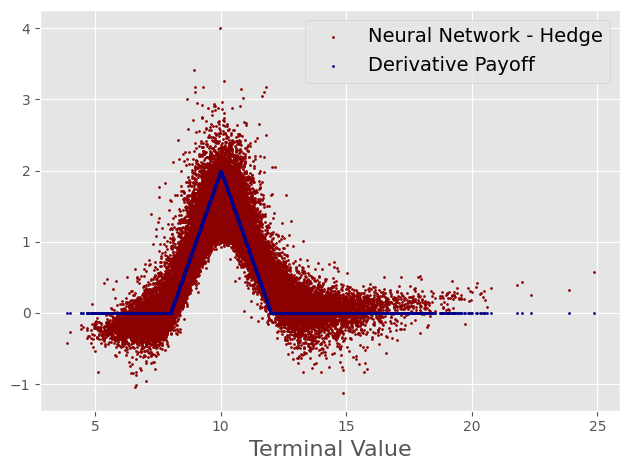

In [8]:
style.use('ggplot')
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('eps/fig_butterfly_hedging_mc.eps', format='eps')
plt.show()


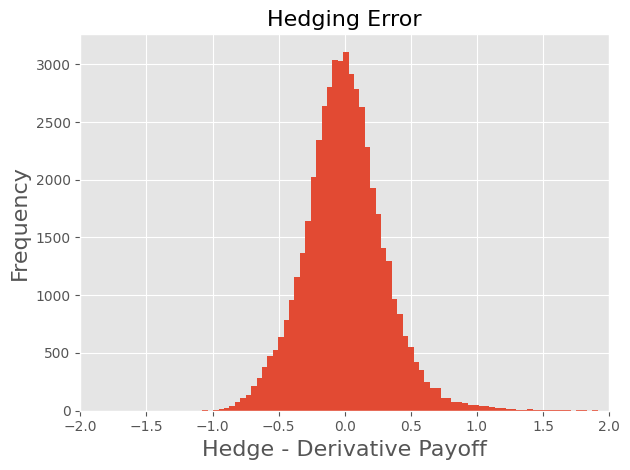

In [9]:
hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
plt.hist(hedging_error,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_butterfly_histogram.eps', format='eps')
plt.show()

Save the model

In [10]:
hedge.save("model_butterfly.h5")

# Training of a hedging strategy with fixed Parameters

Specify setting and compute the non-robust hedge.

In [11]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
# Specify parameters as the mean of the respective intervals.
a_0_fix = [0.5,0.5]
a_1_fix = [0.5,0.5]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-(x_0+2))+tf.nn.relu(path[-1]-(x_0-2))-2*tf.nn.relu(path[-1]-x_0)

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:14<4:00:01,  1.44s/it]

Iteration:10, Price of Hedge: 0.8938604593276978, Loss: 0.442719042301178


  0%|          | 21/10000 [00:29<4:23:07,  1.58s/it]

Iteration:20, Price of Hedge: 0.8914055228233337, Loss: 0.5281753540039062


  0%|          | 31/10000 [00:44<3:38:43,  1.32s/it]

Iteration:30, Price of Hedge: 0.8935324549674988, Loss: 0.41595983505249023


  0%|          | 41/10000 [00:59<3:55:56,  1.42s/it]

Iteration:40, Price of Hedge: 0.9018747806549072, Loss: 0.4006969928741455


  1%|          | 51/10000 [01:11<3:20:47,  1.21s/it]

Iteration:50, Price of Hedge: 0.9031620025634766, Loss: 0.46772944927215576


  1%|          | 61/10000 [01:25<3:21:30,  1.22s/it]

Iteration:60, Price of Hedge: 0.9054698348045349, Loss: 0.4170173406600952


  1%|          | 71/10000 [01:39<4:02:55,  1.47s/it]

Iteration:70, Price of Hedge: 0.8966251015663147, Loss: 0.38122639060020447


  1%|          | 81/10000 [01:52<3:56:33,  1.43s/it]

Iteration:80, Price of Hedge: 0.8939254283905029, Loss: 0.3490281105041504


  1%|          | 91/10000 [02:07<4:01:59,  1.47s/it]

Iteration:90, Price of Hedge: 0.8946354389190674, Loss: 0.3156295418739319


  1%|          | 101/10000 [02:20<3:25:01,  1.24s/it]

Iteration:100, Price of Hedge: 0.8928331136703491, Loss: 0.3319685757160187


  1%|          | 111/10000 [02:35<3:52:25,  1.41s/it]

Iteration:110, Price of Hedge: 0.8908599615097046, Loss: 0.254577100276947


  1%|          | 121/10000 [02:50<3:28:51,  1.27s/it]

Iteration:120, Price of Hedge: 0.8890308737754822, Loss: 0.491568386554718


  1%|▏         | 131/10000 [03:03<3:47:43,  1.38s/it]

Iteration:130, Price of Hedge: 0.8954595327377319, Loss: 0.3017019033432007


  1%|▏         | 141/10000 [03:16<3:27:57,  1.27s/it]

Iteration:140, Price of Hedge: 0.9041023254394531, Loss: 0.2806212306022644


  2%|▏         | 151/10000 [03:30<4:03:12,  1.48s/it]

Iteration:150, Price of Hedge: 0.9053657054901123, Loss: 0.26093024015426636


  2%|▏         | 161/10000 [03:43<3:46:28,  1.38s/it]

Iteration:160, Price of Hedge: 0.8926201462745667, Loss: 0.20281028747558594


  2%|▏         | 171/10000 [03:56<3:43:00,  1.36s/it]

Iteration:170, Price of Hedge: 0.8870850801467896, Loss: 0.25218987464904785


  2%|▏         | 181/10000 [04:11<3:38:00,  1.33s/it]

Iteration:180, Price of Hedge: 0.8924062252044678, Loss: 0.22886252403259277


  2%|▏         | 191/10000 [04:27<3:52:18,  1.42s/it]

Iteration:190, Price of Hedge: 0.9011335372924805, Loss: 0.19535097479820251


  2%|▏         | 201/10000 [04:44<4:19:13,  1.59s/it]

Iteration:200, Price of Hedge: 0.9012324213981628, Loss: 0.23029714822769165


  2%|▏         | 211/10000 [05:00<4:24:03,  1.62s/it]

Iteration:210, Price of Hedge: 0.9108002185821533, Loss: 0.22908641397953033


  2%|▏         | 221/10000 [05:15<3:44:30,  1.38s/it]

Iteration:220, Price of Hedge: 0.913321852684021, Loss: 0.2906820774078369


  2%|▏         | 231/10000 [05:30<3:59:12,  1.47s/it]

Iteration:230, Price of Hedge: 0.9068191051483154, Loss: 0.19063733518123627


  2%|▏         | 241/10000 [05:45<3:59:10,  1.47s/it]

Iteration:240, Price of Hedge: 0.8941232562065125, Loss: 0.2506583034992218


  3%|▎         | 251/10000 [06:01<4:22:38,  1.62s/it]

Iteration:250, Price of Hedge: 0.888095498085022, Loss: 0.23482298851013184


  3%|▎         | 261/10000 [06:16<3:38:03,  1.34s/it]

Iteration:260, Price of Hedge: 0.8974705934524536, Loss: 0.23728668689727783


  3%|▎         | 271/10000 [06:31<4:15:50,  1.58s/it]

Iteration:270, Price of Hedge: 0.9001345038414001, Loss: 0.4413716197013855


  3%|▎         | 281/10000 [06:48<4:21:20,  1.61s/it]

Iteration:280, Price of Hedge: 0.8923781514167786, Loss: 0.3293604850769043


  3%|▎         | 291/10000 [07:04<3:53:17,  1.44s/it]

Iteration:290, Price of Hedge: 0.8864347338676453, Loss: 0.21562913060188293


  3%|▎         | 301/10000 [07:19<3:58:07,  1.47s/it]

Iteration:300, Price of Hedge: 0.888094961643219, Loss: 0.17090226709842682


  3%|▎         | 311/10000 [07:33<3:20:06,  1.24s/it]

Iteration:310, Price of Hedge: 0.9056136608123779, Loss: 0.16327041387557983


  3%|▎         | 321/10000 [07:47<3:38:13,  1.35s/it]

Iteration:320, Price of Hedge: 0.9153597950935364, Loss: 0.15841495990753174


  3%|▎         | 331/10000 [08:02<4:36:10,  1.71s/it]

Iteration:330, Price of Hedge: 0.9067041277885437, Loss: 0.15005075931549072


  3%|▎         | 341/10000 [08:14<3:38:34,  1.36s/it]

Iteration:340, Price of Hedge: 0.8982381820678711, Loss: 0.139692485332489


  4%|▎         | 351/10000 [08:28<3:34:30,  1.33s/it]

Iteration:350, Price of Hedge: 0.9011582136154175, Loss: 0.13086649775505066


  4%|▎         | 361/10000 [08:44<4:01:56,  1.51s/it]

Iteration:360, Price of Hedge: 0.8998870849609375, Loss: 0.16039741039276123


  4%|▎         | 371/10000 [08:57<3:09:17,  1.18s/it]

Iteration:370, Price of Hedge: 0.8930281400680542, Loss: 0.12694202363491058


  4%|▍         | 381/10000 [09:11<3:19:26,  1.24s/it]

Iteration:380, Price of Hedge: 0.8852025866508484, Loss: 0.20510584115982056


  4%|▍         | 391/10000 [09:25<3:53:50,  1.46s/it]

Iteration:390, Price of Hedge: 0.8856188058853149, Loss: 0.16532167792320251


  4%|▍         | 401/10000 [09:38<3:35:55,  1.35s/it]

Iteration:400, Price of Hedge: 0.8933531045913696, Loss: 0.17101964354515076


  4%|▍         | 411/10000 [09:51<3:52:52,  1.46s/it]

Iteration:410, Price of Hedge: 0.897226870059967, Loss: 0.1232142299413681


  4%|▍         | 421/10000 [10:06<4:01:44,  1.51s/it]

Iteration:420, Price of Hedge: 0.8997605443000793, Loss: 0.12212002277374268


  4%|▍         | 431/10000 [10:19<3:16:14,  1.23s/it]

Iteration:430, Price of Hedge: 0.8987451195716858, Loss: 0.16547080874443054


  4%|▍         | 441/10000 [10:34<4:07:11,  1.55s/it]

Iteration:440, Price of Hedge: 0.89752596616745, Loss: 0.14388608932495117


  5%|▍         | 451/10000 [10:50<3:50:10,  1.45s/it]

Iteration:450, Price of Hedge: 0.8961219191551208, Loss: 0.10715755820274353


  5%|▍         | 461/10000 [11:04<3:48:09,  1.44s/it]

Iteration:460, Price of Hedge: 0.9006934762001038, Loss: 0.12112415581941605


  5%|▍         | 471/10000 [11:17<3:14:05,  1.22s/it]

Iteration:470, Price of Hedge: 0.8982712030410767, Loss: 0.12430019676685333


  5%|▍         | 481/10000 [11:30<3:44:24,  1.41s/it]

Iteration:480, Price of Hedge: 0.9137019515037537, Loss: 0.11744289845228195


  5%|▍         | 491/10000 [11:43<3:42:22,  1.40s/it]

Iteration:490, Price of Hedge: 0.9084970951080322, Loss: 0.11507189273834229


  5%|▌         | 501/10000 [11:57<3:41:21,  1.40s/it]

Iteration:500, Price of Hedge: 0.8910208940505981, Loss: 0.09886375814676285


  5%|▌         | 511/10000 [12:12<3:13:29,  1.22s/it]

Iteration:510, Price of Hedge: 0.8874519467353821, Loss: 0.08850838243961334


  5%|▌         | 521/10000 [12:25<3:17:09,  1.25s/it]

Iteration:520, Price of Hedge: 0.8974242806434631, Loss: 0.09360146522521973


  5%|▌         | 531/10000 [12:41<3:45:31,  1.43s/it]

Iteration:530, Price of Hedge: 0.9112874865531921, Loss: 0.11056427657604218


  5%|▌         | 541/10000 [12:55<3:17:43,  1.25s/it]

Iteration:540, Price of Hedge: 0.9185628890991211, Loss: 0.10056676715612411


  6%|▌         | 551/10000 [13:09<3:46:29,  1.44s/it]

Iteration:550, Price of Hedge: 0.9002301096916199, Loss: 0.10832120478153229


  6%|▌         | 561/10000 [13:22<3:27:30,  1.32s/it]

Iteration:560, Price of Hedge: 0.8913436532020569, Loss: 0.1260583996772766


  6%|▌         | 571/10000 [13:35<3:48:58,  1.46s/it]

Iteration:570, Price of Hedge: 0.8900181651115417, Loss: 0.10389299690723419


  6%|▌         | 581/10000 [13:48<3:30:05,  1.34s/it]

Iteration:580, Price of Hedge: 0.9038037657737732, Loss: 0.10017896443605423


  6%|▌         | 591/10000 [14:03<3:55:48,  1.50s/it]

Iteration:590, Price of Hedge: 0.9103426337242126, Loss: 0.11619382351636887


  6%|▌         | 601/10000 [14:16<3:22:55,  1.30s/it]

Iteration:600, Price of Hedge: 0.9034183025360107, Loss: 0.08632363379001617


  6%|▌         | 611/10000 [14:30<3:42:38,  1.42s/it]

Iteration:610, Price of Hedge: 0.9003768563270569, Loss: 0.11182041466236115


  6%|▌         | 621/10000 [14:46<4:01:26,  1.54s/it]

Iteration:620, Price of Hedge: 0.8971679210662842, Loss: 0.09161399304866791


  6%|▋         | 631/10000 [14:59<3:40:38,  1.41s/it]

Iteration:630, Price of Hedge: 0.8990737795829773, Loss: 0.13047060370445251


  6%|▋         | 641/10000 [15:13<3:48:38,  1.47s/it]

Iteration:640, Price of Hedge: 0.89606112241745, Loss: 0.12579473853111267


  7%|▋         | 651/10000 [15:25<2:57:24,  1.14s/it]

Iteration:650, Price of Hedge: 0.8961684107780457, Loss: 0.10576181858778


  7%|▋         | 661/10000 [15:39<3:44:15,  1.44s/it]

Iteration:660, Price of Hedge: 0.8992042541503906, Loss: 0.1172962337732315


  7%|▋         | 671/10000 [15:56<4:19:52,  1.67s/it]

Iteration:670, Price of Hedge: 0.8965829610824585, Loss: 0.08302287757396698


  7%|▋         | 681/10000 [16:13<3:43:51,  1.44s/it]

Iteration:680, Price of Hedge: 0.9006959199905396, Loss: 0.08300940692424774


  7%|▋         | 691/10000 [16:29<3:49:59,  1.48s/it]

Iteration:690, Price of Hedge: 0.9053307175636292, Loss: 0.10160955786705017


  7%|▋         | 701/10000 [16:47<4:43:20,  1.83s/it]

Iteration:700, Price of Hedge: 0.9040068984031677, Loss: 0.12699159979820251


  7%|▋         | 711/10000 [17:02<3:48:10,  1.47s/it]

Iteration:710, Price of Hedge: 0.8957710266113281, Loss: 0.12197104096412659


  7%|▋         | 721/10000 [17:16<3:24:55,  1.33s/it]

Iteration:720, Price of Hedge: 0.8939089775085449, Loss: 0.11273203790187836


  7%|▋         | 731/10000 [17:30<3:38:15,  1.41s/it]

Iteration:730, Price of Hedge: 0.8948532342910767, Loss: 0.0990893542766571


  7%|▋         | 741/10000 [17:46<3:37:31,  1.41s/it]

Iteration:740, Price of Hedge: 0.8965304493904114, Loss: 0.09672875702381134


  8%|▊         | 751/10000 [18:03<4:26:50,  1.73s/it]

Iteration:750, Price of Hedge: 0.8967710137367249, Loss: 0.10949033498764038


  8%|▊         | 761/10000 [18:19<3:48:27,  1.48s/it]

Iteration:760, Price of Hedge: 0.8966277837753296, Loss: 0.08061634004116058


  8%|▊         | 771/10000 [18:33<4:01:53,  1.57s/it]

Iteration:770, Price of Hedge: 0.8989007472991943, Loss: 0.10011310130357742


  8%|▊         | 781/10000 [18:48<3:38:31,  1.42s/it]

Iteration:780, Price of Hedge: 0.8884404301643372, Loss: 0.10060802102088928


  8%|▊         | 791/10000 [19:02<3:30:18,  1.37s/it]

Iteration:790, Price of Hedge: 0.8937469124794006, Loss: 0.086458221077919


  8%|▊         | 801/10000 [19:15<3:24:03,  1.33s/it]

Iteration:800, Price of Hedge: 0.8941440582275391, Loss: 0.1107863336801529


  8%|▊         | 811/10000 [19:29<3:49:00,  1.50s/it]

Iteration:810, Price of Hedge: 0.9009740352630615, Loss: 0.09458842873573303


  8%|▊         | 821/10000 [19:41<3:14:07,  1.27s/it]

Iteration:820, Price of Hedge: 0.8969630002975464, Loss: 0.08434678614139557


  8%|▊         | 831/10000 [19:55<3:29:11,  1.37s/it]

Iteration:830, Price of Hedge: 0.9037657380104065, Loss: 0.08556162565946579


  8%|▊         | 841/10000 [20:09<3:29:05,  1.37s/it]

Iteration:840, Price of Hedge: 0.9089663624763489, Loss: 0.17230454087257385


  9%|▊         | 851/10000 [20:22<3:26:13,  1.35s/it]

Iteration:850, Price of Hedge: 0.8922742009162903, Loss: 0.11032988131046295


  9%|▊         | 861/10000 [20:37<3:49:42,  1.51s/it]

Iteration:860, Price of Hedge: 0.8942951560020447, Loss: 0.0984542965888977


  9%|▊         | 871/10000 [20:53<3:56:50,  1.56s/it]

Iteration:870, Price of Hedge: 0.8887658715248108, Loss: 0.10684286803007126


  9%|▉         | 881/10000 [21:06<3:28:15,  1.37s/it]

Iteration:880, Price of Hedge: 0.8939163684844971, Loss: 0.09758451581001282


  9%|▉         | 891/10000 [21:19<3:49:50,  1.51s/it]

Iteration:890, Price of Hedge: 0.8996800184249878, Loss: 0.08695212006568909


  9%|▉         | 901/10000 [21:32<2:55:33,  1.16s/it]

Iteration:900, Price of Hedge: 0.8951305150985718, Loss: 0.0975397378206253


  9%|▉         | 911/10000 [21:46<3:19:13,  1.32s/it]

Iteration:910, Price of Hedge: 0.8915058970451355, Loss: 0.10303203761577606


  9%|▉         | 921/10000 [21:59<3:45:13,  1.49s/it]

Iteration:920, Price of Hedge: 0.8900340795516968, Loss: 0.10504752397537231


  9%|▉         | 931/10000 [22:14<3:31:25,  1.40s/it]

Iteration:930, Price of Hedge: 0.897576630115509, Loss: 0.10928914695978165


  9%|▉         | 941/10000 [22:27<3:15:28,  1.29s/it]

Iteration:940, Price of Hedge: 0.9045505523681641, Loss: 0.10546177625656128


 10%|▉         | 951/10000 [22:42<4:05:29,  1.63s/it]

Iteration:950, Price of Hedge: 0.901212215423584, Loss: 0.09226158261299133


 10%|▉         | 961/10000 [22:56<3:32:53,  1.41s/it]

Iteration:960, Price of Hedge: 0.895003616809845, Loss: 0.11309123784303665


 10%|▉         | 971/10000 [23:09<3:27:40,  1.38s/it]

Iteration:970, Price of Hedge: 0.8979659676551819, Loss: 0.08880464732646942


 10%|▉         | 981/10000 [23:22<2:51:59,  1.14s/it]

Iteration:980, Price of Hedge: 0.8962368369102478, Loss: 0.10226410627365112


 10%|▉         | 991/10000 [23:36<3:07:44,  1.25s/it]

Iteration:990, Price of Hedge: 0.8986058831214905, Loss: 0.08683708310127258


 10%|█         | 1001/10000 [23:50<3:35:26,  1.44s/it]

Iteration:1000, Price of Hedge: 0.9079689383506775, Loss: 0.10683150589466095


 10%|█         | 1011/10000 [24:04<3:37:08,  1.45s/it]

Iteration:1010, Price of Hedge: 0.9007270336151123, Loss: 0.10751228779554367


 10%|█         | 1021/10000 [24:18<3:35:33,  1.44s/it]

Iteration:1020, Price of Hedge: 0.8954071998596191, Loss: 0.09465964883565903


 10%|█         | 1031/10000 [24:31<3:22:52,  1.36s/it]

Iteration:1030, Price of Hedge: 0.898419201374054, Loss: 0.09532073885202408


 10%|█         | 1041/10000 [24:47<4:09:11,  1.67s/it]

Iteration:1040, Price of Hedge: 0.8960334062576294, Loss: 0.11337999999523163


 11%|█         | 1051/10000 [24:59<2:52:29,  1.16s/it]

Iteration:1050, Price of Hedge: 0.9074302911758423, Loss: 0.09904944151639938


 11%|█         | 1061/10000 [25:13<3:08:55,  1.27s/it]

Iteration:1060, Price of Hedge: 0.902123212814331, Loss: 0.09944230318069458


 11%|█         | 1071/10000 [25:26<3:09:52,  1.28s/it]

Iteration:1070, Price of Hedge: 0.8970777988433838, Loss: 0.09929881989955902


 11%|█         | 1081/10000 [25:39<3:08:53,  1.27s/it]

Iteration:1080, Price of Hedge: 0.888751208782196, Loss: 0.10806535184383392


 11%|█         | 1091/10000 [25:53<3:48:03,  1.54s/it]

Iteration:1090, Price of Hedge: 0.8903356790542603, Loss: 0.08104494214057922


 11%|█         | 1101/10000 [26:07<3:50:30,  1.55s/it]

Iteration:1100, Price of Hedge: 0.8892385363578796, Loss: 0.09436023235321045


 11%|█         | 1111/10000 [26:20<3:02:19,  1.23s/it]

Iteration:1110, Price of Hedge: 0.8862539529800415, Loss: 0.0931614339351654


 11%|█         | 1121/10000 [26:34<3:33:25,  1.44s/it]

Iteration:1120, Price of Hedge: 0.8971450328826904, Loss: 0.09261918067932129


 11%|█▏        | 1131/10000 [26:49<3:32:52,  1.44s/it]

Iteration:1130, Price of Hedge: 0.8979151844978333, Loss: 0.0927370935678482


 11%|█▏        | 1141/10000 [27:03<3:24:24,  1.38s/it]

Iteration:1140, Price of Hedge: 0.8915039300918579, Loss: 0.09000082314014435


 12%|█▏        | 1151/10000 [27:16<3:07:47,  1.27s/it]

Iteration:1150, Price of Hedge: 0.8964391350746155, Loss: 0.0895557552576065


 12%|█▏        | 1161/10000 [27:30<3:43:47,  1.52s/it]

Iteration:1160, Price of Hedge: 0.9053932428359985, Loss: 0.10847672820091248


 12%|█▏        | 1171/10000 [27:42<3:07:12,  1.27s/it]

Iteration:1170, Price of Hedge: 0.8998943567276001, Loss: 0.0930948406457901


 12%|█▏        | 1181/10000 [27:55<3:14:13,  1.32s/it]

Iteration:1180, Price of Hedge: 0.8900014162063599, Loss: 0.11764216423034668


 12%|█▏        | 1191/10000 [28:10<3:21:58,  1.38s/it]

Iteration:1190, Price of Hedge: 0.9008858799934387, Loss: 0.13382482528686523


 12%|█▏        | 1201/10000 [28:23<3:09:35,  1.29s/it]

Iteration:1200, Price of Hedge: 0.9001627564430237, Loss: 0.08227474987506866


 12%|█▏        | 1211/10000 [28:38<3:42:19,  1.52s/it]

Iteration:1210, Price of Hedge: 0.8960217237472534, Loss: 0.11905698478221893


 12%|█▏        | 1221/10000 [28:53<3:47:14,  1.55s/it]

Iteration:1220, Price of Hedge: 0.897350013256073, Loss: 0.10156907141208649


 12%|█▏        | 1231/10000 [29:06<3:26:25,  1.41s/it]

Iteration:1230, Price of Hedge: 0.8976512551307678, Loss: 0.10744137316942215


 12%|█▏        | 1241/10000 [29:19<3:31:32,  1.45s/it]

Iteration:1240, Price of Hedge: 0.8950966596603394, Loss: 0.11923687905073166


 13%|█▎        | 1251/10000 [29:32<2:51:09,  1.17s/it]

Iteration:1250, Price of Hedge: 0.9039782285690308, Loss: 0.09432290494441986


 13%|█▎        | 1261/10000 [29:45<2:54:47,  1.20s/it]

Iteration:1260, Price of Hedge: 0.9065383672714233, Loss: 0.08734060823917389


 13%|█▎        | 1271/10000 [29:59<3:24:17,  1.40s/it]

Iteration:1270, Price of Hedge: 0.9022880792617798, Loss: 0.09479721635580063


 13%|█▎        | 1281/10000 [30:14<3:05:11,  1.27s/it]

Iteration:1280, Price of Hedge: 0.897279679775238, Loss: 0.09956668317317963


 13%|█▎        | 1291/10000 [30:27<3:22:02,  1.39s/it]

Iteration:1290, Price of Hedge: 0.893561840057373, Loss: 0.12946665287017822


 13%|█▎        | 1301/10000 [30:42<4:06:30,  1.70s/it]

Iteration:1300, Price of Hedge: 0.8996526002883911, Loss: 0.09417467564344406


 13%|█▎        | 1311/10000 [30:57<3:42:43,  1.54s/it]

Iteration:1310, Price of Hedge: 0.9096367955207825, Loss: 0.0875571221113205


 13%|█▎        | 1321/10000 [31:09<2:47:31,  1.16s/it]

Iteration:1320, Price of Hedge: 0.9012744426727295, Loss: 0.09381808340549469


 13%|█▎        | 1331/10000 [31:22<3:13:10,  1.34s/it]

Iteration:1330, Price of Hedge: 0.884870707988739, Loss: 0.10131429135799408


 13%|█▎        | 1341/10000 [31:36<3:08:14,  1.30s/it]

Iteration:1340, Price of Hedge: 0.8922932744026184, Loss: 0.09902486205101013


 14%|█▎        | 1351/10000 [31:49<2:55:32,  1.22s/it]

Iteration:1350, Price of Hedge: 0.9012361764907837, Loss: 0.10531948506832123


 14%|█▎        | 1361/10000 [32:03<3:34:46,  1.49s/it]

Iteration:1360, Price of Hedge: 0.898114800453186, Loss: 0.08430634438991547


 14%|█▎        | 1371/10000 [32:17<3:41:09,  1.54s/it]

Iteration:1370, Price of Hedge: 0.8940346240997314, Loss: 0.09019008278846741


 14%|█▍        | 1381/10000 [32:30<3:28:06,  1.45s/it]

Iteration:1380, Price of Hedge: 0.8877629041671753, Loss: 0.10851284861564636


 14%|█▍        | 1391/10000 [32:46<3:53:47,  1.63s/it]

Iteration:1390, Price of Hedge: 0.8935894966125488, Loss: 0.09539280831813812


 14%|█▍        | 1401/10000 [33:00<2:47:31,  1.17s/it]

Iteration:1400, Price of Hedge: 0.8975582718849182, Loss: 0.11106528341770172


 14%|█▍        | 1411/10000 [33:13<3:00:00,  1.26s/it]

Iteration:1410, Price of Hedge: 0.8945285677909851, Loss: 0.09104708582162857


 14%|█▍        | 1421/10000 [33:27<3:07:34,  1.31s/it]

Iteration:1420, Price of Hedge: 0.8827034831047058, Loss: 0.088072270154953


 14%|█▍        | 1431/10000 [33:40<3:03:09,  1.28s/it]

Iteration:1430, Price of Hedge: 0.8937469124794006, Loss: 0.07990389317274094


 14%|█▍        | 1441/10000 [33:54<3:38:31,  1.53s/it]

Iteration:1440, Price of Hedge: 0.8993471264839172, Loss: 0.08189430832862854


 15%|█▍        | 1451/10000 [34:08<4:00:12,  1.69s/it]

Iteration:1450, Price of Hedge: 0.9015588760375977, Loss: 0.08911553770303726


 15%|█▍        | 1461/10000 [34:21<2:56:56,  1.24s/it]

Iteration:1460, Price of Hedge: 0.9017000198364258, Loss: 0.09012685716152191


 15%|█▍        | 1471/10000 [34:34<3:15:10,  1.37s/it]

Iteration:1470, Price of Hedge: 0.9062082171440125, Loss: 0.07812400162220001


 15%|█▍        | 1481/10000 [34:50<3:30:33,  1.48s/it]

Iteration:1480, Price of Hedge: 0.8946129679679871, Loss: 0.08052423596382141


 15%|█▍        | 1491/10000 [35:04<2:58:36,  1.26s/it]

Iteration:1490, Price of Hedge: 0.8884570598602295, Loss: 0.0775391235947609


 15%|█▌        | 1501/10000 [35:18<3:22:30,  1.43s/it]

Iteration:1500, Price of Hedge: 0.9027295112609863, Loss: 0.08134792745113373


 15%|█▌        | 1511/10000 [35:30<3:04:28,  1.30s/it]

Iteration:1510, Price of Hedge: 0.9019914865493774, Loss: 0.08674825727939606


 15%|█▌        | 1521/10000 [35:44<3:23:13,  1.44s/it]

Iteration:1520, Price of Hedge: 0.8934279084205627, Loss: 0.07967007160186768


 15%|█▌        | 1531/10000 [35:56<2:53:31,  1.23s/it]

Iteration:1530, Price of Hedge: 0.8973482847213745, Loss: 0.08419306576251984


 15%|█▌        | 1541/10000 [36:11<3:24:27,  1.45s/it]

Iteration:1540, Price of Hedge: 0.899430513381958, Loss: 0.0648081973195076


 16%|█▌        | 1551/10000 [36:27<3:10:15,  1.35s/it]

Iteration:1550, Price of Hedge: 0.8929420113563538, Loss: 0.06502430140972137


 16%|█▌        | 1561/10000 [36:42<3:28:08,  1.48s/it]

Iteration:1560, Price of Hedge: 0.8974798321723938, Loss: 0.04272341728210449


 16%|█▌        | 1571/10000 [36:57<3:27:52,  1.48s/it]

Iteration:1570, Price of Hedge: 0.9038031697273254, Loss: 0.037060633301734924


 16%|█▌        | 1581/10000 [37:10<2:55:35,  1.25s/it]

Iteration:1580, Price of Hedge: 0.9005031585693359, Loss: 0.05804337561130524


 16%|█▌        | 1591/10000 [37:24<3:05:40,  1.32s/it]

Iteration:1590, Price of Hedge: 0.8977733254432678, Loss: 0.04858972132205963


 16%|█▌        | 1601/10000 [37:37<3:30:00,  1.50s/it]

Iteration:1600, Price of Hedge: 0.8924757838249207, Loss: 0.06502393633127213


 16%|█▌        | 1611/10000 [37:49<3:01:58,  1.30s/it]

Iteration:1610, Price of Hedge: 0.896403431892395, Loss: 0.07093741744756699


 16%|█▌        | 1621/10000 [38:04<3:06:42,  1.34s/it]

Iteration:1620, Price of Hedge: 0.8996049165725708, Loss: 0.047955602407455444


 16%|█▋        | 1631/10000 [38:18<2:50:30,  1.22s/it]

Iteration:1630, Price of Hedge: 0.9021292924880981, Loss: 0.046468354761600494


 16%|█▋        | 1641/10000 [38:31<3:01:35,  1.30s/it]

Iteration:1640, Price of Hedge: 0.8957905173301697, Loss: 0.04439302161335945


 17%|█▋        | 1651/10000 [38:46<3:38:27,  1.57s/it]

Iteration:1650, Price of Hedge: 0.8948419690132141, Loss: 0.035907816141843796


 17%|█▋        | 1661/10000 [39:01<3:07:12,  1.35s/it]

Iteration:1660, Price of Hedge: 0.8945505619049072, Loss: 0.03437177091836929


 17%|█▋        | 1671/10000 [39:15<3:25:29,  1.48s/it]

Iteration:1670, Price of Hedge: 0.8968461751937866, Loss: 0.0686085969209671


 17%|█▋        | 1681/10000 [39:28<3:10:03,  1.37s/it]

Iteration:1680, Price of Hedge: 0.8999917507171631, Loss: 0.05545467138290405


 17%|█▋        | 1691/10000 [39:41<3:15:42,  1.41s/it]

Iteration:1690, Price of Hedge: 0.9046291708946228, Loss: 0.047950923442840576


 17%|█▋        | 1701/10000 [39:54<2:56:45,  1.28s/it]

Iteration:1700, Price of Hedge: 0.8985437750816345, Loss: 0.05212312191724777


 17%|█▋        | 1711/10000 [40:09<3:21:29,  1.46s/it]

Iteration:1710, Price of Hedge: 0.8957434296607971, Loss: 0.04747603088617325


 17%|█▋        | 1721/10000 [40:22<2:44:43,  1.19s/it]

Iteration:1720, Price of Hedge: 0.9006927609443665, Loss: 0.052874162793159485


 17%|█▋        | 1731/10000 [40:36<2:57:15,  1.29s/it]

Iteration:1730, Price of Hedge: 0.8949469327926636, Loss: 0.047042496502399445


 17%|█▋        | 1741/10000 [40:52<3:36:17,  1.57s/it]

Iteration:1740, Price of Hedge: 0.8996480703353882, Loss: 0.034285664558410645


 18%|█▊        | 1751/10000 [41:06<3:19:07,  1.45s/it]

Iteration:1750, Price of Hedge: 0.9000751376152039, Loss: 0.040009260177612305


 18%|█▊        | 1761/10000 [41:19<3:05:26,  1.35s/it]

Iteration:1760, Price of Hedge: 0.9049885272979736, Loss: 0.04019688069820404


 18%|█▊        | 1771/10000 [41:32<3:00:22,  1.32s/it]

Iteration:1770, Price of Hedge: 0.8985129594802856, Loss: 0.04815558344125748


 18%|█▊        | 1781/10000 [41:46<3:09:58,  1.39s/it]

Iteration:1780, Price of Hedge: 0.8962276577949524, Loss: 0.052949316799640656


 18%|█▊        | 1791/10000 [41:59<2:44:06,  1.20s/it]

Iteration:1790, Price of Hedge: 0.9015605449676514, Loss: 0.030351636931300163


 18%|█▊        | 1801/10000 [42:14<2:57:50,  1.30s/it]

Iteration:1800, Price of Hedge: 0.904654860496521, Loss: 0.043450504541397095


 18%|█▊        | 1811/10000 [42:27<2:59:14,  1.31s/it]

Iteration:1810, Price of Hedge: 0.8963056206703186, Loss: 0.03708921745419502


 18%|█▊        | 1821/10000 [42:42<3:47:10,  1.67s/it]

Iteration:1820, Price of Hedge: 0.8912737965583801, Loss: 0.03668728470802307


 18%|█▊        | 1831/10000 [42:57<3:28:57,  1.53s/it]

Iteration:1830, Price of Hedge: 0.9031698703765869, Loss: 0.046245027333498


 18%|█▊        | 1841/10000 [43:09<2:51:50,  1.26s/it]

Iteration:1840, Price of Hedge: 0.8989036679267883, Loss: 0.039760440587997437


 19%|█▊        | 1851/10000 [43:23<2:45:34,  1.22s/it]

Iteration:1850, Price of Hedge: 0.8874802589416504, Loss: 0.05633384734392166


 19%|█▊        | 1861/10000 [43:36<3:08:12,  1.39s/it]

Iteration:1860, Price of Hedge: 0.8892542719841003, Loss: 0.036359503865242004


 19%|█▊        | 1871/10000 [43:49<2:43:23,  1.21s/it]

Iteration:1870, Price of Hedge: 0.8946326375007629, Loss: 0.05747901275753975


 19%|█▉        | 1881/10000 [44:03<3:14:53,  1.44s/it]

Iteration:1880, Price of Hedge: 0.8998782634735107, Loss: 0.0486094206571579


 19%|█▉        | 1891/10000 [44:18<3:15:27,  1.45s/it]

Iteration:1890, Price of Hedge: 0.8952680230140686, Loss: 0.06307069957256317


 19%|█▉        | 1901/10000 [44:30<2:57:53,  1.32s/it]

Iteration:1900, Price of Hedge: 0.8953437805175781, Loss: 0.0355721041560173


 19%|█▉        | 1911/10000 [44:45<3:24:12,  1.51s/it]

Iteration:1910, Price of Hedge: 0.8956348896026611, Loss: 0.045949436724185944


 19%|█▉        | 1921/10000 [45:00<3:04:58,  1.37s/it]

Iteration:1920, Price of Hedge: 0.8951178193092346, Loss: 0.04010628163814545


 19%|█▉        | 1931/10000 [45:13<2:35:43,  1.16s/it]

Iteration:1930, Price of Hedge: 0.8936099410057068, Loss: 0.027138464152812958


 19%|█▉        | 1941/10000 [45:27<2:54:12,  1.30s/it]

Iteration:1940, Price of Hedge: 0.8965488076210022, Loss: 0.03954073041677475


 20%|█▉        | 1951/10000 [45:40<3:19:16,  1.49s/it]

Iteration:1950, Price of Hedge: 0.896726667881012, Loss: 0.03763401880860329


 20%|█▉        | 1961/10000 [45:54<3:10:57,  1.43s/it]

Iteration:1960, Price of Hedge: 0.8984025120735168, Loss: 0.0357540100812912


 20%|█▉        | 1971/10000 [46:08<3:35:56,  1.61s/it]

Iteration:1970, Price of Hedge: 0.8997876644134521, Loss: 0.040757130831480026


 20%|█▉        | 1981/10000 [46:22<3:10:21,  1.42s/it]

Iteration:1980, Price of Hedge: 0.8998457789421082, Loss: 0.04546041786670685


 20%|█▉        | 1991/10000 [46:36<3:15:15,  1.46s/it]

Iteration:1990, Price of Hedge: 0.8951760530471802, Loss: 0.042717210948467255


 20%|██        | 2001/10000 [46:53<3:44:14,  1.68s/it]

Iteration:2000, Price of Hedge: 0.8982955813407898, Loss: 0.031182700768113136


 20%|██        | 2011/10000 [47:09<3:20:05,  1.50s/it]

Iteration:2010, Price of Hedge: 0.8947820067405701, Loss: 0.033253200352191925


 20%|██        | 2021/10000 [47:24<3:15:00,  1.47s/it]

Iteration:2020, Price of Hedge: 0.9000841975212097, Loss: 0.039395615458488464


 20%|██        | 2031/10000 [47:39<3:12:37,  1.45s/it]

Iteration:2030, Price of Hedge: 0.9045436978340149, Loss: 0.05442200228571892


 20%|██        | 2041/10000 [47:53<3:09:07,  1.43s/it]

Iteration:2040, Price of Hedge: 0.8997867703437805, Loss: 0.03876524418592453


 21%|██        | 2051/10000 [48:09<3:36:57,  1.64s/it]

Iteration:2050, Price of Hedge: 0.8922693729400635, Loss: 0.034330613911151886


 21%|██        | 2061/10000 [48:25<3:23:04,  1.53s/it]

Iteration:2060, Price of Hedge: 0.8918055295944214, Loss: 0.03785747289657593


 21%|██        | 2071/10000 [48:41<3:33:20,  1.61s/it]

Iteration:2070, Price of Hedge: 0.8947332501411438, Loss: 0.03773798048496246


 21%|██        | 2081/10000 [48:59<3:28:51,  1.58s/it]

Iteration:2080, Price of Hedge: 0.8961663246154785, Loss: 0.0422673299908638


 21%|██        | 2091/10000 [49:13<2:41:49,  1.23s/it]

Iteration:2090, Price of Hedge: 0.89798504114151, Loss: 0.036861829459667206


 21%|██        | 2101/10000 [49:27<3:04:50,  1.40s/it]

Iteration:2100, Price of Hedge: 0.9001765251159668, Loss: 0.027305833995342255


 21%|██        | 2111/10000 [49:40<2:47:08,  1.27s/it]

Iteration:2110, Price of Hedge: 0.9070169925689697, Loss: 0.032783664762973785


 21%|██        | 2121/10000 [49:54<3:21:41,  1.54s/it]

Iteration:2120, Price of Hedge: 0.907408595085144, Loss: 0.03359381854534149


 21%|██▏       | 2131/10000 [50:08<3:34:52,  1.64s/it]

Iteration:2130, Price of Hedge: 0.9010616540908813, Loss: 0.03602560609579086


 21%|██▏       | 2141/10000 [50:21<2:38:13,  1.21s/it]

Iteration:2140, Price of Hedge: 0.8963964581489563, Loss: 0.028433669358491898


 22%|██▏       | 2151/10000 [50:34<2:53:33,  1.33s/it]

Iteration:2150, Price of Hedge: 0.8917884826660156, Loss: 0.04088486731052399


 22%|██▏       | 2161/10000 [50:49<3:21:59,  1.55s/it]

Iteration:2160, Price of Hedge: 0.9035257697105408, Loss: 0.04460759460926056


 22%|██▏       | 2171/10000 [51:04<2:53:55,  1.33s/it]

Iteration:2170, Price of Hedge: 0.9127354025840759, Loss: 0.03892647475004196


 22%|██▏       | 2181/10000 [51:17<2:57:35,  1.36s/it]

Iteration:2180, Price of Hedge: 0.8989178538322449, Loss: 0.03192749619483948


 22%|██▏       | 2191/10000 [51:31<2:53:06,  1.33s/it]

Iteration:2190, Price of Hedge: 0.8919666409492493, Loss: 0.04202665388584137


 22%|██▏       | 2201/10000 [51:44<3:08:15,  1.45s/it]

Iteration:2200, Price of Hedge: 0.8912115693092346, Loss: 0.048258863389492035


 22%|██▏       | 2211/10000 [51:56<2:36:59,  1.21s/it]

Iteration:2210, Price of Hedge: 0.8915708065032959, Loss: 0.043775785714387894


 22%|██▏       | 2221/10000 [52:11<2:52:17,  1.33s/it]

Iteration:2220, Price of Hedge: 0.8999691009521484, Loss: 0.034028198570013046


 22%|██▏       | 2231/10000 [52:25<3:02:13,  1.41s/it]

Iteration:2230, Price of Hedge: 0.8999941349029541, Loss: 0.04882387816905975


 22%|██▏       | 2241/10000 [52:38<2:34:29,  1.19s/it]

Iteration:2240, Price of Hedge: 0.9045504331588745, Loss: 0.02853165753185749


 23%|██▎       | 2251/10000 [52:53<3:18:53,  1.54s/it]

Iteration:2250, Price of Hedge: 0.8891429901123047, Loss: 0.03849324956536293


 23%|██▎       | 2261/10000 [53:08<3:11:14,  1.48s/it]

Iteration:2260, Price of Hedge: 0.8939169645309448, Loss: 0.03436008840799332


 23%|██▎       | 2271/10000 [53:21<3:02:27,  1.42s/it]

Iteration:2270, Price of Hedge: 0.9022448062896729, Loss: 0.034384243190288544


 23%|██▎       | 2281/10000 [53:34<3:00:56,  1.41s/it]

Iteration:2280, Price of Hedge: 0.9014032483100891, Loss: 0.0364399179816246


 23%|██▎       | 2291/10000 [53:47<2:47:36,  1.30s/it]

Iteration:2290, Price of Hedge: 0.8936382532119751, Loss: 0.03540782630443573


 23%|██▎       | 2301/10000 [54:00<2:32:36,  1.19s/it]

Iteration:2300, Price of Hedge: 0.8927559852600098, Loss: 0.04077690839767456


 23%|██▎       | 2311/10000 [54:16<2:45:30,  1.29s/it]

Iteration:2310, Price of Hedge: 0.8894991278648376, Loss: 0.042184121906757355


 23%|██▎       | 2321/10000 [54:29<2:41:22,  1.26s/it]

Iteration:2320, Price of Hedge: 0.8974061012268066, Loss: 0.05725342035293579


 23%|██▎       | 2331/10000 [54:44<3:17:12,  1.54s/it]

Iteration:2330, Price of Hedge: 0.8999950289726257, Loss: 0.03642614558339119


 23%|██▎       | 2341/10000 [54:59<3:15:29,  1.53s/it]

Iteration:2340, Price of Hedge: 0.9016233086585999, Loss: 0.033932290971279144


 24%|██▎       | 2351/10000 [55:13<3:13:54,  1.52s/it]

Iteration:2350, Price of Hedge: 0.8950899839401245, Loss: 0.038348495960235596


 24%|██▎       | 2361/10000 [55:25<2:40:30,  1.26s/it]

Iteration:2360, Price of Hedge: 0.8918302655220032, Loss: 0.028118178248405457


 24%|██▎       | 2371/10000 [55:41<3:15:47,  1.54s/it]

Iteration:2370, Price of Hedge: 0.8995769023895264, Loss: 0.03456835448741913


 24%|██▍       | 2381/10000 [55:56<3:11:49,  1.51s/it]

Iteration:2380, Price of Hedge: 0.9021600484848022, Loss: 0.03492017835378647


 24%|██▍       | 2391/10000 [56:13<3:29:25,  1.65s/it]

Iteration:2390, Price of Hedge: 0.8960646390914917, Loss: 0.04166393727064133


 24%|██▍       | 2401/10000 [56:28<3:14:57,  1.54s/it]

Iteration:2400, Price of Hedge: 0.8955603241920471, Loss: 0.028883805498480797


 24%|██▍       | 2411/10000 [56:43<3:04:41,  1.46s/it]

Iteration:2410, Price of Hedge: 0.9012364149093628, Loss: 0.03402700275182724


 24%|██▍       | 2421/10000 [56:59<2:55:06,  1.39s/it]

Iteration:2420, Price of Hedge: 0.899976909160614, Loss: 0.031209174543619156


 24%|██▍       | 2431/10000 [57:13<2:48:32,  1.34s/it]

Iteration:2430, Price of Hedge: 0.8948416113853455, Loss: 0.033406373113393784


 24%|██▍       | 2441/10000 [57:28<2:53:13,  1.38s/it]

Iteration:2440, Price of Hedge: 0.8895776867866516, Loss: 0.04235749691724777


 25%|██▍       | 2451/10000 [57:42<3:01:30,  1.44s/it]

Iteration:2450, Price of Hedge: 0.9074597358703613, Loss: 0.028521178290247917


 25%|██▍       | 2461/10000 [57:54<2:45:00,  1.31s/it]

Iteration:2460, Price of Hedge: 0.9009379148483276, Loss: 0.037786759436130524


 25%|██▍       | 2471/10000 [58:09<3:21:43,  1.61s/it]

Iteration:2470, Price of Hedge: 0.8930436968803406, Loss: 0.03373878821730614


 25%|██▍       | 2481/10000 [58:22<3:03:03,  1.46s/it]

Iteration:2480, Price of Hedge: 0.9023123979568481, Loss: 0.03351999446749687


 25%|██▍       | 2491/10000 [58:35<2:26:37,  1.17s/it]

Iteration:2490, Price of Hedge: 0.8989412784576416, Loss: 0.04069108888506889


 25%|██▌       | 2501/10000 [58:50<3:01:18,  1.45s/it]

Iteration:2500, Price of Hedge: 0.8997065424919128, Loss: 0.03670491278171539


 25%|██▌       | 2511/10000 [59:05<2:55:43,  1.41s/it]

Iteration:2510, Price of Hedge: 0.8986239433288574, Loss: 0.02427913248538971


 25%|██▌       | 2521/10000 [59:19<2:30:40,  1.21s/it]

Iteration:2520, Price of Hedge: 0.8951330184936523, Loss: 0.046009063720703125


 25%|██▌       | 2531/10000 [59:33<2:47:34,  1.35s/it]

Iteration:2530, Price of Hedge: 0.89996737241745, Loss: 0.030135326087474823


 25%|██▌       | 2541/10000 [59:46<3:02:02,  1.46s/it]

Iteration:2540, Price of Hedge: 0.9073199033737183, Loss: 0.039568863809108734


 26%|██▌       | 2551/10000 [59:59<2:52:48,  1.39s/it]

Iteration:2550, Price of Hedge: 0.8979895710945129, Loss: 0.039770953357219696


 26%|██▌       | 2561/10000 [1:00:13<2:50:00,  1.37s/it]

Iteration:2560, Price of Hedge: 0.8926308155059814, Loss: 0.03582276403903961


 26%|██▌       | 2571/10000 [1:00:27<2:44:25,  1.33s/it]

Iteration:2570, Price of Hedge: 0.8919630646705627, Loss: 0.0470513254404068


 26%|██▌       | 2581/10000 [1:00:40<2:42:46,  1.32s/it]

Iteration:2580, Price of Hedge: 0.8979829549789429, Loss: 0.028194870799779892


 26%|██▌       | 2591/10000 [1:00:56<3:21:01,  1.63s/it]

Iteration:2590, Price of Hedge: 0.8838095664978027, Loss: 0.038184694945812225


 26%|██▌       | 2601/10000 [1:01:10<2:52:58,  1.40s/it]

Iteration:2600, Price of Hedge: 0.8972488641738892, Loss: 0.028319958597421646


 26%|██▌       | 2611/10000 [1:01:23<2:35:54,  1.27s/it]

Iteration:2610, Price of Hedge: 0.9014838933944702, Loss: 0.02965555340051651


 26%|██▌       | 2621/10000 [1:01:37<3:07:19,  1.52s/it]

Iteration:2620, Price of Hedge: 0.8989399671554565, Loss: 0.027552932500839233


 26%|██▋       | 2631/10000 [1:01:49<2:33:31,  1.25s/it]

Iteration:2630, Price of Hedge: 0.9051934480667114, Loss: 0.04312078654766083


 26%|██▋       | 2641/10000 [1:02:03<2:45:16,  1.35s/it]

Iteration:2640, Price of Hedge: 0.9052426218986511, Loss: 0.031606584787368774


 27%|██▋       | 2651/10000 [1:02:18<2:42:17,  1.33s/it]

Iteration:2650, Price of Hedge: 0.8949557542800903, Loss: 0.049303874373435974


 27%|██▋       | 2661/10000 [1:02:31<2:44:05,  1.34s/it]

Iteration:2660, Price of Hedge: 0.8962966799736023, Loss: 0.034167930483818054


 27%|██▋       | 2671/10000 [1:02:44<2:37:15,  1.29s/it]

Iteration:2670, Price of Hedge: 0.8980613946914673, Loss: 0.03020613081753254


 27%|██▋       | 2681/10000 [1:03:01<3:25:10,  1.68s/it]

Iteration:2680, Price of Hedge: 0.8964816331863403, Loss: 0.031116070225834846


 27%|██▋       | 2691/10000 [1:03:14<2:50:02,  1.40s/it]

Iteration:2690, Price of Hedge: 0.8967879414558411, Loss: 0.03261015564203262


 27%|██▋       | 2701/10000 [1:03:27<2:55:18,  1.44s/it]

Iteration:2700, Price of Hedge: 0.8962563276290894, Loss: 0.025945112109184265


 27%|██▋       | 2711/10000 [1:03:39<2:21:28,  1.16s/it]

Iteration:2710, Price of Hedge: 0.8966264724731445, Loss: 0.036083564162254333


 27%|██▋       | 2721/10000 [1:03:53<2:27:23,  1.21s/it]

Iteration:2720, Price of Hedge: 0.8974701166152954, Loss: 0.05694133788347244


 27%|██▋       | 2731/10000 [1:04:07<3:03:01,  1.51s/it]

Iteration:2730, Price of Hedge: 0.9063459038734436, Loss: 0.05538337305188179


 27%|██▋       | 2741/10000 [1:04:22<2:44:24,  1.36s/it]

Iteration:2740, Price of Hedge: 0.8987619876861572, Loss: 0.04577849060297012


 28%|██▊       | 2751/10000 [1:04:35<2:58:43,  1.48s/it]

Iteration:2750, Price of Hedge: 0.8812597393989563, Loss: 0.029978759586811066


 28%|██▊       | 2761/10000 [1:04:49<3:21:39,  1.67s/it]

Iteration:2760, Price of Hedge: 0.9006548523902893, Loss: 0.07130235433578491


 28%|██▊       | 2771/10000 [1:05:05<3:23:43,  1.69s/it]

Iteration:2770, Price of Hedge: 0.909778892993927, Loss: 0.052081190049648285


 28%|██▊       | 2781/10000 [1:05:17<2:28:50,  1.24s/it]

Iteration:2780, Price of Hedge: 0.9043558239936829, Loss: 0.03843577206134796


 28%|██▊       | 2791/10000 [1:05:31<2:44:45,  1.37s/it]

Iteration:2790, Price of Hedge: 0.8868325352668762, Loss: 0.03456550091505051


 28%|██▊       | 2801/10000 [1:05:44<2:36:54,  1.31s/it]

Iteration:2800, Price of Hedge: 0.899137556552887, Loss: 0.02893863618373871


 28%|██▊       | 2811/10000 [1:05:58<2:28:24,  1.24s/it]

Iteration:2810, Price of Hedge: 0.902795672416687, Loss: 0.02807539328932762


 28%|██▊       | 2821/10000 [1:06:12<2:53:22,  1.45s/it]

Iteration:2820, Price of Hedge: 0.8997341394424438, Loss: 0.02950148656964302


 28%|██▊       | 2831/10000 [1:06:26<2:58:22,  1.49s/it]

Iteration:2830, Price of Hedge: 0.8940255641937256, Loss: 0.054432306438684464


 28%|██▊       | 2841/10000 [1:06:40<2:54:41,  1.46s/it]

Iteration:2840, Price of Hedge: 0.8959852457046509, Loss: 0.04282247647643089


 29%|██▊       | 2851/10000 [1:06:54<3:04:27,  1.55s/it]

Iteration:2850, Price of Hedge: 0.8965421915054321, Loss: 0.034229353070259094


 29%|██▊       | 2861/10000 [1:07:08<2:33:12,  1.29s/it]

Iteration:2860, Price of Hedge: 0.9034976363182068, Loss: 0.03729899972677231


 29%|██▊       | 2871/10000 [1:07:22<2:25:01,  1.22s/it]

Iteration:2870, Price of Hedge: 0.8957223892211914, Loss: 0.03249196335673332


 29%|██▉       | 2881/10000 [1:07:35<2:41:25,  1.36s/it]

Iteration:2880, Price of Hedge: 0.8941963911056519, Loss: 0.034119948744773865


 29%|██▉       | 2891/10000 [1:07:48<2:24:59,  1.22s/it]

Iteration:2890, Price of Hedge: 0.9021364450454712, Loss: 0.03296782076358795


 29%|██▉       | 2901/10000 [1:08:02<2:52:51,  1.46s/it]

Iteration:2900, Price of Hedge: 0.8953643441200256, Loss: 0.05407708138227463


 29%|██▉       | 2911/10000 [1:08:17<3:11:31,  1.62s/it]

Iteration:2910, Price of Hedge: 0.8917190432548523, Loss: 0.03508558124303818


 29%|██▉       | 2921/10000 [1:08:29<2:22:13,  1.21s/it]

Iteration:2920, Price of Hedge: 0.9039348363876343, Loss: 0.05115405470132828


 29%|██▉       | 2931/10000 [1:08:42<2:28:14,  1.26s/it]

Iteration:2930, Price of Hedge: 0.9041082859039307, Loss: 0.0387471504509449


 29%|██▉       | 2941/10000 [1:08:58<2:53:32,  1.48s/it]

Iteration:2940, Price of Hedge: 0.8993710279464722, Loss: 0.03219103068113327


 30%|██▉       | 2951/10000 [1:09:12<2:31:23,  1.29s/it]

Iteration:2950, Price of Hedge: 0.892497181892395, Loss: 0.02857362851500511


 30%|██▉       | 2961/10000 [1:09:25<2:39:31,  1.36s/it]

Iteration:2960, Price of Hedge: 0.9009402990341187, Loss: 0.03827069699764252


 30%|██▉       | 2971/10000 [1:09:38<2:32:14,  1.30s/it]

Iteration:2970, Price of Hedge: 0.9027801752090454, Loss: 0.038343701511621475


 30%|██▉       | 2981/10000 [1:09:52<2:56:21,  1.51s/it]

Iteration:2980, Price of Hedge: 0.8998004794120789, Loss: 0.03819780796766281


 30%|██▉       | 2991/10000 [1:10:04<2:15:59,  1.16s/it]

Iteration:2990, Price of Hedge: 0.8896032571792603, Loss: 0.03284728527069092


 30%|███       | 3001/10000 [1:10:19<2:28:20,  1.27s/it]

Iteration:3000, Price of Hedge: 0.8957833647727966, Loss: 0.03263426199555397


 30%|███       | 3011/10000 [1:10:33<2:44:11,  1.41s/it]

Iteration:3010, Price of Hedge: 0.9007607698440552, Loss: 0.033104948699474335


 30%|███       | 3021/10000 [1:10:47<3:05:47,  1.60s/it]

Iteration:3020, Price of Hedge: 0.9040379524230957, Loss: 0.038003332912921906


 30%|███       | 3031/10000 [1:11:03<2:53:24,  1.49s/it]

Iteration:3030, Price of Hedge: 0.8959113359451294, Loss: 0.05032303184270859


 30%|███       | 3041/10000 [1:11:17<2:31:26,  1.31s/it]

Iteration:3040, Price of Hedge: 0.8934701681137085, Loss: 0.03121437132358551


 31%|███       | 3051/10000 [1:11:31<2:48:19,  1.45s/it]

Iteration:3050, Price of Hedge: 0.8943597078323364, Loss: 0.03254087641835213


 31%|███       | 3061/10000 [1:11:44<2:40:26,  1.39s/it]

Iteration:3060, Price of Hedge: 0.8970023989677429, Loss: 0.03375866264104843


 31%|███       | 3071/10000 [1:11:57<2:37:33,  1.36s/it]

Iteration:3070, Price of Hedge: 0.8957468271255493, Loss: 0.03264903277158737


 31%|███       | 3081/10000 [1:12:11<2:53:26,  1.50s/it]

Iteration:3080, Price of Hedge: 0.8944541215896606, Loss: 0.030326899141073227


 31%|███       | 3091/10000 [1:12:25<2:37:25,  1.37s/it]

Iteration:3090, Price of Hedge: 0.9013185501098633, Loss: 0.04542992264032364


 31%|███       | 3101/10000 [1:12:38<2:14:09,  1.17s/it]

Iteration:3100, Price of Hedge: 0.8973101377487183, Loss: 0.02859397977590561


 31%|███       | 3111/10000 [1:12:52<2:43:32,  1.42s/it]

Iteration:3110, Price of Hedge: 0.8914536237716675, Loss: 0.03038332611322403


 31%|███       | 3121/10000 [1:13:08<2:56:58,  1.54s/it]

Iteration:3120, Price of Hedge: 0.8948522210121155, Loss: 0.03778599575161934


 31%|███▏      | 3131/10000 [1:13:21<2:41:44,  1.41s/it]

Iteration:3130, Price of Hedge: 0.9046613574028015, Loss: 0.041302550584077835


 31%|███▏      | 3141/10000 [1:13:34<2:34:43,  1.35s/it]

Iteration:3140, Price of Hedge: 0.8936383128166199, Loss: 0.03471126779913902


 32%|███▏      | 3151/10000 [1:13:47<2:13:02,  1.17s/it]

Iteration:3150, Price of Hedge: 0.8927338123321533, Loss: 0.03170730173587799


 32%|███▏      | 3161/10000 [1:14:01<2:42:10,  1.42s/it]

Iteration:3160, Price of Hedge: 0.8960580229759216, Loss: 0.034400131553411484


 32%|███▏      | 3171/10000 [1:14:15<3:01:49,  1.60s/it]

Iteration:3170, Price of Hedge: 0.9073799252510071, Loss: 0.03597458079457283


 32%|███▏      | 3181/10000 [1:14:29<2:31:30,  1.33s/it]

Iteration:3180, Price of Hedge: 0.8962026834487915, Loss: 0.037095919251441956


 32%|███▏      | 3191/10000 [1:14:42<2:35:56,  1.37s/it]

Iteration:3190, Price of Hedge: 0.8954355716705322, Loss: 0.041594259440898895


 32%|███▏      | 3201/10000 [1:14:58<3:04:12,  1.63s/it]

Iteration:3200, Price of Hedge: 0.8943148255348206, Loss: 0.03176675736904144


 32%|███▏      | 3211/10000 [1:15:13<2:47:18,  1.48s/it]

Iteration:3210, Price of Hedge: 0.9039382338523865, Loss: 0.032403551042079926


 32%|███▏      | 3221/10000 [1:15:26<2:38:32,  1.40s/it]

Iteration:3220, Price of Hedge: 0.89919114112854, Loss: 0.0391906201839447


 32%|███▏      | 3231/10000 [1:15:39<2:19:47,  1.24s/it]

Iteration:3230, Price of Hedge: 0.8947484493255615, Loss: 0.03432263433933258


 32%|███▏      | 3241/10000 [1:15:52<2:11:32,  1.17s/it]

Iteration:3240, Price of Hedge: 0.8996254801750183, Loss: 0.027630839496850967


 33%|███▎      | 3251/10000 [1:16:06<2:27:47,  1.31s/it]

Iteration:3250, Price of Hedge: 0.8928726315498352, Loss: 0.03629889339208603


 33%|███▎      | 3261/10000 [1:16:21<2:27:21,  1.31s/it]

Iteration:3260, Price of Hedge: 0.8982089161872864, Loss: 0.04044110327959061


 33%|███▎      | 3271/10000 [1:16:35<2:46:30,  1.48s/it]

Iteration:3270, Price of Hedge: 0.8992753028869629, Loss: 0.039525579661130905


 33%|███▎      | 3281/10000 [1:16:48<2:50:29,  1.52s/it]

Iteration:3280, Price of Hedge: 0.8858891725540161, Loss: 0.04207451641559601


 33%|███▎      | 3291/10000 [1:17:03<3:06:22,  1.67s/it]

Iteration:3290, Price of Hedge: 0.8874092102050781, Loss: 0.03438899666070938


 33%|███▎      | 3301/10000 [1:17:17<2:15:15,  1.21s/it]

Iteration:3300, Price of Hedge: 0.9013848304748535, Loss: 0.03409729152917862


 33%|███▎      | 3311/10000 [1:17:30<2:18:16,  1.24s/it]

Iteration:3310, Price of Hedge: 0.9077062606811523, Loss: 0.0313141793012619


 33%|███▎      | 3321/10000 [1:17:43<2:24:44,  1.30s/it]

Iteration:3320, Price of Hedge: 0.9011436700820923, Loss: 0.031948111951351166


 33%|███▎      | 3331/10000 [1:17:57<2:15:46,  1.22s/it]

Iteration:3330, Price of Hedge: 0.8952456116676331, Loss: 0.033464670181274414


 33%|███▎      | 3341/10000 [1:18:11<2:48:29,  1.52s/it]

Iteration:3340, Price of Hedge: 0.9017621278762817, Loss: 0.03764263540506363


 34%|███▎      | 3351/10000 [1:18:26<2:48:14,  1.52s/it]

Iteration:3350, Price of Hedge: 0.8973809480667114, Loss: 0.03269272670149803


 34%|███▎      | 3361/10000 [1:18:38<2:23:24,  1.30s/it]

Iteration:3360, Price of Hedge: 0.8956998586654663, Loss: 0.032495539635419846


 34%|███▎      | 3371/10000 [1:18:52<2:31:51,  1.37s/it]

Iteration:3370, Price of Hedge: 0.8921853303909302, Loss: 0.03639891743659973


 34%|███▍      | 3381/10000 [1:19:07<2:34:22,  1.40s/it]

Iteration:3380, Price of Hedge: 0.903118371963501, Loss: 0.030590102076530457


 34%|███▍      | 3391/10000 [1:19:21<2:12:05,  1.20s/it]

Iteration:3390, Price of Hedge: 0.9053126573562622, Loss: 0.04156292974948883


 34%|███▍      | 3401/10000 [1:19:35<2:21:58,  1.29s/it]

Iteration:3400, Price of Hedge: 0.8959196209907532, Loss: 0.026962559670209885


 34%|███▍      | 3411/10000 [1:19:48<2:38:14,  1.44s/it]

Iteration:3410, Price of Hedge: 0.8910661339759827, Loss: 0.03044498711824417


 34%|███▍      | 3421/10000 [1:20:01<2:34:53,  1.41s/it]

Iteration:3420, Price of Hedge: 0.9014210104942322, Loss: 0.031836699694395065


 34%|███▍      | 3431/10000 [1:20:16<2:55:29,  1.60s/it]

Iteration:3430, Price of Hedge: 0.906139075756073, Loss: 0.0367116741836071


 34%|███▍      | 3441/10000 [1:20:29<2:31:00,  1.38s/it]

Iteration:3440, Price of Hedge: 0.8942088484764099, Loss: 0.03701331838965416


 35%|███▍      | 3451/10000 [1:20:43<2:21:54,  1.30s/it]

Iteration:3450, Price of Hedge: 0.8839040398597717, Loss: 0.041514262557029724


 35%|███▍      | 3461/10000 [1:20:58<2:48:45,  1.55s/it]

Iteration:3460, Price of Hedge: 0.9065448641777039, Loss: 0.04230314493179321


 35%|███▍      | 3471/10000 [1:21:13<2:33:50,  1.41s/it]

Iteration:3470, Price of Hedge: 0.9054114818572998, Loss: 0.042063258588314056


 35%|███▍      | 3481/10000 [1:21:25<2:20:17,  1.29s/it]

Iteration:3480, Price of Hedge: 0.8887864351272583, Loss: 0.05266841500997543


 35%|███▍      | 3491/10000 [1:21:39<2:23:52,  1.33s/it]

Iteration:3490, Price of Hedge: 0.9020712375640869, Loss: 0.03881476819515228


 35%|███▌      | 3501/10000 [1:21:53<2:40:37,  1.48s/it]

Iteration:3500, Price of Hedge: 0.9013658165931702, Loss: 0.04752179980278015


 35%|███▌      | 3511/10000 [1:22:06<2:27:43,  1.37s/it]

Iteration:3510, Price of Hedge: 0.9005679488182068, Loss: 0.04391518980264664


 35%|███▌      | 3521/10000 [1:22:20<2:18:59,  1.29s/it]

Iteration:3520, Price of Hedge: 0.9008489847183228, Loss: 0.030822891741991043


 35%|███▌      | 3531/10000 [1:22:34<2:28:21,  1.38s/it]

Iteration:3530, Price of Hedge: 0.8984211683273315, Loss: 0.029577482491731644


 35%|███▌      | 3541/10000 [1:22:47<2:12:28,  1.23s/it]

Iteration:3540, Price of Hedge: 0.8957504630088806, Loss: 0.04833954945206642


 36%|███▌      | 3551/10000 [1:23:02<2:49:53,  1.58s/it]

Iteration:3550, Price of Hedge: 0.8999799489974976, Loss: 0.035296112298965454


 36%|███▌      | 3561/10000 [1:23:18<2:55:55,  1.64s/it]

Iteration:3560, Price of Hedge: 0.9050055146217346, Loss: 0.031209997832775116


 36%|███▌      | 3571/10000 [1:23:33<2:37:24,  1.47s/it]

Iteration:3570, Price of Hedge: 0.9000505805015564, Loss: 0.053476374596357346


 36%|███▌      | 3581/10000 [1:23:47<2:36:09,  1.46s/it]

Iteration:3580, Price of Hedge: 0.8969609141349792, Loss: 0.0407891720533371


 36%|███▌      | 3591/10000 [1:24:00<2:33:48,  1.44s/it]

Iteration:3590, Price of Hedge: 0.8969864249229431, Loss: 0.03518109768629074


 36%|███▌      | 3601/10000 [1:24:14<2:42:21,  1.52s/it]

Iteration:3600, Price of Hedge: 0.8991493582725525, Loss: 0.03331245481967926


 36%|███▌      | 3611/10000 [1:24:28<2:23:06,  1.34s/it]

Iteration:3610, Price of Hedge: 0.8923918604850769, Loss: 0.02762480452656746


 36%|███▌      | 3621/10000 [1:24:41<2:00:43,  1.14s/it]

Iteration:3620, Price of Hedge: 0.8924224972724915, Loss: 0.02971557527780533


 36%|███▋      | 3631/10000 [1:24:55<2:20:47,  1.33s/it]

Iteration:3630, Price of Hedge: 0.9018654227256775, Loss: 0.03838449716567993


 36%|███▋      | 3641/10000 [1:25:11<2:46:29,  1.57s/it]

Iteration:3640, Price of Hedge: 0.8969429731369019, Loss: 0.052505768835544586


 37%|███▋      | 3651/10000 [1:25:24<2:14:13,  1.27s/it]

Iteration:3650, Price of Hedge: 0.8978285789489746, Loss: 0.03051191195845604


 37%|███▋      | 3661/10000 [1:25:37<2:40:31,  1.52s/it]

Iteration:3660, Price of Hedge: 0.9068281650543213, Loss: 0.037429146468639374


 37%|███▋      | 3671/10000 [1:25:50<2:16:48,  1.30s/it]

Iteration:3670, Price of Hedge: 0.8982564806938171, Loss: 0.030895203351974487


 37%|███▋      | 3681/10000 [1:26:04<2:17:30,  1.31s/it]

Iteration:3680, Price of Hedge: 0.8897746801376343, Loss: 0.0409097895026207


 37%|███▋      | 3691/10000 [1:26:18<2:24:09,  1.37s/it]

Iteration:3690, Price of Hedge: 0.8978354930877686, Loss: 0.03526817262172699


 37%|███▋      | 3701/10000 [1:26:32<2:20:43,  1.34s/it]

Iteration:3700, Price of Hedge: 0.8982785940170288, Loss: 0.04734694957733154


 37%|███▋      | 3711/10000 [1:26:45<2:07:36,  1.22s/it]

Iteration:3710, Price of Hedge: 0.9013316035270691, Loss: 0.03735901415348053


 37%|███▋      | 3721/10000 [1:27:00<2:39:37,  1.53s/it]

Iteration:3720, Price of Hedge: 0.8996812105178833, Loss: 0.03562881797552109


 37%|███▋      | 3731/10000 [1:27:15<2:28:01,  1.42s/it]

Iteration:3730, Price of Hedge: 0.8980245590209961, Loss: 0.031131446361541748


 37%|███▋      | 3741/10000 [1:27:29<2:38:47,  1.52s/it]

Iteration:3740, Price of Hedge: 0.903728723526001, Loss: 0.03633877635002136


 38%|███▊      | 3751/10000 [1:27:41<2:08:41,  1.24s/it]

Iteration:3750, Price of Hedge: 0.8912138342857361, Loss: 0.03043297678232193


 38%|███▊      | 3761/10000 [1:27:55<2:20:24,  1.35s/it]

Iteration:3760, Price of Hedge: 0.893373429775238, Loss: 0.028097279369831085


 38%|███▊      | 3771/10000 [1:28:07<1:58:56,  1.15s/it]

Iteration:3770, Price of Hedge: 0.9042004346847534, Loss: 0.042924754321575165


 38%|███▊      | 3781/10000 [1:28:23<2:14:50,  1.30s/it]

Iteration:3780, Price of Hedge: 0.8923459053039551, Loss: 0.03360065817832947


 38%|███▊      | 3791/10000 [1:28:36<2:20:10,  1.35s/it]

Iteration:3790, Price of Hedge: 0.8922408819198608, Loss: 0.03338252007961273


 38%|███▊      | 3801/10000 [1:28:50<2:31:29,  1.47s/it]

Iteration:3800, Price of Hedge: 0.8936392068862915, Loss: 0.03435131907463074


 38%|███▊      | 3811/10000 [1:29:05<2:59:26,  1.74s/it]

Iteration:3810, Price of Hedge: 0.9004905223846436, Loss: 0.03392482548952103


 38%|███▊      | 3821/10000 [1:29:18<2:21:52,  1.38s/it]

Iteration:3820, Price of Hedge: 0.8990751504898071, Loss: 0.02734735980629921


 38%|███▊      | 3831/10000 [1:29:32<2:09:30,  1.26s/it]

Iteration:3830, Price of Hedge: 0.8931659460067749, Loss: 0.028715012595057487


 38%|███▊      | 3841/10000 [1:29:45<2:15:44,  1.32s/it]

Iteration:3840, Price of Hedge: 0.8934409022331238, Loss: 0.0350661426782608


 39%|███▊      | 3851/10000 [1:29:58<2:03:02,  1.20s/it]

Iteration:3850, Price of Hedge: 0.90027916431427, Loss: 0.04422859847545624


 39%|███▊      | 3861/10000 [1:30:12<2:26:25,  1.43s/it]

Iteration:3860, Price of Hedge: 0.8956030011177063, Loss: 0.04599158465862274


 39%|███▊      | 3871/10000 [1:30:27<2:23:30,  1.40s/it]

Iteration:3870, Price of Hedge: 0.8920932412147522, Loss: 0.035243015736341476


 39%|███▉      | 3881/10000 [1:30:39<2:25:00,  1.42s/it]

Iteration:3880, Price of Hedge: 0.8915330767631531, Loss: 0.040182702243328094


 39%|███▉      | 3891/10000 [1:30:52<2:11:59,  1.30s/it]

Iteration:3890, Price of Hedge: 0.8948085904121399, Loss: 0.03915631026029587


 39%|███▉      | 3901/10000 [1:31:08<2:29:22,  1.47s/it]

Iteration:3900, Price of Hedge: 0.8914778828620911, Loss: 0.034939851611852646


 39%|███▉      | 3911/10000 [1:31:22<2:03:39,  1.22s/it]

Iteration:3910, Price of Hedge: 0.8983937501907349, Loss: 0.03029574081301689


 39%|███▉      | 3921/10000 [1:31:36<2:23:50,  1.42s/it]

Iteration:3920, Price of Hedge: 0.8969679474830627, Loss: 0.03077266737818718


 39%|███▉      | 3931/10000 [1:31:49<2:03:11,  1.22s/it]

Iteration:3930, Price of Hedge: 0.8994100689888, Loss: 0.03098314255475998


 39%|███▉      | 3941/10000 [1:32:02<2:18:19,  1.37s/it]

Iteration:3940, Price of Hedge: 0.8938270807266235, Loss: 0.024940956383943558


 40%|███▉      | 3951/10000 [1:32:17<2:43:10,  1.62s/it]

Iteration:3950, Price of Hedge: 0.9034512639045715, Loss: 0.03404568135738373


 40%|███▉      | 3961/10000 [1:32:30<2:24:12,  1.43s/it]

Iteration:3960, Price of Hedge: 0.8905230164527893, Loss: 0.027771977707743645


 40%|███▉      | 3971/10000 [1:32:43<2:00:37,  1.20s/it]

Iteration:3970, Price of Hedge: 0.9041006565093994, Loss: 0.04055102542042732


 40%|███▉      | 3981/10000 [1:32:57<2:30:49,  1.50s/it]

Iteration:3980, Price of Hedge: 0.9027211666107178, Loss: 0.034947462379932404


 40%|███▉      | 3991/10000 [1:33:13<2:25:02,  1.45s/it]

Iteration:3990, Price of Hedge: 0.895951509475708, Loss: 0.04965060204267502


 40%|████      | 4001/10000 [1:33:27<2:18:42,  1.39s/it]

Iteration:4000, Price of Hedge: 0.9013151526451111, Loss: 0.028109077364206314


 40%|████      | 4011/10000 [1:33:39<2:07:06,  1.27s/it]

Iteration:4010, Price of Hedge: 0.8988162279129028, Loss: 0.03791499137878418


 40%|████      | 4021/10000 [1:33:53<2:32:38,  1.53s/it]

Iteration:4020, Price of Hedge: 0.888888955116272, Loss: 0.028800347819924355


 40%|████      | 4031/10000 [1:34:05<2:04:27,  1.25s/it]

Iteration:4030, Price of Hedge: 0.8999470472335815, Loss: 0.03953515738248825


 40%|████      | 4041/10000 [1:34:20<2:04:30,  1.25s/it]

Iteration:4040, Price of Hedge: 0.9008852243423462, Loss: 0.04057733714580536


 41%|████      | 4051/10000 [1:34:34<2:07:41,  1.29s/it]

Iteration:4050, Price of Hedge: 0.8957577347755432, Loss: 0.05648893862962723


 41%|████      | 4061/10000 [1:34:47<2:06:49,  1.28s/it]

Iteration:4060, Price of Hedge: 0.8910646438598633, Loss: 0.034941062331199646


 41%|████      | 4071/10000 [1:35:01<2:22:33,  1.44s/it]

Iteration:4070, Price of Hedge: 0.8938445448875427, Loss: 0.04222482442855835


 41%|████      | 4081/10000 [1:35:17<2:33:33,  1.56s/it]

Iteration:4080, Price of Hedge: 0.9002611637115479, Loss: 0.05245488882064819


 41%|████      | 4091/10000 [1:35:30<2:13:32,  1.36s/it]

Iteration:4090, Price of Hedge: 0.9034149646759033, Loss: 0.04013686254620552


 41%|████      | 4101/10000 [1:35:43<2:11:38,  1.34s/it]

Iteration:4100, Price of Hedge: 0.8943977355957031, Loss: 0.043552882969379425


 41%|████      | 4111/10000 [1:35:56<2:03:16,  1.26s/it]

Iteration:4110, Price of Hedge: 0.8948858380317688, Loss: 0.0433524064719677


 41%|████      | 4121/10000 [1:36:09<2:11:13,  1.34s/it]

Iteration:4120, Price of Hedge: 0.9058089256286621, Loss: 0.039374273270368576


 41%|████▏     | 4131/10000 [1:36:24<2:19:47,  1.43s/it]

Iteration:4130, Price of Hedge: 0.8989030718803406, Loss: 0.037538353353738785


 41%|████▏     | 4141/10000 [1:36:36<2:00:55,  1.24s/it]

Iteration:4140, Price of Hedge: 0.8957626819610596, Loss: 0.037257567048072815


 42%|████▏     | 4151/10000 [1:36:51<2:12:45,  1.36s/it]

Iteration:4150, Price of Hedge: 0.8961232304573059, Loss: 0.03929897025227547


 42%|████▏     | 4161/10000 [1:37:05<2:38:45,  1.63s/it]

Iteration:4160, Price of Hedge: 0.8960413336753845, Loss: 0.0342855267226696


 42%|████▏     | 4171/10000 [1:37:20<2:29:00,  1.53s/it]

Iteration:4170, Price of Hedge: 0.8988712430000305, Loss: 0.03041289746761322


 42%|████▏     | 4181/10000 [1:37:33<2:12:26,  1.37s/it]

Iteration:4180, Price of Hedge: 0.8971584439277649, Loss: 0.03276307135820389


 42%|████▏     | 4191/10000 [1:37:47<2:06:42,  1.31s/it]

Iteration:4190, Price of Hedge: 0.8967657685279846, Loss: 0.04002173990011215


 42%|████▏     | 4201/10000 [1:38:00<1:52:24,  1.16s/it]

Iteration:4200, Price of Hedge: 0.893945574760437, Loss: 0.032201722264289856


 42%|████▏     | 4211/10000 [1:38:14<2:16:13,  1.41s/it]

Iteration:4210, Price of Hedge: 0.8928174376487732, Loss: 0.03778255358338356


 42%|████▏     | 4221/10000 [1:38:28<2:09:12,  1.34s/it]

Iteration:4220, Price of Hedge: 0.901614785194397, Loss: 0.04358122870326042


 42%|████▏     | 4231/10000 [1:38:42<2:25:46,  1.52s/it]

Iteration:4230, Price of Hedge: 0.8933069705963135, Loss: 0.03759731352329254


 42%|████▏     | 4241/10000 [1:38:55<2:06:08,  1.31s/it]

Iteration:4240, Price of Hedge: 0.8984450101852417, Loss: 0.03415381535887718


 43%|████▎     | 4251/10000 [1:39:10<2:26:09,  1.53s/it]

Iteration:4250, Price of Hedge: 0.9018450379371643, Loss: 0.034732967615127563


 43%|████▎     | 4261/10000 [1:39:24<1:54:00,  1.19s/it]

Iteration:4260, Price of Hedge: 0.9025219678878784, Loss: 0.03220008686184883


 43%|████▎     | 4271/10000 [1:39:38<2:10:24,  1.37s/it]

Iteration:4270, Price of Hedge: 0.8946205377578735, Loss: 0.060928985476493835


 43%|████▎     | 4281/10000 [1:39:50<1:53:39,  1.19s/it]

Iteration:4280, Price of Hedge: 0.885483980178833, Loss: 0.03644530475139618


 43%|████▎     | 4291/10000 [1:40:04<2:03:36,  1.30s/it]

Iteration:4290, Price of Hedge: 0.9077748656272888, Loss: 0.028947658836841583


 43%|████▎     | 4301/10000 [1:40:19<2:32:02,  1.60s/it]

Iteration:4300, Price of Hedge: 0.9014716148376465, Loss: 0.030238570645451546


 43%|████▎     | 4311/10000 [1:40:32<2:21:38,  1.49s/it]

Iteration:4310, Price of Hedge: 0.8929433822631836, Loss: 0.033856045454740524


 43%|████▎     | 4321/10000 [1:40:45<2:02:53,  1.30s/it]

Iteration:4320, Price of Hedge: 0.9005072116851807, Loss: 0.021199196577072144


 43%|████▎     | 4331/10000 [1:40:59<2:08:47,  1.36s/it]

Iteration:4330, Price of Hedge: 0.9010058641433716, Loss: 0.03137073665857315


 43%|████▎     | 4341/10000 [1:41:14<2:13:16,  1.41s/it]

Iteration:4340, Price of Hedge: 0.8961755633354187, Loss: 0.038042712956666946


 44%|████▎     | 4351/10000 [1:41:28<1:57:58,  1.25s/it]

Iteration:4350, Price of Hedge: 0.8900225758552551, Loss: 0.03861834853887558


 44%|████▎     | 4361/10000 [1:41:42<2:15:23,  1.44s/it]

Iteration:4360, Price of Hedge: 0.8986399173736572, Loss: 0.033945657312870026


 44%|████▎     | 4371/10000 [1:41:55<2:01:22,  1.29s/it]

Iteration:4370, Price of Hedge: 0.9048361778259277, Loss: 0.030705206096172333


 44%|████▍     | 4381/10000 [1:42:09<2:16:34,  1.46s/it]

Iteration:4380, Price of Hedge: 0.8942568898200989, Loss: 0.03376119211316109


 44%|████▍     | 4391/10000 [1:42:24<2:20:22,  1.50s/it]

Iteration:4390, Price of Hedge: 0.8915502429008484, Loss: 0.03746248781681061


 44%|████▍     | 4401/10000 [1:42:37<2:09:20,  1.39s/it]

Iteration:4400, Price of Hedge: 0.9002108573913574, Loss: 0.04585815593600273


 44%|████▍     | 4411/10000 [1:42:50<1:48:14,  1.16s/it]

Iteration:4410, Price of Hedge: 0.9012752175331116, Loss: 0.03815191239118576


 44%|████▍     | 4421/10000 [1:43:04<2:08:09,  1.38s/it]

Iteration:4420, Price of Hedge: 0.8959606885910034, Loss: 0.033128127455711365


 44%|████▍     | 4431/10000 [1:43:20<2:13:48,  1.44s/it]

Iteration:4430, Price of Hedge: 0.904949963092804, Loss: 0.03397296369075775


 44%|████▍     | 4441/10000 [1:43:33<1:53:02,  1.22s/it]

Iteration:4440, Price of Hedge: 0.8938176035881042, Loss: 0.03385740891098976


 45%|████▍     | 4451/10000 [1:43:47<2:07:25,  1.38s/it]

Iteration:4450, Price of Hedge: 0.8952645063400269, Loss: 0.044058963656425476


 45%|████▍     | 4461/10000 [1:44:00<2:14:37,  1.46s/it]

Iteration:4460, Price of Hedge: 0.8948540687561035, Loss: 0.029912831261754036


 45%|████▍     | 4471/10000 [1:44:13<2:10:11,  1.41s/it]

Iteration:4470, Price of Hedge: 0.9014614820480347, Loss: 0.038507744669914246


 45%|████▍     | 4481/10000 [1:44:28<1:51:33,  1.21s/it]

Iteration:4480, Price of Hedge: 0.90605229139328, Loss: 0.03963572159409523


 45%|████▍     | 4491/10000 [1:44:41<2:07:36,  1.39s/it]

Iteration:4490, Price of Hedge: 0.895382821559906, Loss: 0.04587041586637497


 45%|████▌     | 4501/10000 [1:44:54<1:49:33,  1.20s/it]

Iteration:4500, Price of Hedge: 0.8975433707237244, Loss: 0.05287252366542816


 45%|████▌     | 4511/10000 [1:45:09<2:22:40,  1.56s/it]

Iteration:4510, Price of Hedge: 0.8995928764343262, Loss: 0.056159332394599915


 45%|████▌     | 4521/10000 [1:45:24<2:15:58,  1.49s/it]

Iteration:4520, Price of Hedge: 0.8931542634963989, Loss: 0.037148088216781616


 45%|████▌     | 4531/10000 [1:45:37<2:04:20,  1.36s/it]

Iteration:4530, Price of Hedge: 0.8984674215316772, Loss: 0.03355730324983597


 45%|████▌     | 4541/10000 [1:45:51<2:11:11,  1.44s/it]

Iteration:4540, Price of Hedge: 0.8927164077758789, Loss: 0.03973682224750519


 46%|████▌     | 4551/10000 [1:46:03<1:45:09,  1.16s/it]

Iteration:4550, Price of Hedge: 0.8976207375526428, Loss: 0.038516122847795486


 46%|████▌     | 4561/10000 [1:46:18<2:04:39,  1.38s/it]

Iteration:4560, Price of Hedge: 0.9045307040214539, Loss: 0.03648977726697922


 46%|████▌     | 4571/10000 [1:46:32<1:49:10,  1.21s/it]

Iteration:4570, Price of Hedge: 0.8902257680892944, Loss: 0.03296700119972229


 46%|████▌     | 4581/10000 [1:46:46<2:04:47,  1.38s/it]

Iteration:4580, Price of Hedge: 0.895495593547821, Loss: 0.03363340348005295


 46%|████▌     | 4591/10000 [1:46:59<2:10:53,  1.45s/it]

Iteration:4590, Price of Hedge: 0.9042989015579224, Loss: 0.035008519887924194


 46%|████▌     | 4601/10000 [1:47:15<2:27:38,  1.64s/it]

Iteration:4600, Price of Hedge: 0.8945974707603455, Loss: 0.02855611965060234


 46%|████▌     | 4611/10000 [1:47:29<2:17:35,  1.53s/it]

Iteration:4610, Price of Hedge: 0.8952693343162537, Loss: 0.034503404051065445


 46%|████▌     | 4621/10000 [1:47:42<1:54:53,  1.28s/it]

Iteration:4620, Price of Hedge: 0.89552241563797, Loss: 0.03142308071255684


 46%|████▋     | 4631/10000 [1:47:55<2:04:52,  1.40s/it]

Iteration:4630, Price of Hedge: 0.9017626643180847, Loss: 0.03347642719745636


 46%|████▋     | 4641/10000 [1:48:08<1:45:34,  1.18s/it]

Iteration:4640, Price of Hedge: 0.9117622971534729, Loss: 0.031198497861623764


 47%|████▋     | 4651/10000 [1:48:23<2:11:08,  1.47s/it]

Iteration:4650, Price of Hedge: 0.9022277593612671, Loss: 0.0426788255572319


 47%|████▋     | 4661/10000 [1:48:36<1:50:56,  1.25s/it]

Iteration:4660, Price of Hedge: 0.8985035419464111, Loss: 0.03850432112812996


 47%|████▋     | 4671/10000 [1:48:50<2:13:22,  1.50s/it]

Iteration:4670, Price of Hedge: 0.8993263244628906, Loss: 0.03823043033480644


 47%|████▋     | 4681/10000 [1:49:03<2:17:37,  1.55s/it]

Iteration:4680, Price of Hedge: 0.9045500755310059, Loss: 0.03686222806572914


 47%|████▋     | 4691/10000 [1:49:19<2:28:12,  1.68s/it]

Iteration:4690, Price of Hedge: 0.8975976705551147, Loss: 0.029768086969852448


 47%|████▋     | 4701/10000 [1:49:32<1:43:33,  1.17s/it]

Iteration:4700, Price of Hedge: 0.8968919515609741, Loss: 0.04339946061372757


 47%|████▋     | 4711/10000 [1:49:45<1:47:15,  1.22s/it]

Iteration:4710, Price of Hedge: 0.9033671617507935, Loss: 0.027451764792203903


 47%|████▋     | 4721/10000 [1:49:59<2:05:52,  1.43s/it]

Iteration:4720, Price of Hedge: 0.8968248963356018, Loss: 0.030968094244599342


 47%|████▋     | 4731/10000 [1:50:12<1:48:37,  1.24s/it]

Iteration:4730, Price of Hedge: 0.9090878963470459, Loss: 0.03999779373407364


 47%|████▋     | 4741/10000 [1:50:27<2:01:33,  1.39s/it]

Iteration:4740, Price of Hedge: 0.8948458433151245, Loss: 0.030026480555534363


 48%|████▊     | 4751/10000 [1:50:41<2:11:23,  1.50s/it]

Iteration:4750, Price of Hedge: 0.8904691934585571, Loss: 0.03646741062402725


 48%|████▊     | 4761/10000 [1:50:56<2:21:32,  1.62s/it]

Iteration:4760, Price of Hedge: 0.9051654934883118, Loss: 0.03836122900247574


 48%|████▊     | 4771/10000 [1:51:11<2:24:32,  1.66s/it]

Iteration:4770, Price of Hedge: 0.8946977257728577, Loss: 0.03341357409954071


 48%|████▊     | 4781/10000 [1:51:25<2:01:04,  1.39s/it]

Iteration:4780, Price of Hedge: 0.8941482901573181, Loss: 0.025569183751940727


 48%|████▊     | 4791/10000 [1:51:38<1:52:06,  1.29s/it]

Iteration:4790, Price of Hedge: 0.8975666165351868, Loss: 0.041317395865917206


 48%|████▊     | 4801/10000 [1:51:52<1:43:18,  1.19s/it]

Iteration:4800, Price of Hedge: 0.8933275938034058, Loss: 0.031416065990924835


 48%|████▊     | 4811/10000 [1:52:06<1:53:31,  1.31s/it]

Iteration:4810, Price of Hedge: 0.9033414125442505, Loss: 0.02863166108727455


 48%|████▊     | 4821/10000 [1:52:20<2:22:02,  1.65s/it]

Iteration:4820, Price of Hedge: 0.8994866609573364, Loss: 0.03048582561314106


 48%|████▊     | 4831/10000 [1:52:34<2:10:20,  1.51s/it]

Iteration:4830, Price of Hedge: 0.8908798098564148, Loss: 0.031367428600788116


 48%|████▊     | 4841/10000 [1:52:47<1:57:06,  1.36s/it]

Iteration:4840, Price of Hedge: 0.8999232053756714, Loss: 0.03188791871070862


 49%|████▊     | 4851/10000 [1:53:00<1:50:45,  1.29s/it]

Iteration:4850, Price of Hedge: 0.8924762010574341, Loss: 0.02860228344798088


 49%|████▊     | 4861/10000 [1:53:15<2:11:55,  1.54s/it]

Iteration:4860, Price of Hedge: 0.8923179507255554, Loss: 0.03391270339488983


 49%|████▊     | 4871/10000 [1:53:29<1:57:32,  1.37s/it]

Iteration:4870, Price of Hedge: 0.9052157402038574, Loss: 0.0339222326874733


 49%|████▉     | 4881/10000 [1:53:42<1:45:17,  1.23s/it]

Iteration:4880, Price of Hedge: 0.8944347500801086, Loss: 0.035536158829927444


 49%|████▉     | 4891/10000 [1:53:56<1:49:49,  1.29s/it]

Iteration:4890, Price of Hedge: 0.8949899077415466, Loss: 0.03144636005163193


 49%|████▉     | 4901/10000 [1:54:10<2:09:22,  1.52s/it]

Iteration:4900, Price of Hedge: 0.8905996084213257, Loss: 0.0365733876824379


 49%|████▉     | 4911/10000 [1:54:24<2:17:25,  1.62s/it]

Iteration:4910, Price of Hedge: 0.8944385051727295, Loss: 0.046708982437849045


 49%|████▉     | 4921/10000 [1:54:37<1:44:03,  1.23s/it]

Iteration:4920, Price of Hedge: 0.899418294429779, Loss: 0.04947660118341446


 49%|████▉     | 4931/10000 [1:54:50<1:56:58,  1.38s/it]

Iteration:4930, Price of Hedge: 0.8942790031433105, Loss: 0.03045985847711563


 49%|████▉     | 4941/10000 [1:55:04<1:53:56,  1.35s/it]

Iteration:4940, Price of Hedge: 0.8984783291816711, Loss: 0.03300255537033081


 50%|████▉     | 4951/10000 [1:55:20<2:13:57,  1.59s/it]

Iteration:4950, Price of Hedge: 0.9042894244194031, Loss: 0.039768286049366


 50%|████▉     | 4961/10000 [1:55:33<1:47:19,  1.28s/it]

Iteration:4960, Price of Hedge: 0.895799994468689, Loss: 0.037761420011520386


 50%|████▉     | 4971/10000 [1:55:47<1:57:29,  1.40s/it]

Iteration:4970, Price of Hedge: 0.8904028534889221, Loss: 0.03192312270402908


 50%|████▉     | 4981/10000 [1:56:00<2:01:19,  1.45s/it]

Iteration:4980, Price of Hedge: 0.8901732563972473, Loss: 0.03453618288040161


 50%|████▉     | 4991/10000 [1:56:12<1:39:55,  1.20s/it]

Iteration:4990, Price of Hedge: 0.8979992866516113, Loss: 0.036886442452669144


 50%|█████     | 5001/10000 [1:56:27<1:50:33,  1.33s/it]

Iteration:5000, Price of Hedge: 0.9010841846466064, Loss: 0.030577920377254486


 50%|█████     | 5011/10000 [1:56:40<1:50:32,  1.33s/it]

Iteration:5010, Price of Hedge: 0.8950401544570923, Loss: 0.045208774507045746


 50%|█████     | 5021/10000 [1:56:53<1:36:36,  1.16s/it]

Iteration:5020, Price of Hedge: 0.8941816687583923, Loss: 0.02872345969080925


 50%|█████     | 5031/10000 [1:57:07<2:03:18,  1.49s/it]

Iteration:5030, Price of Hedge: 0.896831750869751, Loss: 0.03651035949587822


 50%|█████     | 5041/10000 [1:57:27<2:12:59,  1.61s/it]

Iteration:5040, Price of Hedge: 0.8972546458244324, Loss: 0.034406717866659164


 51%|█████     | 5051/10000 [1:57:39<1:51:41,  1.35s/it]

Iteration:5050, Price of Hedge: 0.8940295577049255, Loss: 0.026976365596055984


 51%|█████     | 5061/10000 [1:57:52<1:52:11,  1.36s/it]

Iteration:5060, Price of Hedge: 0.8993464708328247, Loss: 0.03443673253059387


 51%|█████     | 5071/10000 [1:58:04<1:35:53,  1.17s/it]

Iteration:5070, Price of Hedge: 0.9011228084564209, Loss: 0.03781219944357872


 51%|█████     | 5081/10000 [1:58:18<1:50:21,  1.35s/it]

Iteration:5080, Price of Hedge: 0.9026035070419312, Loss: 0.04073014855384827


 51%|█████     | 5091/10000 [1:58:36<1:58:02,  1.44s/it]

Iteration:5090, Price of Hedge: 0.8972351551055908, Loss: 0.025367550551891327


 51%|█████     | 5101/10000 [1:58:49<1:31:27,  1.12s/it]

Iteration:5100, Price of Hedge: 0.900274395942688, Loss: 0.039202965795993805


 51%|█████     | 5111/10000 [1:59:03<1:40:55,  1.24s/it]

Iteration:5110, Price of Hedge: 0.8936556577682495, Loss: 0.0361347533762455


 51%|█████     | 5121/10000 [1:59:18<1:58:46,  1.46s/it]

Iteration:5120, Price of Hedge: 0.8969516158103943, Loss: 0.03841293230652809


 51%|█████▏    | 5131/10000 [1:59:32<1:42:58,  1.27s/it]

Iteration:5130, Price of Hedge: 0.9014000296592712, Loss: 0.0336647592484951


 51%|█████▏    | 5141/10000 [1:59:46<2:00:51,  1.49s/it]

Iteration:5140, Price of Hedge: 0.8959941267967224, Loss: 0.036784760653972626


 52%|█████▏    | 5151/10000 [1:59:59<1:46:21,  1.32s/it]

Iteration:5150, Price of Hedge: 0.8990309834480286, Loss: 0.039902716875076294


 52%|█████▏    | 5161/10000 [2:00:12<1:45:43,  1.31s/it]

Iteration:5160, Price of Hedge: 0.9068375825881958, Loss: 0.03042798489332199


 52%|█████▏    | 5171/10000 [2:00:27<1:49:23,  1.36s/it]

Iteration:5170, Price of Hedge: 0.8966968059539795, Loss: 0.03335288166999817


 52%|█████▏    | 5181/10000 [2:00:41<1:54:14,  1.42s/it]

Iteration:5180, Price of Hedge: 0.8958836793899536, Loss: 0.04551679268479347


 52%|█████▏    | 5191/10000 [2:00:54<1:47:52,  1.35s/it]

Iteration:5190, Price of Hedge: 0.8967480659484863, Loss: 0.03180602937936783


 52%|█████▏    | 5201/10000 [2:01:08<1:54:15,  1.43s/it]

Iteration:5200, Price of Hedge: 0.9034923315048218, Loss: 0.04366255924105644


 52%|█████▏    | 5211/10000 [2:01:24<2:05:36,  1.57s/it]

Iteration:5210, Price of Hedge: 0.8996973037719727, Loss: 0.03212910518050194


 52%|█████▏    | 5221/10000 [2:01:37<1:50:44,  1.39s/it]

Iteration:5220, Price of Hedge: 0.8975846767425537, Loss: 0.04408442974090576


 52%|█████▏    | 5231/10000 [2:01:52<2:09:59,  1.64s/it]

Iteration:5230, Price of Hedge: 0.8932408690452576, Loss: 0.036634527146816254


 52%|█████▏    | 5241/10000 [2:02:06<1:50:13,  1.39s/it]

Iteration:5240, Price of Hedge: 0.8938717246055603, Loss: 0.029176879674196243


 53%|█████▎    | 5251/10000 [2:02:20<1:57:42,  1.49s/it]

Iteration:5250, Price of Hedge: 0.8990998864173889, Loss: 0.051198121160268784


 53%|█████▎    | 5261/10000 [2:02:34<1:44:47,  1.33s/it]

Iteration:5260, Price of Hedge: 0.9045863747596741, Loss: 0.027794238179922104


 53%|█████▎    | 5271/10000 [2:02:47<1:33:17,  1.18s/it]

Iteration:5270, Price of Hedge: 0.8956542015075684, Loss: 0.033250726759433746


 53%|█████▎    | 5281/10000 [2:03:01<1:42:39,  1.31s/it]

Iteration:5280, Price of Hedge: 0.8978630900382996, Loss: 0.03231775015592575


 53%|█████▎    | 5291/10000 [2:03:16<1:57:11,  1.49s/it]

Iteration:5290, Price of Hedge: 0.894497811794281, Loss: 0.03476724773645401


 53%|█████▎    | 5301/10000 [2:03:30<1:47:15,  1.37s/it]

Iteration:5300, Price of Hedge: 0.907300591468811, Loss: 0.04025239869952202


 53%|█████▎    | 5311/10000 [2:03:43<1:52:25,  1.44s/it]

Iteration:5310, Price of Hedge: 0.9053321480751038, Loss: 0.03142523020505905


 53%|█████▎    | 5321/10000 [2:03:56<1:33:14,  1.20s/it]

Iteration:5320, Price of Hedge: 0.8879985213279724, Loss: 0.03553743660449982


 53%|█████▎    | 5331/10000 [2:04:10<1:45:11,  1.35s/it]

Iteration:5330, Price of Hedge: 0.9046934247016907, Loss: 0.03384576365351677


 53%|█████▎    | 5341/10000 [2:04:25<1:56:59,  1.51s/it]

Iteration:5340, Price of Hedge: 0.9037888050079346, Loss: 0.031093787401914597


 54%|█████▎    | 5351/10000 [2:04:38<1:46:26,  1.37s/it]

Iteration:5350, Price of Hedge: 0.899778425693512, Loss: 0.036701500415802


 54%|█████▎    | 5361/10000 [2:04:51<1:40:27,  1.30s/it]

Iteration:5360, Price of Hedge: 0.8887755870819092, Loss: 0.045081183314323425


 54%|█████▎    | 5371/10000 [2:05:05<1:57:59,  1.53s/it]

Iteration:5370, Price of Hedge: 0.896546483039856, Loss: 0.030145905911922455


 54%|█████▍    | 5381/10000 [2:05:20<2:09:55,  1.69s/it]

Iteration:5380, Price of Hedge: 0.8995087742805481, Loss: 0.030629683285951614


 54%|█████▍    | 5391/10000 [2:05:33<1:43:31,  1.35s/it]

Iteration:5390, Price of Hedge: 0.891947865486145, Loss: 0.030595291405916214


 54%|█████▍    | 5401/10000 [2:05:46<1:29:56,  1.17s/it]

Iteration:5400, Price of Hedge: 0.8950262069702148, Loss: 0.03932110220193863


 54%|█████▍    | 5411/10000 [2:06:00<1:42:19,  1.34s/it]

Iteration:5410, Price of Hedge: 0.8949810862541199, Loss: 0.02880029007792473


 54%|█████▍    | 5421/10000 [2:06:13<1:35:55,  1.26s/it]

Iteration:5420, Price of Hedge: 0.9011394381523132, Loss: 0.03787112608551979


 54%|█████▍    | 5431/10000 [2:06:28<1:48:45,  1.43s/it]

Iteration:5430, Price of Hedge: 0.8928801417350769, Loss: 0.036991897970438004


 54%|█████▍    | 5441/10000 [2:06:42<1:56:35,  1.53s/it]

Iteration:5440, Price of Hedge: 0.8959639072418213, Loss: 0.029578708112239838


 55%|█████▍    | 5451/10000 [2:06:54<1:41:31,  1.34s/it]

Iteration:5450, Price of Hedge: 0.905464768409729, Loss: 0.03879309445619583


 55%|█████▍    | 5461/10000 [2:07:08<1:43:54,  1.37s/it]

Iteration:5460, Price of Hedge: 0.8981501460075378, Loss: 0.03274109587073326


 55%|█████▍    | 5471/10000 [2:07:23<1:48:06,  1.43s/it]

Iteration:5470, Price of Hedge: 0.9005311727523804, Loss: 0.03728899359703064


 55%|█████▍    | 5481/10000 [2:07:37<1:30:48,  1.21s/it]

Iteration:5480, Price of Hedge: 0.9051026701927185, Loss: 0.04599578678607941


 55%|█████▍    | 5491/10000 [2:07:51<1:44:05,  1.39s/it]

Iteration:5490, Price of Hedge: 0.8955222964286804, Loss: 0.0396946482360363


 55%|█████▌    | 5501/10000 [2:08:04<1:36:15,  1.28s/it]

Iteration:5500, Price of Hedge: 0.8940280079841614, Loss: 0.029422733932733536


 55%|█████▌    | 5511/10000 [2:08:18<1:55:04,  1.54s/it]

Iteration:5510, Price of Hedge: 0.894539475440979, Loss: 0.03167666494846344


 55%|█████▌    | 5521/10000 [2:08:32<1:54:52,  1.54s/it]

Iteration:5520, Price of Hedge: 0.8956029415130615, Loss: 0.030623851343989372


 55%|█████▌    | 5531/10000 [2:08:44<1:26:33,  1.16s/it]

Iteration:5530, Price of Hedge: 0.8985816836357117, Loss: 0.03278651833534241


 55%|█████▌    | 5541/10000 [2:08:58<1:31:12,  1.23s/it]

Iteration:5540, Price of Hedge: 0.894863486289978, Loss: 0.03965344280004501


 56%|█████▌    | 5551/10000 [2:09:12<1:43:06,  1.39s/it]

Iteration:5550, Price of Hedge: 0.8915465474128723, Loss: 0.033206477761268616


 56%|█████▌    | 5561/10000 [2:09:28<1:55:05,  1.56s/it]

Iteration:5560, Price of Hedge: 0.8908771872520447, Loss: 0.042351894080638885


 56%|█████▌    | 5571/10000 [2:09:45<2:13:47,  1.81s/it]

Iteration:5570, Price of Hedge: 0.9016838669776917, Loss: 0.030104732140898705


 56%|█████▌    | 5581/10000 [2:10:04<1:53:46,  1.54s/it]

Iteration:5580, Price of Hedge: 0.9025925397872925, Loss: 0.031407080590724945


 56%|█████▌    | 5591/10000 [2:10:16<1:21:48,  1.11s/it]

Iteration:5590, Price of Hedge: 0.8950605988502502, Loss: 0.03376397863030434


 56%|█████▌    | 5601/10000 [2:10:30<1:29:54,  1.23s/it]

Iteration:5600, Price of Hedge: 0.8972328901290894, Loss: 0.030848847702145576


 56%|█████▌    | 5611/10000 [2:10:44<1:40:43,  1.38s/it]

Iteration:5610, Price of Hedge: 0.9044439792633057, Loss: 0.031332939863204956


 56%|█████▌    | 5621/10000 [2:10:58<1:42:35,  1.41s/it]

Iteration:5620, Price of Hedge: 0.8881232142448425, Loss: 0.02882528118789196


 56%|█████▋    | 5631/10000 [2:11:15<2:07:49,  1.76s/it]

Iteration:5630, Price of Hedge: 0.890620231628418, Loss: 0.03889258950948715


 56%|█████▋    | 5641/10000 [2:11:30<1:47:05,  1.47s/it]

Iteration:5640, Price of Hedge: 0.8964205980300903, Loss: 0.030612241476774216


 57%|█████▋    | 5651/10000 [2:11:43<1:42:53,  1.42s/it]

Iteration:5650, Price of Hedge: 0.9000028371810913, Loss: 0.03491345793008804


 57%|█████▋    | 5661/10000 [2:11:54<1:18:16,  1.08s/it]

Iteration:5660, Price of Hedge: 0.9033430814743042, Loss: 0.0348811075091362


 57%|█████▋    | 5671/10000 [2:12:06<1:11:37,  1.01it/s]

Iteration:5670, Price of Hedge: 0.9004039168357849, Loss: 0.03650064766407013


 57%|█████▋    | 5681/10000 [2:12:18<1:28:19,  1.23s/it]

Iteration:5680, Price of Hedge: 0.8970508575439453, Loss: 0.04514791816473007


 57%|█████▋    | 5691/10000 [2:12:29<1:18:01,  1.09s/it]

Iteration:5690, Price of Hedge: 0.8976296782493591, Loss: 0.02828894555568695


 57%|█████▋    | 5701/10000 [2:12:41<1:11:18,  1.00it/s]

Iteration:5700, Price of Hedge: 0.9048974514007568, Loss: 0.03539280965924263


 57%|█████▋    | 5711/10000 [2:12:52<1:21:58,  1.15s/it]

Iteration:5710, Price of Hedge: 0.9043642282485962, Loss: 0.04742122441530228


 57%|█████▋    | 5721/10000 [2:13:03<1:27:06,  1.22s/it]

Iteration:5720, Price of Hedge: 0.8980038166046143, Loss: 0.04852267727255821


 57%|█████▋    | 5731/10000 [2:13:15<1:33:51,  1.32s/it]

Iteration:5730, Price of Hedge: 0.8853821158409119, Loss: 0.0413263738155365


 57%|█████▋    | 5741/10000 [2:13:28<1:24:05,  1.18s/it]

Iteration:5740, Price of Hedge: 0.8953574895858765, Loss: 0.029330380260944366


 58%|█████▊    | 5751/10000 [2:13:40<1:13:03,  1.03s/it]

Iteration:5750, Price of Hedge: 0.9009090065956116, Loss: 0.027190690860152245


 58%|█████▊    | 5761/10000 [2:13:51<1:22:04,  1.16s/it]

Iteration:5760, Price of Hedge: 0.8962234258651733, Loss: 0.03152059018611908


 58%|█████▊    | 5771/10000 [2:14:02<1:10:00,  1.01it/s]

Iteration:5770, Price of Hedge: 0.8931469321250916, Loss: 0.029397308826446533


 58%|█████▊    | 5781/10000 [2:14:14<1:18:41,  1.12s/it]

Iteration:5780, Price of Hedge: 0.9036045074462891, Loss: 0.03403094410896301


 58%|█████▊    | 5791/10000 [2:14:25<1:32:10,  1.31s/it]

Iteration:5790, Price of Hedge: 0.9015058875083923, Loss: 0.041775114834308624


 58%|█████▊    | 5801/10000 [2:14:36<1:27:22,  1.25s/it]

Iteration:5800, Price of Hedge: 0.899081826210022, Loss: 0.03638897091150284


 58%|█████▊    | 5811/10000 [2:14:47<1:08:26,  1.02it/s]

Iteration:5810, Price of Hedge: 0.890113353729248, Loss: 0.0325331874191761


 58%|█████▊    | 5821/10000 [2:14:59<1:13:30,  1.06s/it]

Iteration:5820, Price of Hedge: 0.9015802145004272, Loss: 0.03090154007077217


 58%|█████▊    | 5831/10000 [2:15:09<1:11:42,  1.03s/it]

Iteration:5830, Price of Hedge: 0.9040144085884094, Loss: 0.033298179507255554


 58%|█████▊    | 5841/10000 [2:15:20<1:12:13,  1.04s/it]

Iteration:5840, Price of Hedge: 0.8895692825317383, Loss: 0.030211519449949265


 59%|█████▊    | 5851/10000 [2:15:32<1:19:34,  1.15s/it]

Iteration:5850, Price of Hedge: 0.8954244256019592, Loss: 0.033944059163331985


 59%|█████▊    | 5861/10000 [2:15:43<1:21:46,  1.19s/it]

Iteration:5860, Price of Hedge: 0.8967075943946838, Loss: 0.03535015508532524


 59%|█████▊    | 5871/10000 [2:15:54<1:08:47,  1.00it/s]

Iteration:5870, Price of Hedge: 0.8925594687461853, Loss: 0.03016285039484501


 59%|█████▉    | 5881/10000 [2:16:06<1:10:44,  1.03s/it]

Iteration:5880, Price of Hedge: 0.8985694050788879, Loss: 0.03540679067373276


 59%|█████▉    | 5891/10000 [2:16:17<1:28:37,  1.29s/it]

Iteration:5890, Price of Hedge: 0.8985310196876526, Loss: 0.035711776465177536


 59%|█████▉    | 5901/10000 [2:16:28<1:12:48,  1.07s/it]

Iteration:5900, Price of Hedge: 0.8917546272277832, Loss: 0.03393005579710007


 59%|█████▉    | 5911/10000 [2:16:40<1:08:45,  1.01s/it]

Iteration:5910, Price of Hedge: 0.8986691832542419, Loss: 0.031725917011499405


 59%|█████▉    | 5921/10000 [2:16:52<1:20:32,  1.18s/it]

Iteration:5920, Price of Hedge: 0.899079442024231, Loss: 0.03395070880651474


 59%|█████▉    | 5931/10000 [2:17:02<1:12:49,  1.07s/it]

Iteration:5930, Price of Hedge: 0.8960292339324951, Loss: 0.038524799048900604


 59%|█████▉    | 5941/10000 [2:17:13<1:06:54,  1.01it/s]

Iteration:5940, Price of Hedge: 0.9033591747283936, Loss: 0.0469331368803978


 60%|█████▉    | 5951/10000 [2:17:25<1:21:51,  1.21s/it]

Iteration:5950, Price of Hedge: 0.9001438617706299, Loss: 0.03410274162888527


 60%|█████▉    | 5961/10000 [2:17:38<1:35:36,  1.42s/it]

Iteration:5960, Price of Hedge: 0.9019476175308228, Loss: 0.0324668288230896


 60%|█████▉    | 5971/10000 [2:17:47<1:04:13,  1.05it/s]

Iteration:5970, Price of Hedge: 0.901955246925354, Loss: 0.03196476027369499


 60%|█████▉    | 5981/10000 [2:17:59<1:08:24,  1.02s/it]

Iteration:5980, Price of Hedge: 0.8959211111068726, Loss: 0.049289509654045105


 60%|█████▉    | 5991/10000 [2:18:11<1:25:41,  1.28s/it]

Iteration:5990, Price of Hedge: 0.902056097984314, Loss: 0.030919617041945457


 60%|██████    | 6001/10000 [2:18:22<1:29:13,  1.34s/it]

Iteration:6000, Price of Hedge: 0.9075578451156616, Loss: 0.030594058334827423


 60%|██████    | 6011/10000 [2:18:34<1:20:59,  1.22s/it]

Iteration:6010, Price of Hedge: 0.8983591198921204, Loss: 0.034752555191516876


 60%|██████    | 6021/10000 [2:18:46<1:20:17,  1.21s/it]

Iteration:6020, Price of Hedge: 0.884399950504303, Loss: 0.03664182126522064


 60%|██████    | 6031/10000 [2:18:56<1:22:25,  1.25s/it]

Iteration:6030, Price of Hedge: 0.8990315794944763, Loss: 0.04050475358963013


 60%|██████    | 6041/10000 [2:19:07<1:04:23,  1.02it/s]

Iteration:6040, Price of Hedge: 0.8943920135498047, Loss: 0.02897213026881218


 61%|██████    | 6051/10000 [2:19:18<1:09:31,  1.06s/it]

Iteration:6050, Price of Hedge: 0.8999646902084351, Loss: 0.04323141649365425


 61%|██████    | 6061/10000 [2:19:31<1:21:56,  1.25s/it]

Iteration:6060, Price of Hedge: 0.9043310284614563, Loss: 0.04147914797067642


 61%|██████    | 6071/10000 [2:19:42<1:13:54,  1.13s/it]

Iteration:6070, Price of Hedge: 0.8878106474876404, Loss: 0.029532674700021744


 61%|██████    | 6081/10000 [2:19:52<1:05:51,  1.01s/it]

Iteration:6080, Price of Hedge: 0.9025274515151978, Loss: 0.033277612179517746


 61%|██████    | 6091/10000 [2:20:03<1:10:00,  1.07s/it]

Iteration:6090, Price of Hedge: 0.9141235947608948, Loss: 0.03560285642743111


 61%|██████    | 6101/10000 [2:20:15<1:27:26,  1.35s/it]

Iteration:6100, Price of Hedge: 0.8950026631355286, Loss: 0.03315757215023041


 61%|██████    | 6111/10000 [2:20:27<1:18:48,  1.22s/it]

Iteration:6110, Price of Hedge: 0.8987351059913635, Loss: 0.03754688799381256


 61%|██████    | 6121/10000 [2:20:39<1:11:43,  1.11s/it]

Iteration:6120, Price of Hedge: 0.9058432579040527, Loss: 0.026629742234945297


 61%|██████▏   | 6131/10000 [2:20:50<1:25:41,  1.33s/it]

Iteration:6130, Price of Hedge: 0.8997874855995178, Loss: 0.050138212740421295


 61%|██████▏   | 6141/10000 [2:21:00<1:02:40,  1.03it/s]

Iteration:6140, Price of Hedge: 0.8970029354095459, Loss: 0.030513260513544083


 62%|██████▏   | 6151/10000 [2:21:12<1:04:52,  1.01s/it]

Iteration:6150, Price of Hedge: 0.8965173959732056, Loss: 0.03105851262807846


 62%|██████▏   | 6161/10000 [2:21:23<1:21:41,  1.28s/it]

Iteration:6160, Price of Hedge: 0.8953997492790222, Loss: 0.03525051474571228


 62%|██████▏   | 6171/10000 [2:21:36<1:20:29,  1.26s/it]

Iteration:6170, Price of Hedge: 0.8861729502677917, Loss: 0.028633825480937958


 62%|██████▏   | 6181/10000 [2:21:46<1:18:17,  1.23s/it]

Iteration:6180, Price of Hedge: 0.8945868611335754, Loss: 0.03374112397432327


 62%|██████▏   | 6191/10000 [2:21:57<1:05:04,  1.03s/it]

Iteration:6190, Price of Hedge: 0.8997519612312317, Loss: 0.03682425618171692


 62%|██████▏   | 6201/10000 [2:22:09<1:27:25,  1.38s/it]

Iteration:6200, Price of Hedge: 0.9026426076889038, Loss: 0.036898173391819


 62%|██████▏   | 6211/10000 [2:22:19<1:03:32,  1.01s/it]

Iteration:6210, Price of Hedge: 0.8973883986473083, Loss: 0.032204415649175644


 62%|██████▏   | 6221/10000 [2:22:33<1:21:38,  1.30s/it]

Iteration:6220, Price of Hedge: 0.8998297452926636, Loss: 0.029124904423952103


 62%|██████▏   | 6231/10000 [2:22:43<1:04:34,  1.03s/it]

Iteration:6230, Price of Hedge: 0.8943108916282654, Loss: 0.030953148379921913


 62%|██████▏   | 6241/10000 [2:22:55<1:11:42,  1.14s/it]

Iteration:6240, Price of Hedge: 0.8986678123474121, Loss: 0.04339032620191574


 63%|██████▎   | 6251/10000 [2:23:05<1:02:31,  1.00s/it]

Iteration:6250, Price of Hedge: 0.8975326418876648, Loss: 0.04118634760379791


 63%|██████▎   | 6261/10000 [2:23:16<1:05:03,  1.04s/it]

Iteration:6260, Price of Hedge: 0.8939252495765686, Loss: 0.030287494882941246


 63%|██████▎   | 6271/10000 [2:23:27<1:26:26,  1.39s/it]

Iteration:6270, Price of Hedge: 0.8939229249954224, Loss: 0.02829911932349205


 63%|██████▎   | 6281/10000 [2:23:39<1:04:02,  1.03s/it]

Iteration:6280, Price of Hedge: 0.9089210629463196, Loss: 0.03744073584675789


 63%|██████▎   | 6291/10000 [2:23:50<1:01:36,  1.00it/s]

Iteration:6290, Price of Hedge: 0.9066003561019897, Loss: 0.030030585825443268


 63%|██████▎   | 6301/10000 [2:24:02<1:13:28,  1.19s/it]

Iteration:6300, Price of Hedge: 0.8975359201431274, Loss: 0.03963831812143326


 63%|██████▎   | 6311/10000 [2:24:12<1:02:20,  1.01s/it]

Iteration:6310, Price of Hedge: 0.8900570869445801, Loss: 0.03858901187777519


 63%|██████▎   | 6321/10000 [2:24:25<1:22:23,  1.34s/it]

Iteration:6320, Price of Hedge: 0.8986120223999023, Loss: 0.05200323462486267


 63%|██████▎   | 6331/10000 [2:24:36<1:04:20,  1.05s/it]

Iteration:6330, Price of Hedge: 0.8950880765914917, Loss: 0.029514377936720848


 63%|██████▎   | 6341/10000 [2:24:48<1:14:10,  1.22s/it]

Iteration:6340, Price of Hedge: 0.8889705538749695, Loss: 0.03591124340891838


 64%|██████▎   | 6351/10000 [2:24:58<1:07:27,  1.11s/it]

Iteration:6350, Price of Hedge: 0.9007553458213806, Loss: 0.032742079347372055


 64%|██████▎   | 6361/10000 [2:25:10<1:05:07,  1.07s/it]

Iteration:6360, Price of Hedge: 0.9026446342468262, Loss: 0.031677473336458206


 64%|██████▎   | 6371/10000 [2:25:21<1:23:22,  1.38s/it]

Iteration:6370, Price of Hedge: 0.8983216285705566, Loss: 0.04609409719705582


 64%|██████▍   | 6381/10000 [2:25:33<1:22:25,  1.37s/it]

Iteration:6380, Price of Hedge: 0.89363032579422, Loss: 0.02833234891295433


 64%|██████▍   | 6391/10000 [2:25:45<1:15:50,  1.26s/it]

Iteration:6390, Price of Hedge: 0.8933858871459961, Loss: 0.03042524866759777


 64%|██████▍   | 6401/10000 [2:25:55<1:02:24,  1.04s/it]

Iteration:6400, Price of Hedge: 0.8939434289932251, Loss: 0.03105800598859787


 64%|██████▍   | 6411/10000 [2:26:06<1:06:51,  1.12s/it]

Iteration:6410, Price of Hedge: 0.9027815461158752, Loss: 0.03757305443286896


 64%|██████▍   | 6421/10000 [2:26:17<58:23,  1.02it/s]  

Iteration:6420, Price of Hedge: 0.8941768407821655, Loss: 0.02837749570608139


 64%|██████▍   | 6431/10000 [2:26:29<1:07:38,  1.14s/it]

Iteration:6430, Price of Hedge: 0.8969765305519104, Loss: 0.027987156063318253


 64%|██████▍   | 6441/10000 [2:26:41<1:24:37,  1.43s/it]

Iteration:6440, Price of Hedge: 0.9038521647453308, Loss: 0.028612790629267693


 65%|██████▍   | 6451/10000 [2:26:51<56:22,  1.05it/s]  

Iteration:6450, Price of Hedge: 0.9046146869659424, Loss: 0.03195510432124138


 65%|██████▍   | 6461/10000 [2:27:03<1:01:01,  1.03s/it]

Iteration:6460, Price of Hedge: 0.9003016352653503, Loss: 0.028841111809015274


 65%|██████▍   | 6471/10000 [2:27:14<1:16:27,  1.30s/it]

Iteration:6470, Price of Hedge: 0.8975905179977417, Loss: 0.02913476526737213


 65%|██████▍   | 6481/10000 [2:27:24<56:04,  1.05it/s]  

Iteration:6480, Price of Hedge: 0.8977639079093933, Loss: 0.03594072535634041


 65%|██████▍   | 6491/10000 [2:27:37<1:13:29,  1.26s/it]

Iteration:6490, Price of Hedge: 0.9017770290374756, Loss: 0.026783492416143417


 65%|██████▌   | 6501/10000 [2:27:48<59:12,  1.02s/it]  

Iteration:6500, Price of Hedge: 0.90495765209198, Loss: 0.03570305556058884


 65%|██████▌   | 6511/10000 [2:27:59<1:06:24,  1.14s/it]

Iteration:6510, Price of Hedge: 0.897116482257843, Loss: 0.02955547161400318


 65%|██████▌   | 6521/10000 [2:28:10<1:04:42,  1.12s/it]

Iteration:6520, Price of Hedge: 0.9023628830909729, Loss: 0.03680575266480446


 65%|██████▌   | 6531/10000 [2:28:22<1:14:37,  1.29s/it]

Iteration:6530, Price of Hedge: 0.895255982875824, Loss: 0.029115065932273865


 65%|██████▌   | 6541/10000 [2:28:34<1:17:15,  1.34s/it]

Iteration:6540, Price of Hedge: 0.8961232304573059, Loss: 0.04389369487762451


 66%|██████▌   | 6551/10000 [2:28:44<55:16,  1.04it/s]  

Iteration:6550, Price of Hedge: 0.9023213386535645, Loss: 0.04265478625893593


 66%|██████▌   | 6561/10000 [2:28:55<57:48,  1.01s/it]  

Iteration:6560, Price of Hedge: 0.9053382277488708, Loss: 0.03654581308364868


 66%|██████▌   | 6571/10000 [2:29:07<1:10:11,  1.23s/it]

Iteration:6570, Price of Hedge: 0.8904728293418884, Loss: 0.03810514882206917


 66%|██████▌   | 6581/10000 [2:29:17<59:17,  1.04s/it]  

Iteration:6580, Price of Hedge: 0.8919287323951721, Loss: 0.03183484077453613


 66%|██████▌   | 6591/10000 [2:29:29<1:00:29,  1.06s/it]

Iteration:6590, Price of Hedge: 0.8995805978775024, Loss: 0.03381340578198433


 66%|██████▌   | 6601/10000 [2:29:41<58:18,  1.03s/it]  

Iteration:6600, Price of Hedge: 0.8990329504013062, Loss: 0.030626270920038223


 66%|██████▌   | 6611/10000 [2:29:52<1:09:01,  1.22s/it]

Iteration:6610, Price of Hedge: 0.900262713432312, Loss: 0.02514246664941311


 66%|██████▌   | 6621/10000 [2:30:03<55:05,  1.02it/s]  

Iteration:6620, Price of Hedge: 0.8935076594352722, Loss: 0.031714823096990585


 66%|██████▋   | 6631/10000 [2:30:14<56:06,  1.00it/s]  

Iteration:6630, Price of Hedge: 0.9010799527168274, Loss: 0.030160414054989815


 66%|██████▋   | 6641/10000 [2:30:27<1:17:25,  1.38s/it]

Iteration:6640, Price of Hedge: 0.9039002656936646, Loss: 0.02704787440598011


 67%|██████▋   | 6651/10000 [2:30:37<58:48,  1.05s/it]  

Iteration:6650, Price of Hedge: 0.8927686810493469, Loss: 0.035563185811042786


 67%|██████▋   | 6661/10000 [2:30:49<58:14,  1.05s/it]  

Iteration:6660, Price of Hedge: 0.8969787359237671, Loss: 0.031201113015413284


 67%|██████▋   | 6671/10000 [2:31:01<1:02:46,  1.13s/it]

Iteration:6670, Price of Hedge: 0.8965910077095032, Loss: 0.03913209214806557


 67%|██████▋   | 6681/10000 [2:31:11<1:09:03,  1.25s/it]

Iteration:6680, Price of Hedge: 0.8954046368598938, Loss: 0.03750216215848923


 67%|██████▋   | 6691/10000 [2:31:22<53:45,  1.03it/s]  

Iteration:6690, Price of Hedge: 0.8982458114624023, Loss: 0.03685662895441055


 67%|██████▋   | 6701/10000 [2:31:35<1:14:47,  1.36s/it]

Iteration:6700, Price of Hedge: 0.8920214176177979, Loss: 0.031019296497106552


 67%|██████▋   | 6711/10000 [2:31:47<1:13:56,  1.35s/it]

Iteration:6710, Price of Hedge: 0.9019935727119446, Loss: 0.02998964674770832


 67%|██████▋   | 6721/10000 [2:31:57<55:26,  1.01s/it]  

Iteration:6720, Price of Hedge: 0.9089058041572571, Loss: 0.0361609011888504


 67%|██████▋   | 6731/10000 [2:32:09<55:16,  1.01s/it]  

Iteration:6730, Price of Hedge: 0.905170738697052, Loss: 0.031923674046993256


 67%|██████▋   | 6741/10000 [2:32:21<1:08:46,  1.27s/it]

Iteration:6740, Price of Hedge: 0.8950543999671936, Loss: 0.03434513881802559


 68%|██████▊   | 6751/10000 [2:32:35<1:07:16,  1.24s/it]

Iteration:6750, Price of Hedge: 0.892157256603241, Loss: 0.028731290251016617


 68%|██████▊   | 6761/10000 [2:32:45<1:00:01,  1.11s/it]

Iteration:6760, Price of Hedge: 0.9009507298469543, Loss: 0.03256622329354286


 68%|██████▊   | 6771/10000 [2:32:57<52:39,  1.02it/s]  

Iteration:6770, Price of Hedge: 0.8967210054397583, Loss: 0.03731604665517807


 68%|██████▊   | 6781/10000 [2:33:08<1:00:19,  1.12s/it]

Iteration:6780, Price of Hedge: 0.8932467699050903, Loss: 0.032300468534231186


 68%|██████▊   | 6791/10000 [2:33:19<1:03:48,  1.19s/it]

Iteration:6790, Price of Hedge: 0.8980085849761963, Loss: 0.036104511469602585


 68%|██████▊   | 6801/10000 [2:33:30<56:54,  1.07s/it]  

Iteration:6800, Price of Hedge: 0.9032730460166931, Loss: 0.034016288816928864


 68%|██████▊   | 6811/10000 [2:33:43<1:03:10,  1.19s/it]

Iteration:6810, Price of Hedge: 0.8934916853904724, Loss: 0.03237984701991081


 68%|██████▊   | 6821/10000 [2:33:54<58:46,  1.11s/it]  

Iteration:6820, Price of Hedge: 0.9001642465591431, Loss: 0.03862811625003815


 68%|██████▊   | 6831/10000 [2:34:05<1:02:10,  1.18s/it]

Iteration:6830, Price of Hedge: 0.9022219777107239, Loss: 0.04087754338979721


 68%|██████▊   | 6841/10000 [2:34:15<52:39,  1.00s/it]  

Iteration:6840, Price of Hedge: 0.8970196843147278, Loss: 0.036764442920684814


 69%|██████▊   | 6851/10000 [2:34:28<1:03:04,  1.20s/it]

Iteration:6850, Price of Hedge: 0.8956552147865295, Loss: 0.032555028796195984


 69%|██████▊   | 6861/10000 [2:34:40<1:12:57,  1.39s/it]

Iteration:6860, Price of Hedge: 0.9069492220878601, Loss: 0.030887939035892487


 69%|██████▊   | 6871/10000 [2:34:50<51:02,  1.02it/s]  

Iteration:6870, Price of Hedge: 0.8974637389183044, Loss: 0.040544092655181885


 69%|██████▉   | 6881/10000 [2:35:01<55:57,  1.08s/it]  

Iteration:6880, Price of Hedge: 0.8889460563659668, Loss: 0.026219826191663742


 69%|██████▉   | 6891/10000 [2:35:13<1:13:23,  1.42s/it]

Iteration:6890, Price of Hedge: 0.905811607837677, Loss: 0.029648996889591217


 69%|██████▉   | 6901/10000 [2:35:23<50:08,  1.03it/s]  

Iteration:6900, Price of Hedge: 0.9044522643089294, Loss: 0.03706257790327072


 69%|██████▉   | 6911/10000 [2:35:35<59:21,  1.15s/it]  

Iteration:6910, Price of Hedge: 0.8863407373428345, Loss: 0.03622999042272568


 69%|██████▉   | 6921/10000 [2:35:47<1:00:43,  1.18s/it]

Iteration:6920, Price of Hedge: 0.8842679858207703, Loss: 0.030122175812721252


 69%|██████▉   | 6931/10000 [2:35:57<57:25,  1.12s/it]  

Iteration:6930, Price of Hedge: 0.9014201164245605, Loss: 0.03899833559989929


 69%|██████▉   | 6941/10000 [2:36:08<51:17,  1.01s/it]  

Iteration:6940, Price of Hedge: 0.8957776427268982, Loss: 0.03878796100616455


 70%|██████▉   | 6951/10000 [2:36:20<57:38,  1.13s/it]  

Iteration:6950, Price of Hedge: 0.8943276405334473, Loss: 0.025929361581802368


 70%|██████▉   | 6961/10000 [2:36:33<1:01:29,  1.21s/it]

Iteration:6960, Price of Hedge: 0.8960537910461426, Loss: 0.02910989336669445


 70%|██████▉   | 6971/10000 [2:36:43<50:05,  1.01it/s]  

Iteration:6970, Price of Hedge: 0.8988209962844849, Loss: 0.03416174650192261


 70%|██████▉   | 6981/10000 [2:36:55<51:11,  1.02s/it]  

Iteration:6980, Price of Hedge: 0.9101514220237732, Loss: 0.03196723386645317


 70%|██████▉   | 6991/10000 [2:37:06<1:04:51,  1.29s/it]

Iteration:6990, Price of Hedge: 0.8866448402404785, Loss: 0.04068276286125183


 70%|███████   | 7001/10000 [2:37:16<48:10,  1.04it/s]  

Iteration:7000, Price of Hedge: 0.8937045931816101, Loss: 0.02790060266852379


 70%|███████   | 7011/10000 [2:37:27<50:19,  1.01s/it]  

Iteration:7010, Price of Hedge: 0.9142436385154724, Loss: 0.027078453451395035


 70%|███████   | 7021/10000 [2:37:40<58:22,  1.18s/it]  

Iteration:7020, Price of Hedge: 0.8979085087776184, Loss: 0.02792332135140896


 70%|███████   | 7031/10000 [2:37:51<59:16,  1.20s/it]  

Iteration:7030, Price of Hedge: 0.8961151242256165, Loss: 0.02611616626381874


 70%|███████   | 7041/10000 [2:38:03<53:36,  1.09s/it]  

Iteration:7040, Price of Hedge: 0.8998825550079346, Loss: 0.038151681423187256


 71%|███████   | 7051/10000 [2:38:14<56:34,  1.15s/it]  

Iteration:7050, Price of Hedge: 0.8983323574066162, Loss: 0.035533562302589417


 71%|███████   | 7061/10000 [2:38:27<1:10:18,  1.44s/it]

Iteration:7060, Price of Hedge: 0.9013610482215881, Loss: 0.034690774977207184


 71%|███████   | 7071/10000 [2:38:36<48:32,  1.01it/s]  

Iteration:7070, Price of Hedge: 0.8894238471984863, Loss: 0.038513876497745514


 71%|███████   | 7081/10000 [2:38:48<48:18,  1.01it/s]  

Iteration:7080, Price of Hedge: 0.8942868113517761, Loss: 0.027737198397517204


 71%|███████   | 7091/10000 [2:39:00<55:18,  1.14s/it]  

Iteration:7090, Price of Hedge: 0.8917604684829712, Loss: 0.0318201407790184


 71%|███████   | 7101/10000 [2:39:10<55:21,  1.15s/it]

Iteration:7100, Price of Hedge: 0.909276008605957, Loss: 0.038076065480709076


 71%|███████   | 7111/10000 [2:39:21<47:23,  1.02it/s]  

Iteration:7110, Price of Hedge: 0.8958626389503479, Loss: 0.03064742311835289


 71%|███████   | 7121/10000 [2:39:33<55:46,  1.16s/it]  

Iteration:7120, Price of Hedge: 0.8861865997314453, Loss: 0.03644919395446777


 71%|███████▏  | 7131/10000 [2:39:45<54:48,  1.15s/it]  

Iteration:7130, Price of Hedge: 0.8952246308326721, Loss: 0.028679370880126953


 71%|███████▏  | 7141/10000 [2:39:56<51:59,  1.09s/it]

Iteration:7140, Price of Hedge: 0.8954050540924072, Loss: 0.033906690776348114


 72%|███████▏  | 7151/10000 [2:40:07<48:21,  1.02s/it]

Iteration:7150, Price of Hedge: 0.8956494331359863, Loss: 0.02537776157259941


 72%|███████▏  | 7161/10000 [2:40:19<1:02:46,  1.33s/it]

Iteration:7160, Price of Hedge: 0.9027752876281738, Loss: 0.02767290361225605


 72%|███████▏  | 7171/10000 [2:40:31<1:04:45,  1.37s/it]

Iteration:7170, Price of Hedge: 0.8924369215965271, Loss: 0.03450937569141388


 72%|███████▏  | 7181/10000 [2:40:41<46:54,  1.00it/s]  

Iteration:7180, Price of Hedge: 0.888830840587616, Loss: 0.02976120263338089


 72%|███████▏  | 7191/10000 [2:40:54<55:00,  1.17s/it]  

Iteration:7190, Price of Hedge: 0.9006471633911133, Loss: 0.040660444647073746


 72%|███████▏  | 7201/10000 [2:41:06<1:07:15,  1.44s/it]

Iteration:7200, Price of Hedge: 0.9059985876083374, Loss: 0.045092225074768066


 72%|███████▏  | 7211/10000 [2:41:15<45:01,  1.03it/s]  

Iteration:7210, Price of Hedge: 0.9003187417984009, Loss: 0.03318484500050545


 72%|███████▏  | 7221/10000 [2:41:27<46:59,  1.01s/it]  

Iteration:7220, Price of Hedge: 0.8950794339179993, Loss: 0.04237949103116989


 72%|███████▏  | 7231/10000 [2:41:39<59:43,  1.29s/it]  

Iteration:7230, Price of Hedge: 0.8986329436302185, Loss: 0.041372280567884445


 72%|███████▏  | 7241/10000 [2:41:50<51:56,  1.13s/it]

Iteration:7240, Price of Hedge: 0.8921969532966614, Loss: 0.02519063651561737


 73%|███████▎  | 7251/10000 [2:42:01<45:39,  1.00it/s]  

Iteration:7250, Price of Hedge: 0.891438364982605, Loss: 0.03724770247936249


 73%|███████▎  | 7261/10000 [2:42:13<50:40,  1.11s/it]  

Iteration:7260, Price of Hedge: 0.8927066922187805, Loss: 0.03439411148428917


 73%|███████▎  | 7271/10000 [2:42:24<1:03:37,  1.40s/it]

Iteration:7270, Price of Hedge: 0.8958479762077332, Loss: 0.03824751451611519


 73%|███████▎  | 7281/10000 [2:42:36<56:34,  1.25s/it]  

Iteration:7280, Price of Hedge: 0.8930759429931641, Loss: 0.042290784418582916


 73%|███████▎  | 7291/10000 [2:42:46<44:30,  1.01it/s]

Iteration:7290, Price of Hedge: 0.900006115436554, Loss: 0.03963131830096245


 73%|███████▎  | 7301/10000 [2:42:58<48:45,  1.08s/it]

Iteration:7300, Price of Hedge: 0.9030959606170654, Loss: 0.03838494420051575


 73%|███████▎  | 7311/10000 [2:43:09<55:53,  1.25s/it]

Iteration:7310, Price of Hedge: 0.8971080780029297, Loss: 0.03973887860774994


 73%|███████▎  | 7321/10000 [2:43:20<43:57,  1.02it/s]

Iteration:7320, Price of Hedge: 0.9015815854072571, Loss: 0.04213415086269379


 73%|███████▎  | 7331/10000 [2:43:31<47:56,  1.08s/it]

Iteration:7330, Price of Hedge: 0.9029967784881592, Loss: 0.03562922775745392


 73%|███████▎  | 7341/10000 [2:43:44<1:01:12,  1.38s/it]

Iteration:7340, Price of Hedge: 0.8853330016136169, Loss: 0.04026865214109421


 74%|███████▎  | 7351/10000 [2:43:55<43:03,  1.03it/s]  

Iteration:7350, Price of Hedge: 0.8979892134666443, Loss: 0.029471784830093384


 74%|███████▎  | 7361/10000 [2:44:07<46:16,  1.05s/it]

Iteration:7360, Price of Hedge: 0.9025529026985168, Loss: 0.038311176002025604


 74%|███████▎  | 7371/10000 [2:44:18<57:46,  1.32s/it]

Iteration:7370, Price of Hedge: 0.8890780806541443, Loss: 0.028373809531331062


 74%|███████▍  | 7381/10000 [2:44:30<1:00:10,  1.38s/it]

Iteration:7380, Price of Hedge: 0.8999751806259155, Loss: 0.032278746366500854


 74%|███████▍  | 7391/10000 [2:44:40<45:54,  1.06s/it]  

Iteration:7390, Price of Hedge: 0.9000622630119324, Loss: 0.028756769374012947


 74%|███████▍  | 7401/10000 [2:44:52<49:59,  1.15s/it]  

Iteration:7400, Price of Hedge: 0.898536205291748, Loss: 0.03589778393507004


 74%|███████▍  | 7411/10000 [2:45:03<51:27,  1.19s/it]

Iteration:7410, Price of Hedge: 0.891869306564331, Loss: 0.03695264458656311


 74%|███████▍  | 7421/10000 [2:45:14<42:07,  1.02it/s]

Iteration:7420, Price of Hedge: 0.9026829600334167, Loss: 0.05278193950653076


 74%|███████▍  | 7431/10000 [2:45:25<46:54,  1.10s/it]

Iteration:7430, Price of Hedge: 0.8960108757019043, Loss: 0.041189730167388916


 74%|███████▍  | 7441/10000 [2:45:37<1:02:56,  1.48s/it]

Iteration:7440, Price of Hedge: 0.894599974155426, Loss: 0.033778488636016846


 75%|███████▍  | 7451/10000 [2:45:48<48:43,  1.15s/it]  

Iteration:7450, Price of Hedge: 0.8987618088722229, Loss: 0.03432930260896683


 75%|███████▍  | 7461/10000 [2:45:59<42:57,  1.02s/it]

Iteration:7460, Price of Hedge: 0.899599015712738, Loss: 0.03771931678056717


 75%|███████▍  | 7471/10000 [2:46:11<50:09,  1.19s/it]

Iteration:7470, Price of Hedge: 0.8972238302230835, Loss: 0.05206193029880524


 75%|███████▍  | 7481/10000 [2:46:21<43:43,  1.04s/it]

Iteration:7480, Price of Hedge: 0.8982435464859009, Loss: 0.047699350863695145


 75%|███████▍  | 7491/10000 [2:46:33<45:46,  1.09s/it]  

Iteration:7490, Price of Hedge: 0.8946055769920349, Loss: 0.025135179981589317


 75%|███████▌  | 7501/10000 [2:46:45<45:03,  1.08s/it]

Iteration:7500, Price of Hedge: 0.8876330852508545, Loss: 0.033109795302152634


 75%|███████▌  | 7511/10000 [2:46:57<57:12,  1.38s/it]

Iteration:7510, Price of Hedge: 0.900363564491272, Loss: 0.03839750960469246


 75%|███████▌  | 7521/10000 [2:47:07<40:01,  1.03it/s]

Iteration:7520, Price of Hedge: 0.9016132950782776, Loss: 0.035901278257369995


 75%|███████▌  | 7531/10000 [2:47:18<42:25,  1.03s/it]

Iteration:7530, Price of Hedge: 0.8981574177742004, Loss: 0.03307129442691803


 75%|███████▌  | 7541/10000 [2:47:30<56:36,  1.38s/it]

Iteration:7540, Price of Hedge: 0.9043706655502319, Loss: 0.0362749882042408


 76%|███████▌  | 7551/10000 [2:47:42<58:00,  1.42s/it]

Iteration:7550, Price of Hedge: 0.9017096161842346, Loss: 0.03185882791876793


 76%|███████▌  | 7561/10000 [2:47:53<47:06,  1.16s/it]

Iteration:7560, Price of Hedge: 0.8914881348609924, Loss: 0.03396786004304886


 76%|███████▌  | 7571/10000 [2:48:04<40:49,  1.01s/it]

Iteration:7570, Price of Hedge: 0.9066362977027893, Loss: 0.027722066268324852


 76%|███████▌  | 7581/10000 [2:48:16<51:03,  1.27s/it]

Iteration:7580, Price of Hedge: 0.901420533657074, Loss: 0.04153376817703247


 76%|███████▌  | 7591/10000 [2:48:27<53:08,  1.32s/it]

Iteration:7590, Price of Hedge: 0.886131763458252, Loss: 0.04439488798379898


 76%|███████▌  | 7601/10000 [2:48:39<42:58,  1.07s/it]

Iteration:7600, Price of Hedge: 0.8971877098083496, Loss: 0.03573223575949669


 76%|███████▌  | 7611/10000 [2:48:51<52:07,  1.31s/it]

Iteration:7610, Price of Hedge: 0.9000697731971741, Loss: 0.02846255525946617


 76%|███████▌  | 7621/10000 [2:49:01<40:25,  1.02s/it]

Iteration:7620, Price of Hedge: 0.892751157283783, Loss: 0.03516320139169693


 76%|███████▋  | 7631/10000 [2:49:12<39:23,  1.00it/s]

Iteration:7630, Price of Hedge: 0.9033339023590088, Loss: 0.04047964885830879


 76%|███████▋  | 7641/10000 [2:49:24<46:24,  1.18s/it]

Iteration:7640, Price of Hedge: 0.904076337814331, Loss: 0.03231365233659744


 77%|███████▋  | 7651/10000 [2:49:34<43:41,  1.12s/it]

Iteration:7650, Price of Hedge: 0.9001207947731018, Loss: 0.04561567306518555


 77%|███████▋  | 7661/10000 [2:49:46<42:39,  1.09s/it]

Iteration:7660, Price of Hedge: 0.90358567237854, Loss: 0.034540023654699326


 77%|███████▋  | 7671/10000 [2:49:58<41:16,  1.06s/it]

Iteration:7670, Price of Hedge: 0.9044867753982544, Loss: 0.042896077036857605


 77%|███████▋  | 7681/10000 [2:50:10<52:41,  1.36s/it]

Iteration:7680, Price of Hedge: 0.897524356842041, Loss: 0.035142749547958374


 77%|███████▋  | 7691/10000 [2:50:19<37:07,  1.04it/s]

Iteration:7690, Price of Hedge: 0.8978318572044373, Loss: 0.0336710624396801


 77%|███████▋  | 7701/10000 [2:50:32<48:52,  1.28s/it]

Iteration:7700, Price of Hedge: 0.895402729511261, Loss: 0.031811393797397614


 77%|███████▋  | 7711/10000 [2:50:43<39:21,  1.03s/it]

Iteration:7710, Price of Hedge: 0.8993025422096252, Loss: 0.027790144085884094


 77%|███████▋  | 7721/10000 [2:50:55<43:57,  1.16s/it]

Iteration:7720, Price of Hedge: 0.9008071422576904, Loss: 0.030649684369564056


 77%|███████▋  | 7731/10000 [2:51:06<36:49,  1.03it/s]

Iteration:7730, Price of Hedge: 0.8994187116622925, Loss: 0.031183017417788506


 77%|███████▋  | 7741/10000 [2:51:17<41:20,  1.10s/it]

Iteration:7740, Price of Hedge: 0.8955814838409424, Loss: 0.03511736914515495


 78%|███████▊  | 7751/10000 [2:51:28<48:32,  1.29s/it]

Iteration:7750, Price of Hedge: 0.8975284099578857, Loss: 0.032326146960258484


 78%|███████▊  | 7761/10000 [2:51:39<39:23,  1.06s/it]

Iteration:7760, Price of Hedge: 0.900643527507782, Loss: 0.03882921487092972


 78%|███████▊  | 7771/10000 [2:51:51<40:40,  1.09s/it]

Iteration:7770, Price of Hedge: 0.8949134349822998, Loss: 0.037826284766197205


 78%|███████▊  | 7781/10000 [2:52:04<47:44,  1.29s/it]

Iteration:7780, Price of Hedge: 0.8903939723968506, Loss: 0.030620556324720383


 78%|███████▊  | 7791/10000 [2:52:14<38:32,  1.05s/it]

Iteration:7790, Price of Hedge: 0.8968585729598999, Loss: 0.03337015211582184


 78%|███████▊  | 7801/10000 [2:52:25<39:07,  1.07s/it]

Iteration:7800, Price of Hedge: 0.8969050049781799, Loss: 0.03283187001943588


 78%|███████▊  | 7811/10000 [2:52:37<37:55,  1.04s/it]

Iteration:7810, Price of Hedge: 0.8981444239616394, Loss: 0.032995015382766724


 78%|███████▊  | 7821/10000 [2:52:49<49:59,  1.38s/it]

Iteration:7820, Price of Hedge: 0.899695873260498, Loss: 0.03150879591703415


 78%|███████▊  | 7831/10000 [2:52:59<35:09,  1.03it/s]

Iteration:7830, Price of Hedge: 0.899743914604187, Loss: 0.035589396953582764


 78%|███████▊  | 7841/10000 [2:53:11<37:02,  1.03s/it]

Iteration:7840, Price of Hedge: 0.897466778755188, Loss: 0.03747262805700302


 79%|███████▊  | 7851/10000 [2:53:22<46:53,  1.31s/it]

Iteration:7850, Price of Hedge: 0.8988693356513977, Loss: 0.02749035134911537


 79%|███████▊  | 7861/10000 [2:53:32<35:31,  1.00it/s]

Iteration:7860, Price of Hedge: 0.9030707478523254, Loss: 0.02969350293278694


 79%|███████▊  | 7871/10000 [2:53:45<44:29,  1.25s/it]

Iteration:7870, Price of Hedge: 0.8987712860107422, Loss: 0.033798664808273315


 79%|███████▉  | 7881/10000 [2:53:56<35:39,  1.01s/it]

Iteration:7880, Price of Hedge: 0.8937583565711975, Loss: 0.025578027591109276


 79%|███████▉  | 7891/10000 [2:54:08<42:26,  1.21s/it]

Iteration:7890, Price of Hedge: 0.8952791094779968, Loss: 0.02886592596769333


 79%|███████▉  | 7901/10000 [2:54:20<43:34,  1.25s/it]

Iteration:7900, Price of Hedge: 0.8933383822441101, Loss: 0.034044742584228516


 79%|███████▉  | 7911/10000 [2:54:34<45:38,  1.31s/it]

Iteration:7910, Price of Hedge: 0.9013097882270813, Loss: 0.027478013187646866


 79%|███████▉  | 7921/10000 [2:54:45<38:24,  1.11s/it]

Iteration:7920, Price of Hedge: 0.8977976441383362, Loss: 0.03592970222234726


 79%|███████▉  | 7931/10000 [2:54:56<46:26,  1.35s/it]

Iteration:7930, Price of Hedge: 0.8988861441612244, Loss: 0.03135696426033974


 79%|███████▉  | 7941/10000 [2:55:07<33:59,  1.01it/s]

Iteration:7940, Price of Hedge: 0.8982461094856262, Loss: 0.03541877120733261


 80%|███████▉  | 7951/10000 [2:55:18<35:20,  1.03s/it]

Iteration:7950, Price of Hedge: 0.9017171263694763, Loss: 0.028731711208820343


 80%|███████▉  | 7961/10000 [2:55:30<46:18,  1.36s/it]

Iteration:7960, Price of Hedge: 0.8982322812080383, Loss: 0.028363101184368134


 80%|███████▉  | 7971/10000 [2:55:40<33:36,  1.01it/s]

Iteration:7970, Price of Hedge: 0.8967844843864441, Loss: 0.034999653697013855


 80%|███████▉  | 7981/10000 [2:55:52<36:36,  1.09s/it]

Iteration:7980, Price of Hedge: 0.9029619097709656, Loss: 0.026944736018776894


 80%|███████▉  | 7991/10000 [2:56:04<34:19,  1.03s/it]

Iteration:7990, Price of Hedge: 0.8916069865226746, Loss: 0.03702424094080925


 80%|████████  | 8001/10000 [2:56:15<39:21,  1.18s/it]

Iteration:8000, Price of Hedge: 0.8992953896522522, Loss: 0.026110980659723282


 80%|████████  | 8011/10000 [2:56:25<35:05,  1.06s/it]

Iteration:8010, Price of Hedge: 0.9084958434104919, Loss: 0.033701371401548386


 80%|████████  | 8021/10000 [2:56:37<35:16,  1.07s/it]

Iteration:8020, Price of Hedge: 0.8945369124412537, Loss: 0.03083370253443718


 80%|████████  | 8031/10000 [2:56:49<41:00,  1.25s/it]

Iteration:8030, Price of Hedge: 0.8910168409347534, Loss: 0.03128301724791527


 80%|████████  | 8041/10000 [2:57:00<37:04,  1.14s/it]

Iteration:8040, Price of Hedge: 0.9091847538948059, Loss: 0.035445451736450195


 81%|████████  | 8051/10000 [2:57:12<34:36,  1.07s/it]

Iteration:8050, Price of Hedge: 0.8985978364944458, Loss: 0.033718328922986984


 81%|████████  | 8061/10000 [2:57:23<42:45,  1.32s/it]

Iteration:8060, Price of Hedge: 0.8962816596031189, Loss: 0.028966106474399567


 81%|████████  | 8071/10000 [2:57:33<32:54,  1.02s/it]

Iteration:8070, Price of Hedge: 0.9025590419769287, Loss: 0.03571479022502899


 81%|████████  | 8081/10000 [2:57:45<41:21,  1.29s/it]

Iteration:8080, Price of Hedge: 0.8908801078796387, Loss: 0.03541813790798187


 81%|████████  | 8091/10000 [2:57:57<32:07,  1.01s/it]

Iteration:8090, Price of Hedge: 0.8964067101478577, Loss: 0.03176311030983925


 81%|████████  | 8101/10000 [2:58:08<38:11,  1.21s/it]

Iteration:8100, Price of Hedge: 0.8966069221496582, Loss: 0.02965281531214714


 81%|████████  | 8111/10000 [2:58:19<30:56,  1.02it/s]

Iteration:8110, Price of Hedge: 0.8975955247879028, Loss: 0.02757241018116474


 81%|████████  | 8121/10000 [2:58:31<36:12,  1.16s/it]

Iteration:8120, Price of Hedge: 0.8976309895515442, Loss: 0.03205198049545288


 81%|████████▏ | 8131/10000 [2:58:43<33:38,  1.08s/it]

Iteration:8130, Price of Hedge: 0.895071804523468, Loss: 0.03148640692234039


 81%|████████▏ | 8141/10000 [2:58:53<33:34,  1.08s/it]

Iteration:8140, Price of Hedge: 0.902128279209137, Loss: 0.03598329424858093


 82%|████████▏ | 8151/10000 [2:59:05<30:49,  1.00s/it]

Iteration:8150, Price of Hedge: 0.8952170014381409, Loss: 0.03598435968160629


 82%|████████▏ | 8161/10000 [2:59:17<35:47,  1.17s/it]

Iteration:8160, Price of Hedge: 0.8959368467330933, Loss: 0.03376832604408264


 82%|████████▏ | 8171/10000 [2:59:27<36:43,  1.20s/it]

Iteration:8170, Price of Hedge: 0.8917776942253113, Loss: 0.0320461206138134


 82%|████████▏ | 8181/10000 [2:59:38<29:54,  1.01it/s]

Iteration:8180, Price of Hedge: 0.9024187326431274, Loss: 0.031725674867630005


 82%|████████▏ | 8191/10000 [2:59:50<33:12,  1.10s/it]

Iteration:8190, Price of Hedge: 0.9039894342422485, Loss: 0.029993757605552673


 82%|████████▏ | 8201/10000 [3:00:02<39:40,  1.32s/it]

Iteration:8200, Price of Hedge: 0.8942914605140686, Loss: 0.04831589758396149


 82%|████████▏ | 8211/10000 [3:00:12<28:58,  1.03it/s]

Iteration:8210, Price of Hedge: 0.8906895518302917, Loss: 0.03402189165353775


 82%|████████▏ | 8221/10000 [3:00:23<29:20,  1.01it/s]

Iteration:8220, Price of Hedge: 0.9034383296966553, Loss: 0.03757244721055031


 82%|████████▏ | 8231/10000 [3:00:37<40:08,  1.36s/it]

Iteration:8230, Price of Hedge: 0.903821587562561, Loss: 0.03592662885785103


 82%|████████▏ | 8241/10000 [3:00:48<36:35,  1.25s/it]

Iteration:8240, Price of Hedge: 0.8958591818809509, Loss: 0.0346575491130352


 83%|████████▎ | 8251/10000 [3:00:58<28:43,  1.01it/s]

Iteration:8250, Price of Hedge: 0.897782564163208, Loss: 0.036418743431568146


 83%|████████▎ | 8261/10000 [3:01:10<30:46,  1.06s/it]

Iteration:8260, Price of Hedge: 0.9068453907966614, Loss: 0.027188913896679878


 83%|████████▎ | 8271/10000 [3:01:22<39:15,  1.36s/it]

Iteration:8270, Price of Hedge: 0.8983427882194519, Loss: 0.038009658455848694


 83%|████████▎ | 8281/10000 [3:01:32<28:00,  1.02it/s]

Iteration:8280, Price of Hedge: 0.8856955170631409, Loss: 0.04480589181184769


 83%|████████▎ | 8291/10000 [3:01:44<32:29,  1.14s/it]

Iteration:8290, Price of Hedge: 0.9039376378059387, Loss: 0.0372135303914547


 83%|████████▎ | 8301/10000 [3:01:56<29:47,  1.05s/it]

Iteration:8300, Price of Hedge: 0.8958704471588135, Loss: 0.03419702500104904


 83%|████████▎ | 8311/10000 [3:02:08<33:52,  1.20s/it]

Iteration:8310, Price of Hedge: 0.8939003348350525, Loss: 0.03825822472572327


 83%|████████▎ | 8321/10000 [3:02:18<29:08,  1.04s/it]

Iteration:8320, Price of Hedge: 0.8976803421974182, Loss: 0.030610911548137665


 83%|████████▎ | 8331/10000 [3:02:31<32:38,  1.17s/it]

Iteration:8330, Price of Hedge: 0.9008830189704895, Loss: 0.03122628852725029


 83%|████████▎ | 8341/10000 [3:02:43<31:29,  1.14s/it]

Iteration:8340, Price of Hedge: 0.8957930207252502, Loss: 0.03173815459012985


 84%|████████▎ | 8351/10000 [3:02:52<27:29,  1.00s/it]

Iteration:8350, Price of Hedge: 0.8969165682792664, Loss: 0.03356613963842392


 84%|████████▎ | 8361/10000 [3:03:04<27:15,  1.00it/s]

Iteration:8360, Price of Hedge: 0.89900803565979, Loss: 0.046136870980262756


 84%|████████▎ | 8371/10000 [3:03:16<31:12,  1.15s/it]

Iteration:8370, Price of Hedge: 0.892491340637207, Loss: 0.037245988845825195


 84%|████████▍ | 8381/10000 [3:03:26<32:49,  1.22s/it]

Iteration:8380, Price of Hedge: 0.8980692625045776, Loss: 0.036280691623687744


 84%|████████▍ | 8391/10000 [3:03:37<26:07,  1.03it/s]

Iteration:8390, Price of Hedge: 0.8977764248847961, Loss: 0.04872829467058182


 84%|████████▍ | 8401/10000 [3:03:50<32:18,  1.21s/it]

Iteration:8400, Price of Hedge: 0.8964216709136963, Loss: 0.03670620918273926


 84%|████████▍ | 8411/10000 [3:04:01<29:06,  1.10s/it]

Iteration:8410, Price of Hedge: 0.9015935063362122, Loss: 0.03344011306762695


 84%|████████▍ | 8421/10000 [3:04:12<26:18,  1.00it/s]

Iteration:8420, Price of Hedge: 0.8977872133255005, Loss: 0.037945378571748734


 84%|████████▍ | 8431/10000 [3:04:23<26:33,  1.02s/it]

Iteration:8430, Price of Hedge: 0.8911428451538086, Loss: 0.030695945024490356


 84%|████████▍ | 8441/10000 [3:04:36<30:22,  1.17s/it]

Iteration:8440, Price of Hedge: 0.8951103687286377, Loss: 0.037236519157886505


 85%|████████▍ | 8451/10000 [3:04:47<30:51,  1.20s/it]

Iteration:8450, Price of Hedge: 0.9045095443725586, Loss: 0.03670370578765869


 85%|████████▍ | 8461/10000 [3:04:58<27:23,  1.07s/it]

Iteration:8460, Price of Hedge: 0.8920336961746216, Loss: 0.025189032778143883


 85%|████████▍ | 8471/10000 [3:05:10<28:47,  1.13s/it]

Iteration:8470, Price of Hedge: 0.8922512531280518, Loss: 0.03392074257135391


 85%|████████▍ | 8481/10000 [3:05:22<34:56,  1.38s/it]

Iteration:8480, Price of Hedge: 0.9094308614730835, Loss: 0.03617458790540695


 85%|████████▍ | 8491/10000 [3:05:31<24:07,  1.04it/s]

Iteration:8490, Price of Hedge: 0.8960205316543579, Loss: 0.030509497970342636


 85%|████████▌ | 8501/10000 [3:05:43<25:40,  1.03s/it]

Iteration:8500, Price of Hedge: 0.8980125784873962, Loss: 0.03248980641365051


 85%|████████▌ | 8511/10000 [3:05:55<27:44,  1.12s/it]

Iteration:8510, Price of Hedge: 0.9016435742378235, Loss: 0.031630806624889374


 85%|████████▌ | 8521/10000 [3:06:07<28:13,  1.14s/it]

Iteration:8520, Price of Hedge: 0.8972668647766113, Loss: 0.030155155807733536


 85%|████████▌ | 8531/10000 [3:06:18<27:38,  1.13s/it]

Iteration:8530, Price of Hedge: 0.8947528600692749, Loss: 0.03389865159988403


 85%|████████▌ | 8541/10000 [3:06:30<31:51,  1.31s/it]

Iteration:8540, Price of Hedge: 0.9024651646614075, Loss: 0.037888303399086


 86%|████████▌ | 8551/10000 [3:06:42<32:56,  1.36s/it]

Iteration:8550, Price of Hedge: 0.8956188559532166, Loss: 0.040978725999593735


 86%|████████▌ | 8561/10000 [3:06:52<23:27,  1.02it/s]

Iteration:8560, Price of Hedge: 0.896711528301239, Loss: 0.027161622419953346


 86%|████████▌ | 8571/10000 [3:07:04<24:19,  1.02s/it]

Iteration:8570, Price of Hedge: 0.9021598696708679, Loss: 0.0375387966632843


 86%|████████▌ | 8581/10000 [3:07:16<29:00,  1.23s/it]

Iteration:8580, Price of Hedge: 0.8966825008392334, Loss: 0.03723693639039993


 86%|████████▌ | 8591/10000 [3:07:25<24:38,  1.05s/it]

Iteration:8590, Price of Hedge: 0.8854203224182129, Loss: 0.03879515826702118


 86%|████████▌ | 8601/10000 [3:07:37<23:00,  1.01it/s]

Iteration:8600, Price of Hedge: 0.8989701271057129, Loss: 0.03471927344799042


 86%|████████▌ | 8611/10000 [3:07:49<28:32,  1.23s/it]

Iteration:8610, Price of Hedge: 0.9072074890136719, Loss: 0.038229502737522125


 86%|████████▌ | 8621/10000 [3:08:01<32:50,  1.43s/it]

Iteration:8620, Price of Hedge: 0.8997194766998291, Loss: 0.03161955624818802


 86%|████████▋ | 8631/10000 [3:08:11<22:08,  1.03it/s]

Iteration:8630, Price of Hedge: 0.8932096362113953, Loss: 0.0364224947988987


 86%|████████▋ | 8641/10000 [3:08:23<23:21,  1.03s/it]

Iteration:8640, Price of Hedge: 0.9010523557662964, Loss: 0.031185321509838104


 87%|████████▋ | 8651/10000 [3:08:35<28:03,  1.25s/it]

Iteration:8650, Price of Hedge: 0.9004051685333252, Loss: 0.031001556664705276


 87%|████████▋ | 8661/10000 [3:08:46<26:45,  1.20s/it]

Iteration:8660, Price of Hedge: 0.8984119892120361, Loss: 0.030846765264868736


 87%|████████▋ | 8671/10000 [3:08:57<25:51,  1.17s/it]

Iteration:8670, Price of Hedge: 0.8980398774147034, Loss: 0.027155932039022446


 87%|████████▋ | 8681/10000 [3:09:09<27:41,  1.26s/it]

Iteration:8680, Price of Hedge: 0.8932583332061768, Loss: 0.03261890634894371


 87%|████████▋ | 8691/10000 [3:09:19<24:35,  1.13s/it]

Iteration:8690, Price of Hedge: 0.8977251648902893, Loss: 0.03360036760568619


 87%|████████▋ | 8701/10000 [3:09:29<21:34,  1.00it/s]

Iteration:8700, Price of Hedge: 0.9024667143821716, Loss: 0.03261218219995499


 87%|████████▋ | 8711/10000 [3:09:41<22:37,  1.05s/it]

Iteration:8710, Price of Hedge: 0.9009152054786682, Loss: 0.0240408256649971


 87%|████████▋ | 8721/10000 [3:09:54<31:07,  1.46s/it]

Iteration:8720, Price of Hedge: 0.8937982320785522, Loss: 0.04203382134437561


 87%|████████▋ | 8731/10000 [3:10:04<20:35,  1.03it/s]

Iteration:8730, Price of Hedge: 0.8960227966308594, Loss: 0.032918162643909454


 87%|████████▋ | 8741/10000 [3:10:15<20:47,  1.01it/s]

Iteration:8740, Price of Hedge: 0.8993561267852783, Loss: 0.038720808923244476


 88%|████████▊ | 8751/10000 [3:10:27<25:32,  1.23s/it]

Iteration:8750, Price of Hedge: 0.8948429226875305, Loss: 0.026790499687194824


 88%|████████▊ | 8761/10000 [3:10:39<25:34,  1.24s/it]

Iteration:8760, Price of Hedge: 0.9036417603492737, Loss: 0.031292978674173355


 88%|████████▊ | 8771/10000 [3:10:51<22:14,  1.09s/it]

Iteration:8770, Price of Hedge: 0.9034273624420166, Loss: 0.040474362671375275


 88%|████████▊ | 8781/10000 [3:11:05<26:59,  1.33s/it]

Iteration:8780, Price of Hedge: 0.8998855352401733, Loss: 0.03193505480885506


 88%|████████▊ | 8791/10000 [3:11:18<21:34,  1.07s/it]

Iteration:8790, Price of Hedge: 0.8988354206085205, Loss: 0.024299481883645058


 88%|████████▊ | 8801/10000 [3:11:29<27:44,  1.39s/it]

Iteration:8800, Price of Hedge: 0.8948948383331299, Loss: 0.0324941948056221


 88%|████████▊ | 8811/10000 [3:11:39<19:32,  1.01it/s]

Iteration:8810, Price of Hedge: 0.8925846219062805, Loss: 0.04012899845838547


 88%|████████▊ | 8821/10000 [3:11:52<22:50,  1.16s/it]

Iteration:8820, Price of Hedge: 0.9081107378005981, Loss: 0.0316031239926815


 88%|████████▊ | 8831/10000 [3:12:05<24:47,  1.27s/it]

Iteration:8830, Price of Hedge: 0.8997889757156372, Loss: 0.031117117032408714


 88%|████████▊ | 8841/10000 [3:12:15<22:24,  1.16s/it]

Iteration:8840, Price of Hedge: 0.9026050567626953, Loss: 0.032768234610557556


 89%|████████▊ | 8851/10000 [3:12:26<18:38,  1.03it/s]

Iteration:8850, Price of Hedge: 0.8946025967597961, Loss: 0.03417464345693588


 89%|████████▊ | 8861/10000 [3:12:38<20:07,  1.06s/it]

Iteration:8860, Price of Hedge: 0.8941622972488403, Loss: 0.04239948093891144


 89%|████████▊ | 8871/10000 [3:12:50<20:32,  1.09s/it]

Iteration:8870, Price of Hedge: 0.8980291485786438, Loss: 0.02798512764275074


 89%|████████▉ | 8881/10000 [3:13:01<23:49,  1.28s/it]

Iteration:8880, Price of Hedge: 0.8998269438743591, Loss: 0.042669590562582016


 89%|████████▉ | 8891/10000 [3:13:11<18:01,  1.03it/s]

Iteration:8890, Price of Hedge: 0.9022548794746399, Loss: 0.02889065630733967


 89%|████████▉ | 8901/10000 [3:13:23<22:48,  1.25s/it]

Iteration:8900, Price of Hedge: 0.8964847922325134, Loss: 0.03667207062244415


 89%|████████▉ | 8911/10000 [3:13:33<18:58,  1.05s/it]

Iteration:8910, Price of Hedge: 0.8916043639183044, Loss: 0.03129268437623978


 89%|████████▉ | 8921/10000 [3:13:44<17:52,  1.01it/s]

Iteration:8920, Price of Hedge: 0.9000920653343201, Loss: 0.03357093036174774


 89%|████████▉ | 8931/10000 [3:13:57<23:30,  1.32s/it]

Iteration:8930, Price of Hedge: 0.8981322646141052, Loss: 0.03128333389759064


 89%|████████▉ | 8941/10000 [3:14:08<19:53,  1.13s/it]

Iteration:8940, Price of Hedge: 0.9007350206375122, Loss: 0.034394681453704834


 90%|████████▉ | 8951/10000 [3:14:19<20:50,  1.19s/it]

Iteration:8950, Price of Hedge: 0.8919938206672668, Loss: 0.024466361850500107


 90%|████████▉ | 8961/10000 [3:14:31<21:34,  1.25s/it]

Iteration:8960, Price of Hedge: 0.8972920775413513, Loss: 0.0290023572742939


 90%|████████▉ | 8971/10000 [3:14:43<20:42,  1.21s/it]

Iteration:8970, Price of Hedge: 0.9017940759658813, Loss: 0.03275435045361519


 90%|████████▉ | 8981/10000 [3:14:54<19:27,  1.15s/it]

Iteration:8980, Price of Hedge: 0.8929099440574646, Loss: 0.0397828072309494


 90%|████████▉ | 8991/10000 [3:15:05<16:41,  1.01it/s]

Iteration:8990, Price of Hedge: 0.8991089463233948, Loss: 0.03338892385363579


 90%|█████████ | 9001/10000 [3:15:17<18:30,  1.11s/it]

Iteration:9000, Price of Hedge: 0.8896111845970154, Loss: 0.03518717363476753


 90%|█████████ | 9011/10000 [3:15:28<21:09,  1.28s/it]

Iteration:9010, Price of Hedge: 0.8947453498840332, Loss: 0.03678042069077492


 90%|█████████ | 9021/10000 [3:15:39<16:37,  1.02s/it]

Iteration:9020, Price of Hedge: 0.8947845697402954, Loss: 0.05490659549832344


 90%|█████████ | 9031/10000 [3:15:51<17:42,  1.10s/it]

Iteration:9030, Price of Hedge: 0.8955249190330505, Loss: 0.035755984485149384


 90%|█████████ | 9041/10000 [3:16:03<17:16,  1.08s/it]

Iteration:9040, Price of Hedge: 0.8983109593391418, Loss: 0.043854035437107086


 91%|█████████ | 9051/10000 [3:16:15<18:29,  1.17s/it]

Iteration:9050, Price of Hedge: 0.8965118527412415, Loss: 0.03184085339307785


 91%|█████████ | 9061/10000 [3:16:26<18:06,  1.16s/it]

Iteration:9060, Price of Hedge: 0.8968894481658936, Loss: 0.03490349277853966


 91%|█████████ | 9071/10000 [3:16:38<17:12,  1.11s/it]

Iteration:9070, Price of Hedge: 0.9050535559654236, Loss: 0.039124615490436554


 91%|█████████ | 9081/10000 [3:16:50<21:05,  1.38s/it]

Iteration:9080, Price of Hedge: 0.8966854214668274, Loss: 0.026778975501656532


 91%|█████████ | 9091/10000 [3:17:00<14:42,  1.03it/s]

Iteration:9090, Price of Hedge: 0.8941507339477539, Loss: 0.03270318731665611


 91%|█████████ | 9101/10000 [3:17:11<15:30,  1.03s/it]

Iteration:9100, Price of Hedge: 0.891208291053772, Loss: 0.031373266130685806


 91%|█████████ | 9111/10000 [3:17:23<18:19,  1.24s/it]

Iteration:9110, Price of Hedge: 0.9050769805908203, Loss: 0.050681114196777344


 91%|█████████ | 9121/10000 [3:17:33<15:00,  1.02s/it]

Iteration:9120, Price of Hedge: 0.9000129699707031, Loss: 0.03293302282691002


 91%|█████████▏| 9131/10000 [3:17:44<14:19,  1.01it/s]

Iteration:9130, Price of Hedge: 0.9021950960159302, Loss: 0.029119130223989487


 91%|█████████▏| 9141/10000 [3:17:57<18:13,  1.27s/it]

Iteration:9140, Price of Hedge: 0.8941493630409241, Loss: 0.04422273486852646


 92%|█████████▏| 9151/10000 [3:18:09<17:17,  1.22s/it]

Iteration:9150, Price of Hedge: 0.8916002511978149, Loss: 0.03286860138177872


 92%|█████████▏| 9161/10000 [3:18:19<16:30,  1.18s/it]

Iteration:9160, Price of Hedge: 0.9007313251495361, Loss: 0.040968649089336395


 92%|█████████▏| 9171/10000 [3:18:31<18:53,  1.37s/it]

Iteration:9170, Price of Hedge: 0.8970503807067871, Loss: 0.025296181440353394


 92%|█████████▏| 9181/10000 [3:18:44<16:33,  1.21s/it]

Iteration:9180, Price of Hedge: 0.8889268040657043, Loss: 0.027870705351233482


 92%|█████████▏| 9191/10000 [3:18:54<15:27,  1.15s/it]

Iteration:9190, Price of Hedge: 0.9112488031387329, Loss: 0.03870198875665665


 92%|█████████▏| 9201/10000 [3:19:05<13:12,  1.01it/s]

Iteration:9200, Price of Hedge: 0.897269606590271, Loss: 0.029059961438179016


 92%|█████████▏| 9211/10000 [3:19:17<14:22,  1.09s/it]

Iteration:9210, Price of Hedge: 0.8864598870277405, Loss: 0.04340209811925888


 92%|█████████▏| 9221/10000 [3:19:28<17:19,  1.33s/it]

Iteration:9220, Price of Hedge: 0.9093697667121887, Loss: 0.036339350044727325


 92%|█████████▏| 9231/10000 [3:19:38<12:28,  1.03it/s]

Iteration:9230, Price of Hedge: 0.9006453156471252, Loss: 0.03197845444083214


 92%|█████████▏| 9241/10000 [3:19:50<13:41,  1.08s/it]

Iteration:9240, Price of Hedge: 0.891411304473877, Loss: 0.030139416456222534


 93%|█████████▎| 9251/10000 [3:20:02<15:09,  1.21s/it]

Iteration:9250, Price of Hedge: 0.9053158164024353, Loss: 0.02957051992416382


 93%|█████████▎| 9261/10000 [3:20:13<12:27,  1.01s/it]

Iteration:9260, Price of Hedge: 0.895456850528717, Loss: 0.029494835063815117


 93%|█████████▎| 9271/10000 [3:20:24<12:06,  1.00it/s]

Iteration:9270, Price of Hedge: 0.9064974188804626, Loss: 0.029297932982444763


 93%|█████████▎| 9281/10000 [3:20:36<14:16,  1.19s/it]

Iteration:9280, Price of Hedge: 0.9034714102745056, Loss: 0.025977715849876404


 93%|█████████▎| 9291/10000 [3:20:48<14:32,  1.23s/it]

Iteration:9290, Price of Hedge: 0.8991330862045288, Loss: 0.03242640197277069


 93%|█████████▎| 9301/10000 [3:20:59<13:24,  1.15s/it]

Iteration:9300, Price of Hedge: 0.8950827717781067, Loss: 0.02910585328936577


 93%|█████████▎| 9311/10000 [3:21:10<11:40,  1.02s/it]

Iteration:9310, Price of Hedge: 0.8912099599838257, Loss: 0.046885401010513306


 93%|█████████▎| 9321/10000 [3:21:21<12:24,  1.10s/it]

Iteration:9320, Price of Hedge: 0.899708092212677, Loss: 0.04066799581050873


 93%|█████████▎| 9331/10000 [3:21:31<10:48,  1.03it/s]

Iteration:9330, Price of Hedge: 0.900276780128479, Loss: 0.03076603077352047


 93%|█████████▎| 9341/10000 [3:21:43<11:06,  1.01s/it]

Iteration:9340, Price of Hedge: 0.8942881226539612, Loss: 0.025611931458115578


 94%|█████████▎| 9351/10000 [3:21:55<13:23,  1.24s/it]

Iteration:9350, Price of Hedge: 0.8997378349304199, Loss: 0.03920626640319824


 94%|█████████▎| 9361/10000 [3:22:07<12:36,  1.18s/it]

Iteration:9360, Price of Hedge: 0.8976993560791016, Loss: 0.03235466778278351


 94%|█████████▎| 9371/10000 [3:22:18<12:02,  1.15s/it]

Iteration:9370, Price of Hedge: 0.8956958055496216, Loss: 0.03051971085369587


 94%|█████████▍| 9381/10000 [3:22:29<10:20,  1.00s/it]

Iteration:9380, Price of Hedge: 0.8989735841751099, Loss: 0.035352207720279694


 94%|█████████▍| 9391/10000 [3:22:43<14:13,  1.40s/it]

Iteration:9390, Price of Hedge: 0.8982856273651123, Loss: 0.03485509753227234


 94%|█████████▍| 9401/10000 [3:22:52<09:54,  1.01it/s]

Iteration:9400, Price of Hedge: 0.891903817653656, Loss: 0.03242814540863037


 94%|█████████▍| 9411/10000 [3:23:04<09:47,  1.00it/s]

Iteration:9410, Price of Hedge: 0.8892807960510254, Loss: 0.04095026105642319


 94%|█████████▍| 9421/10000 [3:23:16<11:47,  1.22s/it]

Iteration:9420, Price of Hedge: 0.9041165709495544, Loss: 0.030101552605628967


 94%|█████████▍| 9431/10000 [3:23:26<10:12,  1.08s/it]

Iteration:9430, Price of Hedge: 0.8962486386299133, Loss: 0.026268091052770615


 94%|█████████▍| 9441/10000 [3:23:37<09:14,  1.01it/s]

Iteration:9440, Price of Hedge: 0.8896893262863159, Loss: 0.039411064237356186


 95%|█████████▍| 9451/10000 [3:23:49<10:12,  1.11s/it]

Iteration:9450, Price of Hedge: 0.9095088839530945, Loss: 0.03204662725329399


 95%|█████████▍| 9461/10000 [3:24:01<13:16,  1.48s/it]

Iteration:9460, Price of Hedge: 0.8967860341072083, Loss: 0.03396903723478317


 95%|█████████▍| 9471/10000 [3:24:12<10:02,  1.14s/it]

Iteration:9470, Price of Hedge: 0.8944975733757019, Loss: 0.030593523755669594


 95%|█████████▍| 9481/10000 [3:24:23<08:28,  1.02it/s]

Iteration:9480, Price of Hedge: 0.9002344012260437, Loss: 0.03339723125100136


 95%|█████████▍| 9491/10000 [3:24:36<11:35,  1.37s/it]

Iteration:9490, Price of Hedge: 0.8987205624580383, Loss: 0.03707263246178627


 95%|█████████▌| 9501/10000 [3:24:47<09:56,  1.20s/it]

Iteration:9500, Price of Hedge: 0.9064776301383972, Loss: 0.025252733379602432


 95%|█████████▌| 9511/10000 [3:24:58<08:00,  1.02it/s]

Iteration:9510, Price of Hedge: 0.9092636108398438, Loss: 0.028951343148946762


 95%|█████████▌| 9521/10000 [3:25:09<08:44,  1.09s/it]

Iteration:9520, Price of Hedge: 0.8984127640724182, Loss: 0.03652609884738922


 95%|█████████▌| 9531/10000 [3:25:21<10:39,  1.36s/it]

Iteration:9530, Price of Hedge: 0.8955448865890503, Loss: 0.030651384964585304


 95%|█████████▌| 9541/10000 [3:25:33<10:11,  1.33s/it]

Iteration:9540, Price of Hedge: 0.8967581987380981, Loss: 0.04202303662896156


 96%|█████████▌| 9551/10000 [3:25:45<07:39,  1.02s/it]

Iteration:9550, Price of Hedge: 0.8995665907859802, Loss: 0.03498036414384842


 96%|█████████▌| 9561/10000 [3:25:57<08:36,  1.18s/it]

Iteration:9560, Price of Hedge: 0.9056310057640076, Loss: 0.027810463681817055


 96%|█████████▌| 9571/10000 [3:26:09<08:50,  1.24s/it]

Iteration:9570, Price of Hedge: 0.8905103206634521, Loss: 0.028405945748090744


 96%|█████████▌| 9581/10000 [3:26:20<07:49,  1.12s/it]

Iteration:9580, Price of Hedge: 0.8949098587036133, Loss: 0.03686634451150894


 96%|█████████▌| 9591/10000 [3:26:31<08:10,  1.20s/it]

Iteration:9590, Price of Hedge: 0.9108555316925049, Loss: 0.03669227287173271


 96%|█████████▌| 9601/10000 [3:26:44<07:46,  1.17s/it]

Iteration:9600, Price of Hedge: 0.8992204666137695, Loss: 0.029311195015907288


 96%|█████████▌| 9611/10000 [3:26:55<07:52,  1.21s/it]

Iteration:9610, Price of Hedge: 0.8957907557487488, Loss: 0.031586237251758575


 96%|█████████▌| 9621/10000 [3:27:06<06:15,  1.01it/s]

Iteration:9620, Price of Hedge: 0.9074581861495972, Loss: 0.032664474099874496


 96%|█████████▋| 9631/10000 [3:27:18<06:41,  1.09s/it]

Iteration:9630, Price of Hedge: 0.8925822377204895, Loss: 0.032065361738204956


 96%|█████████▋| 9641/10000 [3:27:29<08:12,  1.37s/it]

Iteration:9640, Price of Hedge: 0.89580899477005, Loss: 0.03422702103853226


 97%|█████████▋| 9651/10000 [3:27:39<05:38,  1.03it/s]

Iteration:9650, Price of Hedge: 0.8934342861175537, Loss: 0.03600838780403137


 97%|█████████▋| 9661/10000 [3:27:51<05:55,  1.05s/it]

Iteration:9660, Price of Hedge: 0.9005988836288452, Loss: 0.043282900005578995


 97%|█████████▋| 9671/10000 [3:28:03<07:28,  1.36s/it]

Iteration:9670, Price of Hedge: 0.8962489366531372, Loss: 0.03436124324798584


 97%|█████████▋| 9681/10000 [3:28:14<06:23,  1.20s/it]

Iteration:9680, Price of Hedge: 0.8938589692115784, Loss: 0.038353484123945236


 97%|█████████▋| 9691/10000 [3:28:26<05:58,  1.16s/it]

Iteration:9690, Price of Hedge: 0.8934693336486816, Loss: 0.06019581854343414


 97%|█████████▋| 9701/10000 [3:28:38<06:02,  1.21s/it]

Iteration:9700, Price of Hedge: 0.9095823764801025, Loss: 0.03328382596373558


 97%|█████████▋| 9711/10000 [3:28:49<06:28,  1.34s/it]

Iteration:9710, Price of Hedge: 0.8961402773857117, Loss: 0.04146955907344818


 97%|█████████▋| 9721/10000 [3:28:59<05:04,  1.09s/it]

Iteration:9720, Price of Hedge: 0.8965742588043213, Loss: 0.025546938180923462


 97%|█████████▋| 9731/10000 [3:29:11<04:36,  1.03s/it]

Iteration:9730, Price of Hedge: 0.9067582488059998, Loss: 0.03655056655406952


 97%|█████████▋| 9741/10000 [3:29:23<05:33,  1.29s/it]

Iteration:9740, Price of Hedge: 0.9004796743392944, Loss: 0.028686441481113434


 98%|█████████▊| 9751/10000 [3:29:33<04:07,  1.01it/s]

Iteration:9750, Price of Hedge: 0.8971706628799438, Loss: 0.027519583702087402


 98%|█████████▊| 9761/10000 [3:29:44<04:01,  1.01s/it]

Iteration:9760, Price of Hedge: 0.8951298594474792, Loss: 0.04938637465238571


 98%|█████████▊| 9771/10000 [3:29:56<04:02,  1.06s/it]

Iteration:9770, Price of Hedge: 0.8953548669815063, Loss: 0.03369773179292679


 98%|█████████▊| 9781/10000 [3:30:08<04:46,  1.31s/it]

Iteration:9780, Price of Hedge: 0.9019263982772827, Loss: 0.027729516848921776


 98%|█████████▊| 9791/10000 [3:30:19<03:30,  1.01s/it]

Iteration:9790, Price of Hedge: 0.9018612504005432, Loss: 0.03178386390209198


 98%|█████████▊| 9801/10000 [3:30:31<03:41,  1.11s/it]

Iteration:9800, Price of Hedge: 0.8947409391403198, Loss: 0.03234251216053963


 98%|█████████▊| 9811/10000 [3:30:43<03:39,  1.16s/it]

Iteration:9810, Price of Hedge: 0.9009302854537964, Loss: 0.05602176487445831


 98%|█████████▊| 9821/10000 [3:30:54<03:34,  1.20s/it]

Iteration:9820, Price of Hedge: 0.8957135081291199, Loss: 0.030923593789339066


 98%|█████████▊| 9831/10000 [3:31:05<02:48,  1.00it/s]

Iteration:9830, Price of Hedge: 0.8972769975662231, Loss: 0.030288362875580788


 98%|█████████▊| 9841/10000 [3:31:17<02:52,  1.09s/it]

Iteration:9840, Price of Hedge: 0.9026010632514954, Loss: 0.028532830998301506


 99%|█████████▊| 9851/10000 [3:31:28<03:19,  1.34s/it]

Iteration:9850, Price of Hedge: 0.9022522568702698, Loss: 0.02630489505827427


 99%|█████████▊| 9861/10000 [3:31:38<02:13,  1.04it/s]

Iteration:9860, Price of Hedge: 0.8999950289726257, Loss: 0.04032023251056671


 99%|█████████▊| 9871/10000 [3:31:50<02:16,  1.06s/it]

Iteration:9870, Price of Hedge: 0.8961745500564575, Loss: 0.030094068497419357


 99%|█████████▉| 9881/10000 [3:32:02<02:52,  1.45s/it]

Iteration:9880, Price of Hedge: 0.897255539894104, Loss: 0.032224878668785095


 99%|█████████▉| 9891/10000 [3:32:13<02:11,  1.21s/it]

Iteration:9890, Price of Hedge: 0.8960314393043518, Loss: 0.026334090158343315


 99%|█████████▉| 9901/10000 [3:32:24<01:36,  1.03it/s]

Iteration:9900, Price of Hedge: 0.8972995281219482, Loss: 0.03115699253976345


 99%|█████████▉| 9911/10000 [3:32:36<01:49,  1.24s/it]

Iteration:9910, Price of Hedge: 0.9009393453598022, Loss: 0.03668631613254547


 99%|█████████▉| 9921/10000 [3:32:48<01:49,  1.38s/it]

Iteration:9920, Price of Hedge: 0.8996832370758057, Loss: 0.03436204418540001


 99%|█████████▉| 9931/10000 [3:32:58<01:06,  1.03it/s]

Iteration:9930, Price of Hedge: 0.8885582089424133, Loss: 0.02788112498819828


 99%|█████████▉| 9941/10000 [3:33:10<01:01,  1.05s/it]

Iteration:9940, Price of Hedge: 0.8983383774757385, Loss: 0.032727476209402084


100%|█████████▉| 9951/10000 [3:33:22<01:07,  1.37s/it]

Iteration:9950, Price of Hedge: 0.9018720984458923, Loss: 0.028336714953184128


100%|█████████▉| 9961/10000 [3:33:31<00:38,  1.02it/s]

Iteration:9960, Price of Hedge: 0.9085261225700378, Loss: 0.029715273529291153


100%|█████████▉| 9971/10000 [3:33:43<00:29,  1.01s/it]

Iteration:9970, Price of Hedge: 0.8946265578269958, Loss: 0.034873005002737045


100%|█████████▉| 9981/10000 [3:33:55<00:23,  1.25s/it]

Iteration:9980, Price of Hedge: 0.9002554416656494, Loss: 0.032226428389549255


100%|█████████▉| 9991/10000 [3:34:06<00:12,  1.42s/it]

Iteration:9990, Price of Hedge: 0.8975467681884766, Loss: 0.031227711588144302


100%|██████████| 10000/10000 [3:34:16<00:00,  1.29s/it]


Display the non-robust hedge.

C:\Users\jul_ses\AppData\Local\Temp\ipykernel_36836\2647783714.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]


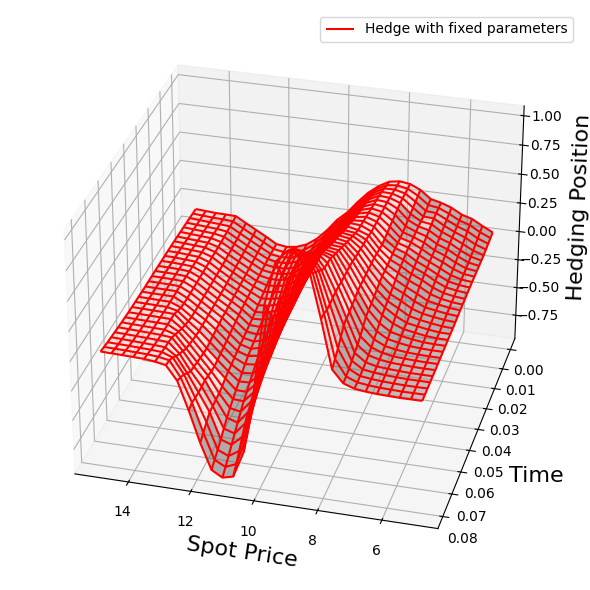

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

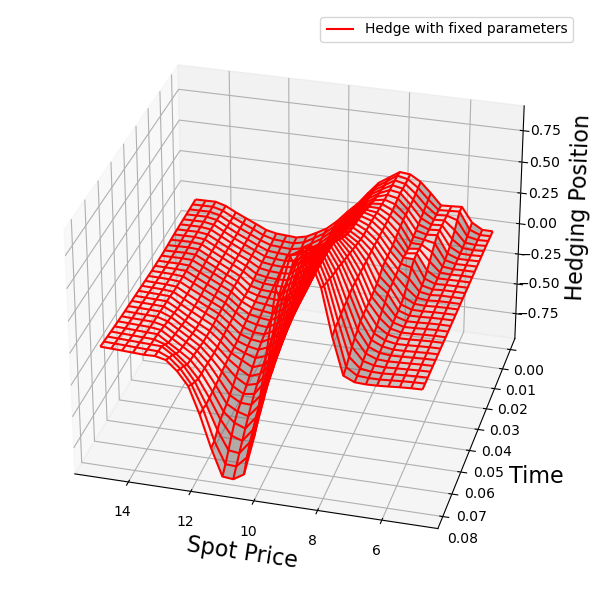

In [12]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid_fix,color = "mistyrose",alpha = 0.5)
ax.plot_wireframe(X, Y , grid_fix,color = "red",label = "Hedge with fixed parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_butterfly_uncertain_fix.eps', format='eps')
plt.show()

# Comparison with robust strategy

In [21]:
style.use('ggplot')
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)

# The hedge with fix gamma
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

# The hedge for the model with uncertainty
#path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

C:\Users\jul_ses\AppData\Local\Temp\ipykernel_36836\1790702562.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


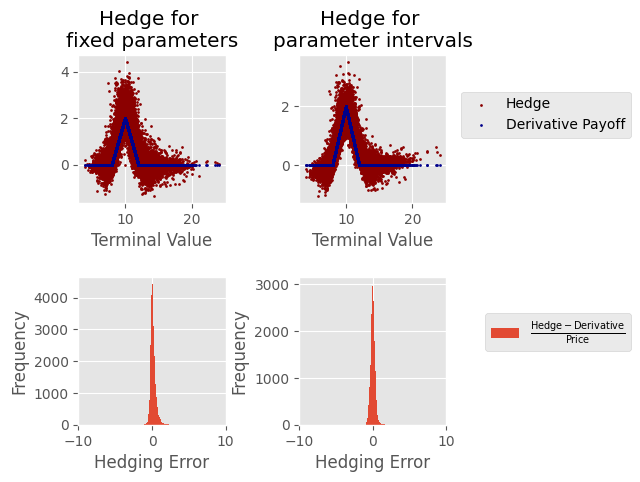

In [22]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch_fix,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter intervals")

hedging_error_fix = ((price_fix + delta_S_fix) - derivative_on_batch_fix).numpy()
axs[1,0].hist(hedging_error_fix,100,label = r"$\frac{\mathrm{Hedge}-\mathrm{Derivative}}{\mathrm{Price}}$")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
axs[1,1].hist(hedging_error,100)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")
fig.savefig('eps/fig_butterfly_example_hedge_error.eps', format='eps')
fig.show()

Adjusted Histogram: Difference between hedging errors

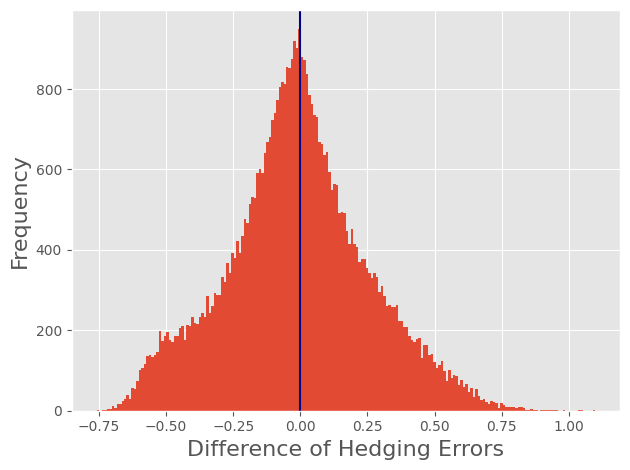

In [23]:
hedging_difference = np.abs(hedging_error_fix)/price_fix - np.abs(hedging_error)/price
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="darkblue")
#plt.xlim([-2,2])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_butterfly_difference.eps', format='eps')
plt.show()

## Statistics on Hedging Errors

Hedging Error of the non-robust strategy.

In [24]:
print("Price of the fix hedge: {}".format(price_fix))
print("Price of the robust hedge: {}".format(price))

Price of the fix hedge: 0.8971872925758362
Price of the robust hedge: 0.7484951019287109


### Absolute Error

Hedging Error of the fix strategy.

In [25]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,50000.000000
mean,0.270569
std,0.283724
min,0.000002
25%,0.081975
50%,0.185355
75%,0.358948
max,3.722789


Hedging Error of the robust strategy.

In [26]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,50000.000000
mean,0.232782
std,0.202105
min,0.000003
25%,0.085018
50%,0.182056
75%,0.328400
max,2.930139


### Relative Error

In [27]:
pd.DataFrame(np.abs(hedging_error_fix)/price_fix).describe()

,0
count,50000.000000
mean,0.301574
std,0.316237
min,0.000002
25%,0.091369
50%,0.206596
75%,0.400082
max,4.149400


In [28]:
pd.DataFrame(np.abs(hedging_error)/price).describe()

,0
count,50000.000000
mean,0.311000
std,0.270016
min,0.000005
25%,0.113585
50%,0.243230
75%,0.438747
max,3.914707
